In [1]:
import pandas as pd
pd.set_option('display.max_row', 100000)
pd.set_option('display.max_columns', 5000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import json # library to handle JSON files 
!pip install geopy  
from geopy.geocoders import Nominatim # convert an address into latitude and l ongitude values 
import requests # library to handle requests 
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe 
# Matplotlib and associated plotting modules 
import matplotlib.cm as cm 
import matplotlib.colors as colors 
# import k-means from clustering stage 
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"C:\Users\abc\Desktop\data_science_foundation\zomato_restaurants_India .csv")

In [3]:
df.head()

res_id                            name  establishment  \
0  3400299                     Bikanervala    Quick Bites   
1  3400005  Mama Chicken Mama Franky House    Quick Bites   
2  3401013                   Bhagat Halwai    Quick Bites   
3  3400290                   Bhagat Halwai    Quick Bites   
4  3401744     The Salt Cafe Kitchen & Bar  Casual Dining   

                                                 url  \
0  https://www.zomato.com/agra/bikanervala-khanda...   
1  https://www.zomato.com/agra/mama-chicken-mama-...   
2  https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3  https://www.zomato.com/agra/bhagat-halwai-civi...   
4  https://www.zomato.com/agra/the-salt-cafe-kitc...   

                                             address  city  city_id  \
0  Kalyani Point, Near Tulsi Cinema, Bypass Road,...  Agra       34   
1        Main Market, Sadar Bazaar, Agra Cantt, Agra  Agra       34   
2  62/1, Near Easy Day, West Shivaji Nagar, Goalp...  Agra       34   
3  Near Anjana Cinema, Nehru Nagar, Civil Lines, ...  Agra       34   
4        1C,3rd Floor, Fatehabad Road, Tajganj, Agra  Agra       34   

      locality   latitude  longitude zipcode  country_id   locality_verbose  \
0     Khandari  27.211450  78.002381     NaN           1     Khandari, Agra   
1   Agra Cantt  27.160569  78.011583  282001           1   Agra Cantt, Agra   
2     Shahganj  27.182938  77.979684  282010           1     Shahganj, Agra   
3  Civil Lines  27.205668  78.004799  282002           1  Civil Lines, Agra   
4      Tajganj  27.157709  78.052421     NaN           1      Tajganj, Agra   

                                            cuisines  \
0  North Indian, South Indian, Mithai, Street Foo...   
1  North Indian, Mughlai, Rolls, Chinese, Fast Fo...   
2                                  Fast Food, Mithai   
3          Desserts, Bakery, Fast Food, South Indian   
4                 North Indian, Continental, Italian   

                                             timings  average_cost_for_two  \
0                         8:30am – 10:30pm (Mon-Sun)                   700   
1  12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...                   600   
2                                   9:30 AM to 11 PM                   300   
3                               8am – 11pm (Mon-Sun)                   300   
4                               11:30 AM to 11:30 PM                  1000   

   price_range currency                                         highlights  \
0            2      Rs.  Lunch, Takeaway Available, Credit Card, Dinner...   
1            2      Rs.  Delivery, No Alcohol Available, Dinner, Takeaw...   
2            1      Rs.  No Alcohol Available, Dinner, Takeaway Availab...   
3            1      Rs.  Takeaway Available, Credit Card, Lunch, Delive...   
4            3      Rs.  Lunch, Serves Alcohol, Cash, Credit Card, Dinn...   

   aggregate_rating rating_text  votes  photo_count  opentable_support  \
0               4.4   Very Good    814          154                0.0   
1               4.4   Very Good   1203          161                0.0   
2               4.2   Very Good    801          107                0.0   
3               4.3   Very Good    693          157                0.0   
4               4.9   Excellent    470          291                0.0   

   delivery  takeaway  
0        -1        -1  
1        -1        -1  
2         1        -1  
3         1        -1  
4         1        -1

In [4]:
print(df.shape)

(211944, 26)


In [9]:
df1= df[df['city_id']==1].reset_index(drop=True ) 
#df1.head()

In [10]:
df1.shape

(5964, 26)

In [11]:
df1.describe(include= 'all')

res_id     name  establishment  \
count   5.964000e+03     5964           5489   
unique           NaN     1886             22   
top              NaN  Giani's  Casual Dining   
freq             NaN       67           1280   
mean    1.116498e+07      NaN            NaN   
std     9.034014e+06      NaN            NaN   
min     5.000000e+01      NaN            NaN   
25%     3.026710e+05      NaN            NaN   
50%     1.828574e+07      NaN            NaN   
75%     1.860598e+07      NaN            NaN   
max     1.915414e+07      NaN            NaN   

                                                      url  \
count                                                5964   
unique                                               2765   
top     https://www.zomato.com/ncr/out-of-the-box-khan...   
freq                                                   24   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                    address       city  city_id  \
count                                  5964       5964   5964.0   
unique                                 2560          6      NaN   
top     ITC Maurya, Chanakyapuri, New Delhi  New Delhi      NaN   
freq                                     33       3918      NaN   
mean                                    NaN        NaN      1.0   
std                                     NaN        NaN      0.0   
min                                     NaN        NaN      1.0   
25%                                     NaN        NaN      1.0   
50%                                     NaN        NaN      1.0   
75%                                     NaN        NaN      1.0   
max                                     NaN        NaN      1.0   

               locality     latitude    longitude zipcode  country_id  \
count              5964  5964.000000  5964.000000    2527      5964.0   
unique              457          NaN          NaN      83         NaN   
top     Connaught Place          NaN          NaN       0         NaN   
freq                395          NaN          NaN    1051         NaN   
mean                NaN    28.524711    77.061244     NaN         1.0   
std                 NaN     1.142000     3.028132     NaN         0.0   
min                 NaN     0.000000     0.000000     NaN         1.0   
25%                 NaN    28.511440    77.097640     NaN         1.0   
50%                 NaN    28.569465    77.194438     NaN         1.0   
75%                 NaN    28.634102    77.232914     NaN         1.0   
max                 NaN    29.058679    77.566651     NaN         1.0   

                  locality_verbose      cuisines          timings  \
count                         5964          5964             5964   
unique                         480           995              936   
top     Connaught Place, New Delhi  North Indian  12 Noon to 1 AM   
freq                           395           308              395   
mean                           NaN           NaN              NaN   
std                            NaN           NaN              NaN   
min                            NaN           NaN              NaN   
25%                            NaN           NaN              NaN   
50%                            NaN           NaN              NaN   
75%                            NaN           NaN              NaN   
max                            NaN           NaN              NaN   

        average_cost_for_two  price_range currency  \
count            5964.000000  5964.000000     5964   
unique                   NaN          NaN        1   
top                      NaN   

In [12]:
df_ncr=df1.drop(['url','address','currency','country_id','city_id','locality_verbose','zipcode'],axis=1)

In [13]:
df_ncr.dtypes

res_id                    int64
name                     object
establishment            object
city                     object
locality                 object
latitude                float64
longitude               float64
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

In [14]:
df_ncr.rename(columns={'aggregate_rating' : 'Ratings(avg)'}, inplace = True)
df_ncr.rename(columns={'average_cost_for_two' : 'Cost for 2(avg)'}, inplace = True)
df_ncr.rename(columns={'city' : 'City'}, inplace = True)
df_ncr.rename(columns={'cuisines' : 'Cuisines'}, inplace = True)
df_ncr.rename(columns={'establishment' : 'Type'}, inplace = True)
df_ncr.rename(columns={'highlights' : 'Features'}, inplace = True)
df_ncr.rename(columns={'latitude' : 'Latitude'}, inplace = True)
df_ncr.rename(columns={'name' : 'Name'}, inplace = True)
df_ncr.rename(columns={'locality' : 'Locality'}, inplace = True)
df_ncr.rename(columns={'longitude' : 'Longitude'}, inplace = True)
df_ncr.rename(columns={'opentable_support' : 'Opentable'}, inplace = True)
df_ncr.rename(columns={'photo_count' : 'Photos'}, inplace = True)
df_ncr.rename(columns={'price_range' : 'Price Range'}, inplace = True)
df_ncr.rename(columns={'rating_text' : 'Rating Text'}, inplace = True)
df_ncr.rename(columns={'takeaway' : 'Takeaway'}, inplace = True)
df_ncr.rename(columns={'res_id' : 'Id'}, inplace = True)
df_ncr.rename(columns={'timings' : 'Timings'}, inplace = True)
df_ncr.rename(columns={'votes' : 'Votes'}, inplace = True)
df_ncr.rename(columns={'delivery' : 'Delivery'}, inplace = True)

In [15]:
df_ncr.head(1)

Id                Name           Type       City  Locality  Latitude  \
0  18895645  Plum By Bent Chair  Casual Dining  New Delhi  Aerocity  28.55154   

   Longitude Cuisines                 Timings  Cost for 2(avg)  Price Range  \
0  77.122704    Asian  12noon – 1am (Mon-Sun)                0            1   

                                            Features  Ratings(avg)  \
0  Debit Card, Dinner, Cash, Credit Card, Serves ...           4.9   

  Rating Text  Votes  Photos  Opentable  Delivery  Takeaway  
0   Excellent   1545    4321        0.0        -1        -1

In [16]:
df_ncr['Type'].value_counts()

Casual Dining      1280
Quick Bites         727
Fine Dining         706
Café                394
Lounge              362
Bar                 343
Dessert Parlour     200
Bakery              167
Sweet Shop          158
Pub                 149
Microbrewery        139
Dhaba               113
Food Court          102
Food Truck          101
Kiosk                99
Butcher Shop         98
Paan Shop            71
Beverage Shop        71
Bhojanalya           60
Confectionery        59
Club                 56
Cocktail Bar         34
Name: Type, dtype: int64

In [17]:
#i=0 
#while i<5940:   
    #if df_ncr.iloc[i,2]=='':
        #df_ncr.iloc[i,2]= "Not Assigned"    
    #i=i+1

In [18]:
df_ncr.head()

Id                     Name           Type       City  \
0  18895645       Plum By Bent Chair  Casual Dining  New Delhi   
1  18429148                 Pa Pa Ya    Fine Dining  New Delhi   
2  18418277         Ministry Of Beer         Lounge  New Delhi   
3  18625812                  Detroit            Bar  New Delhi   
4  18423151  The Darzi Bar & Kitchen  Casual Dining  New Delhi   

                      Locality   Latitude  Longitude  \
0                     Aerocity  28.551540  77.122704   
1  Select Citywalk Mall, Saket  28.528391  77.218611   
2              Connaught Place  28.633286  77.222787   
3              Connaught Place  28.631357  77.220251   
4              Connaught Place  28.635508  77.219096   

                                    Cuisines                    Timings  \
0                                      Asian     12noon – 1am (Mon-Sun)   
1             Asian, Chinese, Thai, Japanese    12Noon to 1AM (Mon-Sun)   
2         Continental, Italian, Asian, Momos  12 Noon to 1 AM (Mon-Sun)   
3                 Bar Food, Mexican, Italian  Mon-Sun (12 Noon to 1 AM)   
4  North Indian, Chinese, Continental, Pizza            12 Noon to 1 AM   

   Cost for 2(avg)  Price Range  \
0                0            1   
1             2500            4   
2             1500            3   
3             1500            3   
4             1500            3   

                                            Features  Ratings(avg)  \
0  Debit Card, Dinner, Cash, Credit Card, Serves ...           4.9   
1  Credit Card, Debit Card, Lunch, Serves Alcohol...           4.7   
2  Lunch, Credit Card, Dinner, Cash, Debit Card, ...           4.5   
3  Lunch, Serves Alcohol, Takeaway Available, Deb...           4.6   
4  Lunch, Serves Alcohol, Cash, Credit Card, Dinn...           4.3   

  Rating Text  Votes  Photos  Opentable  Delivery  Takeaway  
0   Excellent   1545    4321        0.0        -1        -1  
1   Excellent   3234    8344        0.0        -1        -1  
2   Excellent   3043    9984        0.0        -1        -1  
3   Excellent   1327    3255        0.0        -1        -1  
4   Very Good   3211    9618        0.0        -1        -1

In [19]:
i=0 
ad={}
while i<5964:    
    if "Pure Veg" in df_ncr.loc[i,'Features']: 
        ad[i] = ['Yes'] 
    else :
        ad[i] = ['No']
    i=i+1
# Using 'Address' as the column name 
# and equating it to the list 
df_ncr['Pure_Veg'] = ad 
df_ncr.head()

Id                     Name           Type       City  \
0  18895645       Plum By Bent Chair  Casual Dining  New Delhi   
1  18429148                 Pa Pa Ya    Fine Dining  New Delhi   
2  18418277         Ministry Of Beer         Lounge  New Delhi   
3  18625812                  Detroit            Bar  New Delhi   
4  18423151  The Darzi Bar & Kitchen  Casual Dining  New Delhi   

                      Locality   Latitude  Longitude  \
0                     Aerocity  28.551540  77.122704   
1  Select Citywalk Mall, Saket  28.528391  77.218611   
2              Connaught Place  28.633286  77.222787   
3              Connaught Place  28.631357  77.220251   
4              Connaught Place  28.635508  77.219096   

                                    Cuisines                    Timings  \
0                                      Asian     12noon – 1am (Mon-Sun)   
1             Asian, Chinese, Thai, Japanese    12Noon to 1AM (Mon-Sun)   
2         Continental, Italian, Asian, Momos  12 Noon to 1 AM (Mon-Sun)   
3                 Bar Food, Mexican, Italian  Mon-Sun (12 Noon to 1 AM)   
4  North Indian, Chinese, Continental, Pizza            12 Noon to 1 AM   

   Cost for 2(avg)  Price Range  \
0                0            1   
1             2500            4   
2             1500            3   
3             1500            3   
4             1500            3   

                                            Features  Ratings(avg)  \
0  Debit Card, Dinner, Cash, Credit Card, Serves ...           4.9   
1  Credit Card, Debit Card, Lunch, Serves Alcohol...           4.7   
2  Lunch, Credit Card, Dinner, Cash, Debit Card, ...           4.5   
3  Lunch, Serves Alcohol, Takeaway Available, Deb...           4.6   
4  Lunch, Serves Alcohol, Cash, Credit Card, Dinn...           4.3   

  Rating Text  Votes  Photos  Opentable  Delivery  Takeaway  Pure_Veg  
0   Excellent   1545    4321        0.0        -1        -1         0  
1   Excellent   3234    8344        0.0        -1        -1         1  
2   Excellent   3043    9984        0.0        -1        -1         2  
3   Excellent   1327    3255        0.0        -1        -1         3  
4   Very Good   3211    9618        0.0        -1        -1         4

In [20]:
# NCR id
i=0 
ad1={}
while i<5964:    
    if "New Delhi" in df_ncr.loc[i,'City']: 
        ad1[i] = 0 
    if "Gurgaon" in df_ncr.loc[i,'City']: 
        ad1[i] = 1 
    if "Noida" in df_ncr.loc[i,'City']: 
        ad1[i] = 2 
    if "Faridabad" in df_ncr.loc[i,'City']: 
        ad1[i] = 3
    if "Ghaziabad" in df_ncr.loc[i,'City']: 
        ad1[i] = 4 
    if "Greater Noida" in df_ncr.loc[i,'City']: 
        ad1[i] = 5 
    
    i=i+1

#ad1
# Using 'Address' as the column name 
# and equating it to the list 
df_ncr["NCR Id"] = df_ncr["Pure_Veg"].map(ad1)

In [21]:
i=0 
ad1={}
while i<5964:    
    if "Pure Veg" in df_ncr.loc[i,'Features']: 
        ad1[i] = 1 
    else :
        ad1[i] = 0
    i=i+1

#ad1
# Using 'Address' as the column name 
# and equating it to the list 
df_ncr["Pure Veg"] = df_ncr["Pure_Veg"].map(ad1)
df_ncr.head()

Id                     Name           Type       City  \
0  18895645       Plum By Bent Chair  Casual Dining  New Delhi   
1  18429148                 Pa Pa Ya    Fine Dining  New Delhi   
2  18418277         Ministry Of Beer         Lounge  New Delhi   
3  18625812                  Detroit            Bar  New Delhi   
4  18423151  The Darzi Bar & Kitchen  Casual Dining  New Delhi   

                      Locality   Latitude  Longitude  \
0                     Aerocity  28.551540  77.122704   
1  Select Citywalk Mall, Saket  28.528391  77.218611   
2              Connaught Place  28.633286  77.222787   
3              Connaught Place  28.631357  77.220251   
4              Connaught Place  28.635508  77.219096   

                                    Cuisines                    Timings  \
0                                      Asian     12noon – 1am (Mon-Sun)   
1             Asian, Chinese, Thai, Japanese    12Noon to 1AM (Mon-Sun)   
2         Continental, Italian, Asian, Momos  12 Noon to 1 AM (Mon-Sun)   
3                 Bar Food, Mexican, Italian  Mon-Sun (12 Noon to 1 AM)   
4  North Indian, Chinese, Continental, Pizza            12 Noon to 1 AM   

   Cost for 2(avg)  Price Range  \
0                0            1   
1             2500            4   
2             1500            3   
3             1500            3   
4             1500            3   

                                            Features  Ratings(avg)  \
0  Debit Card, Dinner, Cash, Credit Card, Serves ...           4.9   
1  Credit Card, Debit Card, Lunch, Serves Alcohol...           4.7   
2  Lunch, Credit Card, Dinner, Cash, Debit Card, ...           4.5   
3  Lunch, Serves Alcohol, Takeaway Available, Deb...           4.6   
4  Lunch, Serves Alcohol, Cash, Credit Card, Dinn...           4.3   

  Rating Text  Votes  Photos  Opentable  Delivery  Takeaway  Pure_Veg  NCR Id  \
0   Excellent   1545    4321        0.0        -1        -1         0       0   
1   Excellent   3234    8344        0.0        -1        -1         1       0   
2   Excellent   3043    9984        0.0        -1        -1         2       0   
3   Excellent   1327    3255        0.0        -1        -1         3       0   
4   Very Good   3211    9618        0.0        -1        -1         4       0   

   Pure Veg  
0         0  
1         0  
2         0  
3         0  
4         0

In [22]:
#table booking
i=0 
ad1={}
while i<5964:    
    if ("Table booking recommended" or "Table Reservation" or "Booking" or "Reservation")in df_ncr.loc[i,'Features']: 
        ad1[i] = 1 
    else :
        ad1[i] = 0
    i=i+1

#ad1
# Using 'Address' as the column name 
# and equating it to the list 
df_ncr["Table Booking"] = df_ncr["Pure_Veg"].map(ad1)
df_ncr.head()

Id                     Name           Type       City  \
0  18895645       Plum By Bent Chair  Casual Dining  New Delhi   
1  18429148                 Pa Pa Ya    Fine Dining  New Delhi   
2  18418277         Ministry Of Beer         Lounge  New Delhi   
3  18625812                  Detroit            Bar  New Delhi   
4  18423151  The Darzi Bar & Kitchen  Casual Dining  New Delhi   

                      Locality   Latitude  Longitude  \
0                     Aerocity  28.551540  77.122704   
1  Select Citywalk Mall, Saket  28.528391  77.218611   
2              Connaught Place  28.633286  77.222787   
3              Connaught Place  28.631357  77.220251   
4              Connaught Place  28.635508  77.219096   

                                    Cuisines                    Timings  \
0                                      Asian     12noon – 1am (Mon-Sun)   
1             Asian, Chinese, Thai, Japanese    12Noon to 1AM (Mon-Sun)   
2         Continental, Italian, Asian, Momos  12 Noon to 1 AM (Mon-Sun)   
3                 Bar Food, Mexican, Italian  Mon-Sun (12 Noon to 1 AM)   
4  North Indian, Chinese, Continental, Pizza            12 Noon to 1 AM   

   Cost for 2(avg)  Price Range  \
0                0            1   
1             2500            4   
2             1500            3   
3             1500            3   
4             1500            3   

                                            Features  Ratings(avg)  \
0  Debit Card, Dinner, Cash, Credit Card, Serves ...           4.9   
1  Credit Card, Debit Card, Lunch, Serves Alcohol...           4.7   
2  Lunch, Credit Card, Dinner, Cash, Debit Card, ...           4.5   
3  Lunch, Serves Alcohol, Takeaway Available, Deb...           4.6   
4  Lunch, Serves Alcohol, Cash, Credit Card, Dinn...           4.3   

  Rating Text  Votes  Photos  Opentable  Delivery  Takeaway  Pure_Veg  NCR Id  \
0   Excellent   1545    4321        0.0        -1        -1         0       0   
1   Excellent   3234    8344        0.0        -1        -1         1       0   
2   Excellent   3043    9984        0.0        -1        -1         2       0   
3   Excellent   1327    3255        0.0        -1        -1         3       0   
4   Very Good   3211    9618        0.0        -1        -1         4       0   

   Pure Veg  Table Booking  
0         0              1  
1         0              1  
2         0              1  
3         0              1  
4         0              0

In [23]:
#parking
i=0 
ad1={}
while i<5964:    
    if "Parking" in df_ncr.loc[i,'Features']: 
        ad1[i] = 1 
    else :
        ad1[i] = 0
    i=i+1

#ad1
# Using 'Address' as the column name 
# and equating it to the list 
df_ncr["Parking Available"] = df_ncr["Pure_Veg"].map(ad1)

In [24]:
#delivery
i=0 
ad1={}
while i<5964:    
    if "Delivery" in df_ncr.loc[i,'Features']: 
        ad1[i] = 1 
    else :
        ad1[i] = 0
    i=i+1

#ad1
# Using 'Address' as the column name 
# and equating it to the list 
df_ncr["Delivery Available"] = df_ncr["Pure_Veg"].map(ad1)

In [25]:
#takeaway
i=0 
ad1={}
while i<5964:    
    if "Takeaway" in df_ncr.loc[i,'Features']: 
        ad1[i] = 1 
    else :
        ad1[i] = 0
    i=i+1

#ad1
# Using 'Address' as the column name 
# and equating it to the list 
df_ncr["Takeaway Available"] = df_ncr["Pure_Veg"].map(ad1)

In [26]:
#breakfast
i=0 
ad1={}
while i<5964:    
    if "Breakfast" in df_ncr.loc[i,'Features']: 
        ad1[i] = 1 
    else :
        ad1[i] = 0
    i=i+1

df_ncr["Breakfast"] = df_ncr["Pure_Veg"].map(ad1)

In [27]:
#lunch
i=0 
ad1={}
while i<5964:    
    if "Lunch" in df_ncr.loc[i,'Features']: 
        ad1[i] = 1 
    else :
        ad1[i] = 0
    i=i+1

df_ncr["Lunch"] = df_ncr["Pure_Veg"].map(ad1)

In [28]:
#brunch
i=0 
ad1={}
while i<5964:    
    if "Brunch" in df_ncr.loc[i,'Features']: 
        ad1[i] = 1 
    else :
        ad1[i] = 0
    i=i+1

df_ncr["Brunch"] = df_ncr["Pure_Veg"].map(ad1)

In [29]:
#dinner
i=0 
ad1={}
while i<5964:    
    if "Dinner" in df_ncr.loc[i,'Features']: 
        ad1[i] = 1
    else :
        ad1[i] = 0
    i=i+1

df_ncr["Dinner"] = df_ncr["Pure_Veg"].map(ad1)

In [30]:
#indoor seating
i=0 
ad1={}
while i<5964:    
    if "Indoor Seating" in df_ncr.loc[i,'Features']: 
        ad1[i] = 1 
    else :
        ad1[i] = 0
    i=i+1

df_ncr["Indoor Seating"] = df_ncr["Pure_Veg"].map(ad1)

In [31]:
#outdoor seating
i=0 
ad1={}
while i<5964:    
    if "Outdoor Seating" in df_ncr.loc[i,'Features']: 
        ad1[i] = 1 
    else :
        ad1[i] = 0
    i=i+1

df_ncr["Outdoor Seating"] = df_ncr["Pure_Veg"].map(ad1)

In [32]:
#rooftop
i=0 
ad1={}
while i<5964:    
    if "Rooftop" in df_ncr.loc[i,'Features']: 
        ad1[i] = 1 
    else :
        ad1[i] = 0
    i=i+1

df_ncr["Rooftop"] = df_ncr["Pure_Veg"].map(ad1)

In [33]:
#no seating
i=0 
ad1={}
while i<5964:    
    if "No Seating Available" in df_ncr.loc[i,'Features']: 
        ad1[i] = 1 
    else :
        ad1[i] = 0
    i=i+1

df_ncr["No Seating"] = df_ncr["Pure_Veg"].map(ad1)

In [34]:
#alchol cocktail liquor
i=0 
ad1={}
while i<5964:    
    if ("Alcohol" or "Cocktail" or "Liquor " or"Beer" or "Wine" or "Fullbar" or "bar") in df_ncr.loc[i,'Features']: 
        ad1[i] = 1 
    else :
        ad1[i] = 0
    i=i+1

df_ncr["Liquor served"] = df_ncr["Pure_Veg"].map(ad1)

In [35]:
#digital payment accepted
i=0 
ad1={}
while i<5964:    
    if "Digital Payments Accepted" in df_ncr.loc[i,'Features']: 
        ad1[i] = 1
    else :
        ad1[i] = 0
    i=i+1

df_ncr["Digital payment"] = df_ncr["Pure_Veg"].map(ad1)

In [36]:
#card payment debit card
i=0 
ad1={}
while i<5964:    
    if "Card" in df_ncr.loc[i,'Features']: 
        ad1[i] = 1
    else :
        ad1[i] = 0
    i=i+1

df_ncr["Card payment"] = df_ncr["Pure_Veg"].map(ad1)

In [37]:
# cash
i=0 
ad1={}
while i<5964:    
    if "Cash" in df_ncr.loc[i,'Features']: 
        ad1[i] = 1 
    else :
        ad1[i] = 0
    i=i+1

df_ncr["Cash payment"] = df_ncr["Pure_Veg"].map(ad1)

In [38]:
#air conditioned
i=0 
ad1={}
while i<5964:    
    if "Air Conditioned" in df_ncr.loc[i,'Features']: 
        ad1[i] = 1
    else :
        ad1[i] = 0
    i=i+1

df_ncr["A.C."] = df_ncr["Pure_Veg"].map(ad1)

In [39]:
#free wifi
i=0 
ad1={}
while i<5964:    
    if "Free Wifi" in df_ncr.loc[i,'Features']: 
        ad1[i] = 1
    else :
        ad1[i] = 0
    i=i+1

df_ncr["Free Wifi"] = df_ncr["Pure_Veg"].map(ad1)

In [40]:
# Disabled
i=0 
ad1={}
while i<5964:    
    if ("Disabled" or "Wheelchair") in df_ncr.loc[i,'Features']: 
        ad1[i] = 1
    else :
        ad1[i] = 0
    i=i+1

df_ncr["Wheelchair Accessible"] = df_ncr["Pure_Veg"].map(ad1)

In [41]:
df_ncr['Rating Text'].value_counts()

Very Good        3015
Good             1183
Excellent         991
Average           306
Poor              271
Not rated         157
Excelente          11
Harika              6
Muy Bueno           4
Terbaik             3
Bardzo dobrze       3
Ottimo              3
Scarso              3
Bom                 2
Çok iyi             2
Muito Bom           1
Sangat Baik         1
Skvělá volba        1
Wybitnie            1
Name: Rating Text, dtype: int64

In [42]:
df_ncr["Rating Text"]= df_ncr["Rating Text"].replace("Excelente", "Excellent")
df_ncr["Rating Text"]= df_ncr["Rating Text"].replace("Harika", "Excellent")
df_ncr["Rating Text"]= df_ncr["Rating Text"].replace("Ottimo", "Excellent")
df_ncr["Rating Text"]= df_ncr["Rating Text"].replace("Terbaik", "Excellent")
df_ncr["Rating Text"]= df_ncr["Rating Text"].replace("Wybitnie", "Excellent")
df_ncr["Rating Text"]= df_ncr["Rating Text"].replace("Skvělá volba", "Excellent")


In [43]:
df_ncr["Rating Text"]= df_ncr["Rating Text"].replace("Muy Bueno", "Very Good")
df_ncr["Rating Text"]= df_ncr["Rating Text"].replace("Bardzo dobrze", "Very Good")
df_ncr["Rating Text"]= df_ncr["Rating Text"].replace("Muito Bom", "Very Good")
df_ncr["Rating Text"]= df_ncr["Rating Text"].replace("Sangat Baik", "Very Good")

In [44]:
df_ncr["Rating Text"]= df_ncr["Rating Text"].replace("Scarso", "Poor")

In [45]:
df_ncr["Rating Text"]= df_ncr["Rating Text"].replace("Çok iyi", "Good")
df_ncr["Rating Text"]= df_ncr["Rating Text"].replace("Bom", "Good")

In [46]:
df_ncr['Rating Text'].value_counts()

Very Good    3024
Good         1187
Excellent    1016
Average       306
Poor          274
Not rated     157
Name: Rating Text, dtype: int64

In [47]:
df_ncr1=df_ncr.drop(['Opentable','Delivery','Takeaway','Pure_Veg'],axis=1)

In [48]:
df_ncr1.head(2)

Id                Name           Type       City  \
0  18895645  Plum By Bent Chair  Casual Dining  New Delhi   
1  18429148            Pa Pa Ya    Fine Dining  New Delhi   

                      Locality   Latitude  Longitude  \
0                     Aerocity  28.551540  77.122704   
1  Select Citywalk Mall, Saket  28.528391  77.218611   

                         Cuisines                  Timings  Cost for 2(avg)  \
0                           Asian   12noon – 1am (Mon-Sun)                0   
1  Asian, Chinese, Thai, Japanese  12Noon to 1AM (Mon-Sun)             2500   

   Price Range                                           Features  \
0            1  Debit Card, Dinner, Cash, Credit Card, Serves ...   
1            4  Credit Card, Debit Card, Lunch, Serves Alcohol...   

   Ratings(avg) Rating Text  Votes  Photos  NCR Id  Pure Veg  Table Booking  \
0           4.9   Excellent   1545    4321       0         0              1   
1           4.7   Excellent   3234    8344       0         0              1   

   Parking Available  Delivery Available  Takeaway Available  Breakfast  \
0                  1                   0                   0          0   
1                  1                   0                   0          0   

   Lunch  Brunch  Dinner  Indoor Seating  Outdoor Seating  Rooftop  \
0      0       0       1               1                0        0   
1      1       1       1               1                0        0   

   No Seating  Liquor served  Digital payment  Card payment  Cash payment  \
0           0              0                1             1             1   
1           0              1                0             1             1   

   A.C.  Free Wifi  Wheelchair Accessible  
0     1          0                      0  
1     1          0                      0

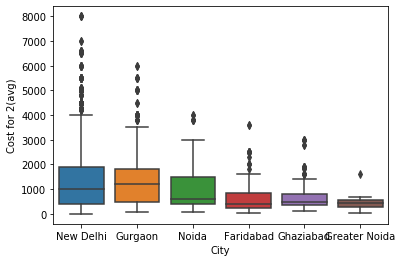

In [49]:
sns.boxplot(x="City",y="Cost for 2(avg)", data= df_ncr1)

In [50]:
df_ncr1['City'].value_counts()

New Delhi        3918
Gurgaon          1290
Noida             467
Ghaziabad         132
Faridabad         124
Greater Noida      33
Name: City, dtype: int64

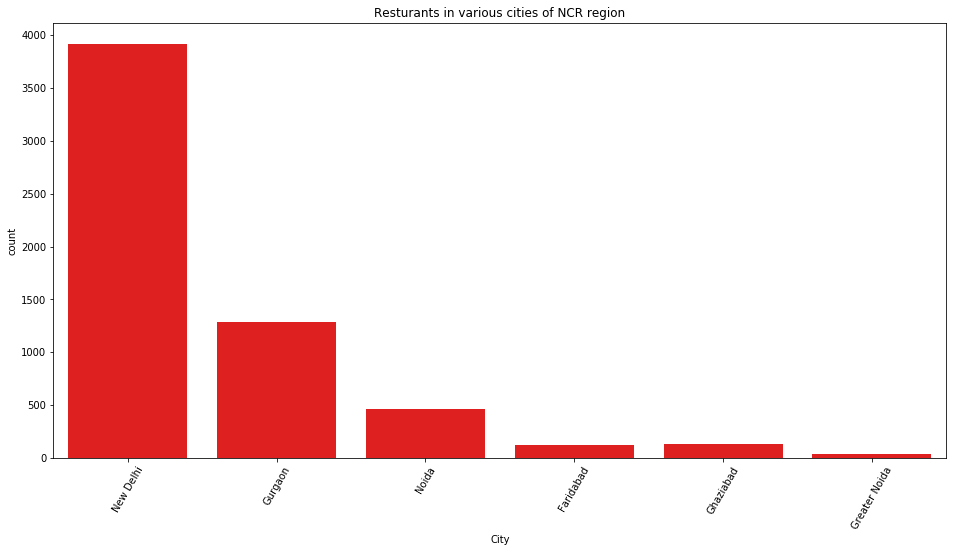

In [51]:
f, ax = plt.subplots(1,1, figsize = (16, 8))
sns.countplot(df_ncr1['City'], ax = ax, color = 'red')
ax.tick_params('x', rotation = 60)
ax.set_title('Resturants in various cities of NCR region')
plt.show()

In [52]:
df_ncr1['Locality'].value_counts()

Connaught Place                                         395
Sector 29                                               197
Cyber Hub, DLF Cyber City                               149
Rajouri Garden                                          141
Punjabi Bagh                                            109
DLF Mall of India, Sector 18,  Noida                     85
Rohini                                                   81
Khan Market                                              77
Delhi University-GTB Nagar                               73
Greater Kailash 1 (GK1)                                  65
Malviya Nagar                                            61
Select Citywalk Mall, Saket                              61
Greater Kailash 2 (GK2)                                  59
Sohna Road                                               54
Chandni Chowk                                            52
Kamla Nagar                                              49
DLF Galleria, DLF Phase 4               

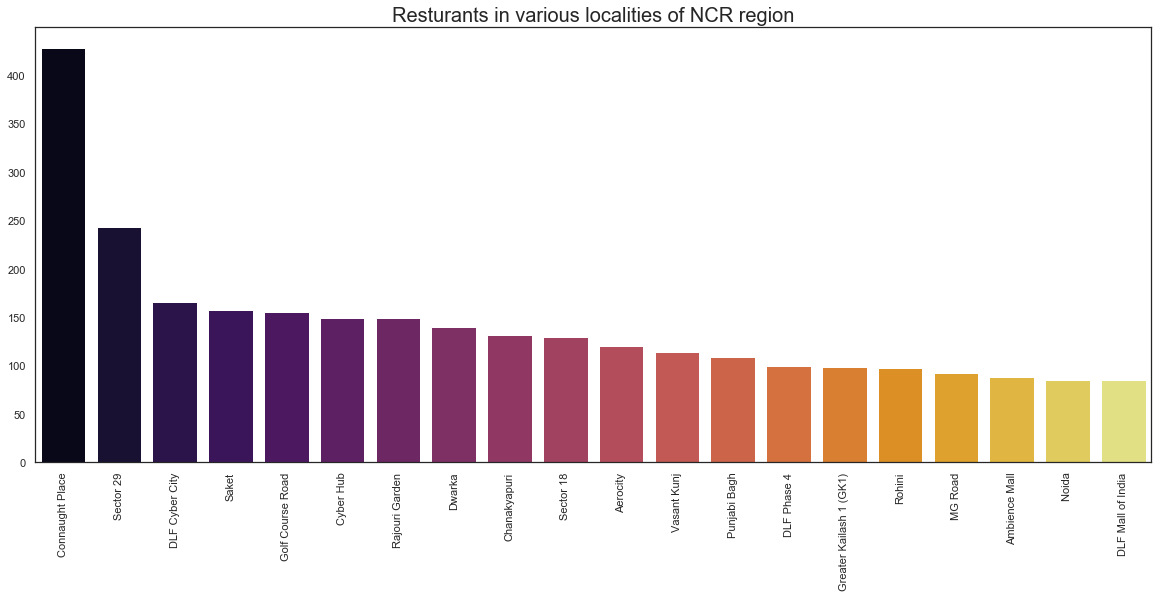

In [53]:
total_locality= df_ncr1.Locality.value_counts()
locality = {}
cnt = 0
for i in total_locality.index:
    for j in i.split(', '):
        if j not in locality.keys():
            locality[j] = total_locality[cnt]
        else:
            locality[j] += total_locality[cnt]
    cnt += 1

sorted_locality = pd.Series(locality).sort_values(ascending=False)
sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (20,8))
g.tick_params('x', rotation = 90)
g.set_title('Resturants in various localities of NCR region',fontsize=20)
g = sns.barplot(sorted_locality[:20].index, sorted_locality[:20].values, palette="inferno")

In [54]:
df_dli=df_ncr1[df_ncr1['NCR Id']==0].reset_index(drop=True ) 
df_gur=df_ncr1[df_ncr1['NCR Id']==1].reset_index(drop=True ) 
df_noi=df_ncr1[df_ncr1['NCR Id']==2].reset_index(drop=True ) 
df_far=df_ncr1[df_ncr1['NCR Id']==3].reset_index(drop=True ) 
df_gh=df_ncr1[df_ncr1['NCR Id']==4].reset_index(drop=True ) 
df_grn=df_ncr1[df_ncr1['NCR Id']==5].reset_index(drop=True )

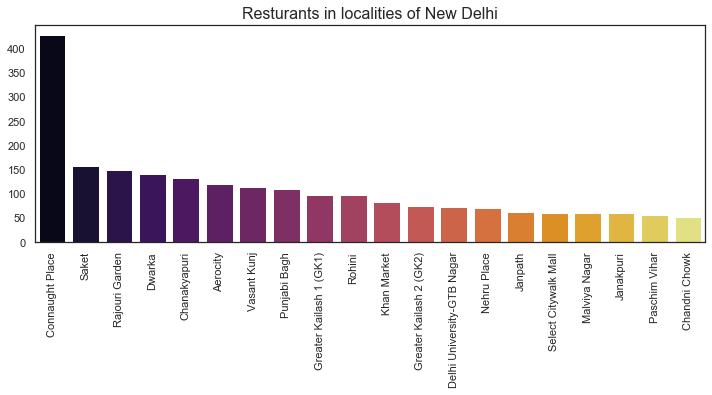

In [55]:
total_locality= df_dli.Locality.value_counts()
locality = {}
cnt = 0
for i in total_locality.index:
    for j in i.split(', '):
        if j not in locality.keys():
            locality[j] = total_locality[cnt]
        else:
            locality[j] += total_locality[cnt]
    cnt += 1

sorted_locality = pd.Series(locality).sort_values(ascending=False)
sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (12,4))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_locality[:20].index, sorted_locality[:20].values, palette="inferno")



g.set_title('Resturants in localities of New Delhi',fontsize=16)
plt.show()

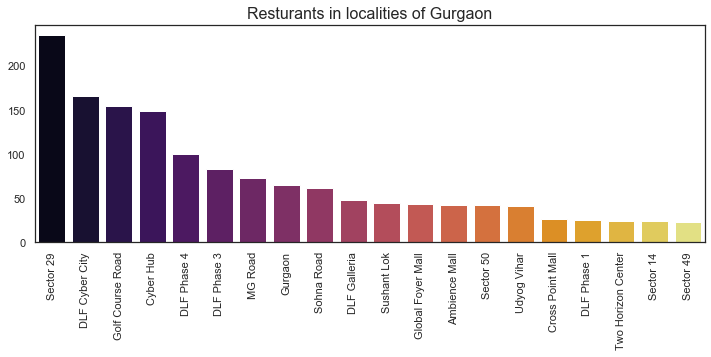

In [56]:
total_locality= df_gur.Locality.value_counts()
locality = {}
cnt = 0
for i in total_locality.index:
    for j in i.split(', '):
        if j not in locality.keys():
            locality[j] = total_locality[cnt]
        else:
            locality[j] += total_locality[cnt]
    cnt += 1

sorted_locality = pd.Series(locality).sort_values(ascending=False)
sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (12,4))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_locality[:20].index, sorted_locality[:20].values, palette="inferno")



g.set_title('Resturants in localities of Gurgaon',fontsize=16)
plt.show()

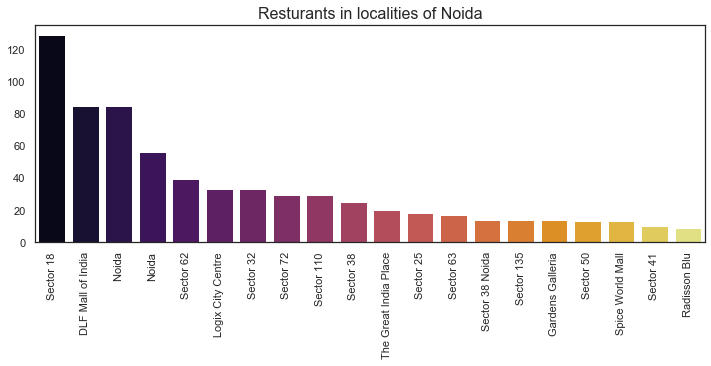

In [57]:
total_locality= df_noi.Locality.value_counts()
locality = {}
cnt = 0
for i in total_locality.index:
    for j in i.split(', '):
        if j not in locality.keys():
            locality[j] = total_locality[cnt]
        else:
            locality[j] += total_locality[cnt]
    cnt += 1

sorted_locality = pd.Series(locality).sort_values(ascending=False)
sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (12,4))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_locality[:20].index, sorted_locality[:20].values, palette="inferno")



g.set_title('Resturants in localities of Noida',fontsize=16)
plt.show()

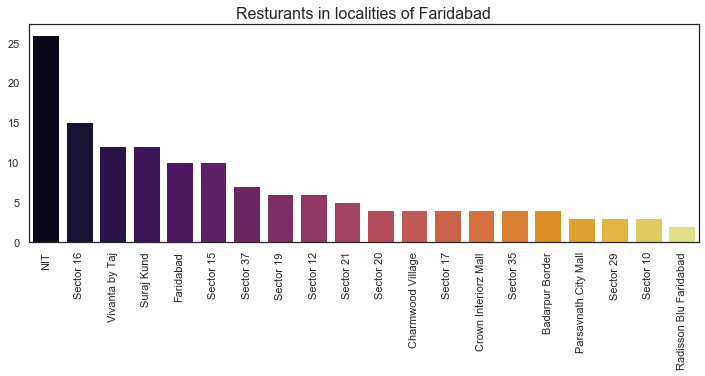

In [58]:
total_locality= df_far.Locality.value_counts()
locality = {}
cnt = 0
for i in total_locality.index:
    for j in i.split(', '):
        if j not in locality.keys():
            locality[j] = total_locality[cnt]
        else:
            locality[j] += total_locality[cnt]
    cnt += 1

sorted_locality = pd.Series(locality).sort_values(ascending=False)
sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (12,4))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_locality[:20].index, sorted_locality[:20].values, palette="inferno")



g.set_title('Resturants in localities of Faridabad',fontsize=16)
plt.show()

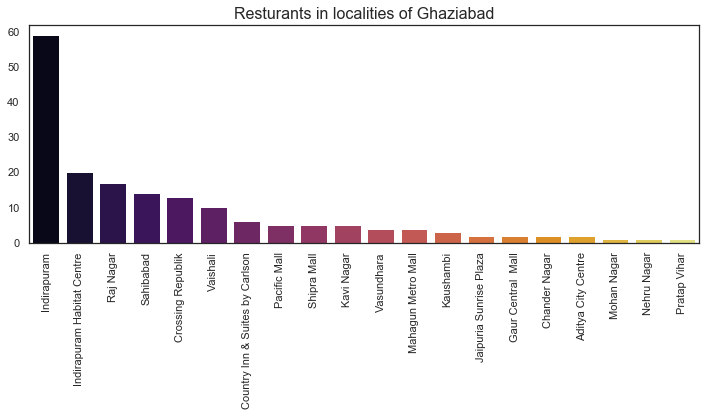

In [59]:
total_locality= df_gh.Locality.value_counts()
locality = {}
cnt = 0
for i in total_locality.index:
    for j in i.split(', '):
        if j not in locality.keys():
            locality[j] = total_locality[cnt]
        else:
            locality[j] += total_locality[cnt]
    cnt += 1

sorted_locality = pd.Series(locality).sort_values(ascending=False)
sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (12,4))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_locality[:20].index, sorted_locality[:20].values, palette="inferno")



g.set_title('Resturants in localities of Ghaziabad',fontsize=16)
plt.show()

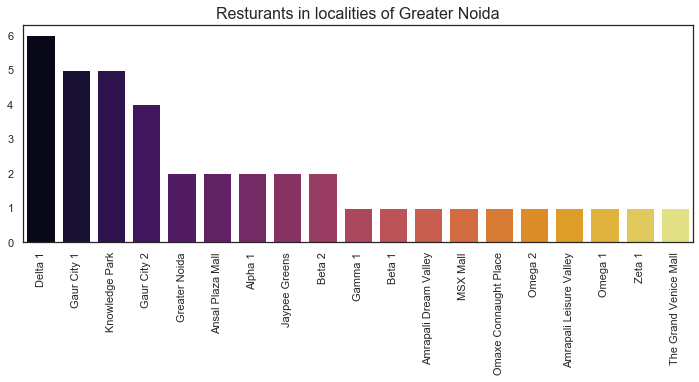

In [60]:
total_locality= df_grn.Locality.value_counts()
locality = {}
cnt = 0
for i in total_locality.index:
    for j in i.split(', '):
        if j not in locality.keys():
            locality[j] = total_locality[cnt]
        else:
            locality[j] += total_locality[cnt]
    cnt += 1

sorted_locality = pd.Series(locality).sort_values(ascending=False)
sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (12,4))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_locality[:20].index, sorted_locality[:20].values, palette="inferno")
g.set_title('Resturants in localities of Greater Noida',fontsize=16)
plt.show()

In [61]:
df_ncr1['Cuisines'].value_counts()

North Indian                                                                                         308
Street Food                                                                                          155
North Indian, Mughlai                                                                                 87
Burger, Fast Food, Beverages                                                                          86
North Indian, Chinese                                                                                 86
Bakery                                                                                                76
Desserts, Ice Cream, Beverages                                                                        67
Paan                                                                                                  63
Cafe                                                                                                  63
South Indian                                           

### Price range

In [62]:
df_ncr1['Price Range'].value_counts()

1    1691
3    1565
2    1361
4    1347
Name: Price Range, dtype: int64

In [63]:
df_dli['Price Range'].value_counts()

1    1117
3     989
4     978
2     834
Name: Price Range, dtype: int64

In [64]:
df_gur['Price Range'].value_counts()

3    438
2    312
4    286
1    254
Name: Price Range, dtype: int64

In [65]:
df_noi['Price Range'].value_counts()

1    168
2    141
3     99
4     59
Name: Price Range, dtype: int64

In [66]:
df_far['Price Range'].value_counts()

1    73
2    21
4    17
3    13
Name: Price Range, dtype: int64

In [67]:
df_gh['Price Range'].value_counts()

1    62
2    38
3    25
4     7
Name: Price Range, dtype: int64

In [68]:
df_grn['Price Range'].value_counts()

1    17
2    15
3     1
Name: Price Range, dtype: int64

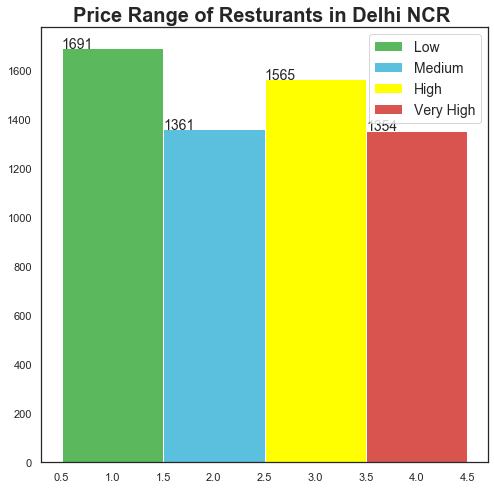

In [69]:
ax = plt.subplots(figsize=(8,8))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [1691]
bars2 = [1361]
bars3 = [1565]
bars4 = [1354]
bars5 = bars1 + bars2 + bars3 + bars4
 
# Set position of bar on X axis
r1 = [1]
r2 = [2]
r3 = [3]
r4 = [4]
r5 = r1 + r2 + r3 +r4 
 
# Make the plot
plt.bar(r1, bars1, color='#5cb85c', width=barWidth, edgecolor='white', label='Low')
plt.bar(r2, bars2, color='#5bc0de', width=barWidth, edgecolor='white', label='Medium')
plt.bar(r3, bars3, color='yellow', width=barWidth, edgecolor='white', label='High')
plt.bar(r4, bars4, color='#d9534f', width=barWidth, edgecolor='white', label='Very High')

# Add xticks on the middle of the group bars

plt.title('Price Range of Resturants in Delhi NCR ',fontweight='bold',fontsize=20)

# Create labels 
label = ['1691','1361','1565','1354'] 
# Text on the top of each barplot 
for i in range(len(r5)): plt.text(x = r5[i]-0.5 , y = bars5[i]+0.1, s = label[ i], size = 14)
# Create legend & Show graphic

plt.legend(fontsize = 14)
plt.show()

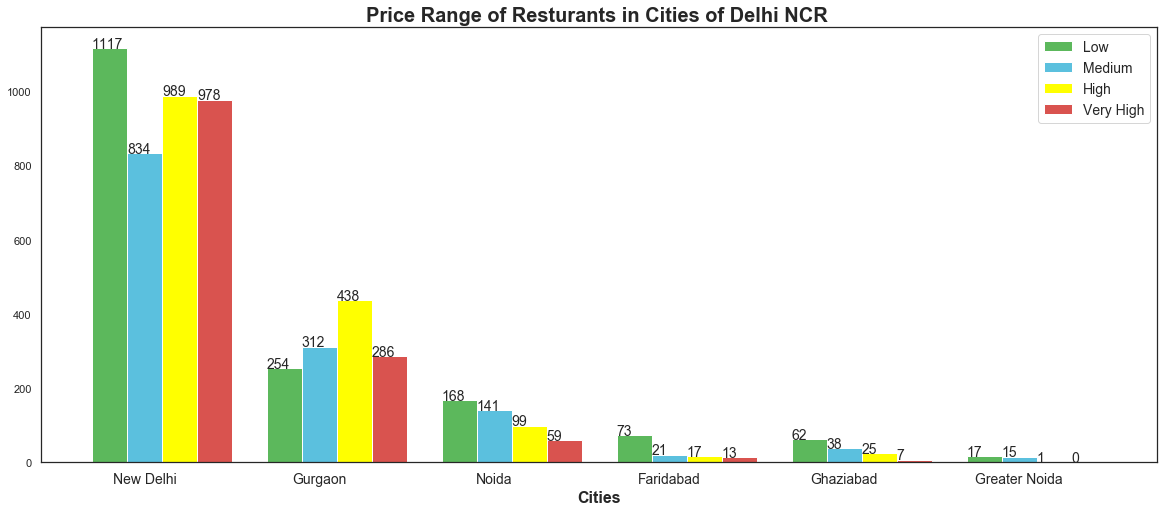

In [70]:
ax = plt.subplots(figsize=(20,8))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [1117,254,168,73,62,17]
bars2 = [834,312,141,21,38,15]
bars3 = [989,438,99,17,25,1]
bars4 = [978,286,59,13,7,0]
bars5 = bars1 + bars2 + bars3 + bars4
  
# Set position of bar on X axis
r1 = [1,6,11,16,21,26] 
r2 = [2,7,12,17,22,27] 
r3 = [3,8,13,18,23,28]
r4 = [4,9,14,19,24,29] 
r5 = r1 + r2 + r3 +r4 

 
# Make the plot
plt.bar(r1, bars1, color='#5cb85c', width=barWidth, edgecolor='white', label='Low')
plt.bar(r2, bars2, color='#5bc0de', width=barWidth, edgecolor='white', label='Medium')
plt.bar(r3, bars3, color='yellow', width=barWidth, edgecolor='white', label='High')
plt.bar(r4, bars4, color='#d9534f', width=barWidth, edgecolor='white', label='Very High')

# Add xticks on the middle of the group bars
plt.xlabel('Cities', fontweight='bold',fontsize=(16))
plt.xticks([r + barWidth for r in range(len(r5)+5)], [' ','New Delhi',' ',' ',' ',' ','Gurgaon',' ',' ',' ',' ','Noida',' ',' ',' ',' ','Faridabad',' ',' ',' ',' ','Ghaziabad',' ',' ',' ',' ','Greater Noida'],fontsize=(14))
plt.title('Price Range of Resturants in Cities of Delhi NCR ',fontweight='bold',fontsize=20)

# Create labels 
label = ['1117','254','168','73','62','17','834','312','141','21','38','15','989','438','99','17','25','1','978','286','59','13','7','0'] 
# Text on the top of each barplot 
for i in range(len(r5)): plt.text(x = r5[i]-0.5 , y = bars5[i]+0.1, s = label[ i], size = 14)
# Create legend & Show graphic
plt.legend(fontsize = 14)
plt.show()

### Rating Text

In [71]:
df_ncr1['Rating Text'].value_counts()

Very Good    3024
Good         1187
Excellent    1016
Average       306
Poor          274
Not rated     157
Name: Rating Text, dtype: int64

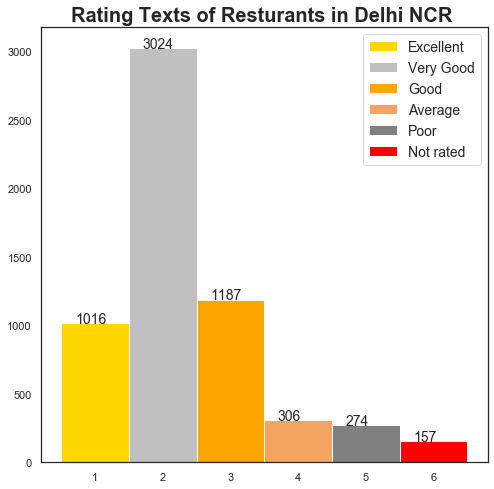

In [72]:
ax = plt.subplots(figsize=(8,8))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [1016]
bars2 = [3024]
bars3 = [1187]
bars4 = [306]
bars5 = [274]
bars6 = [157]
bars7 = bars1 + bars2 + bars3 + bars4 + bars5 + bars6
 
# Set position of bar on X axis
r1 = [1]
r2 = [2]
r3 = [3]
r4 = [4]
r5 = [5]
r6 = [6]
r7 = r1 + r2 + r3 +r4 +r5 +r6 
 
# Make the plot
plt.bar(r1, bars1, color='gold', width=barWidth, edgecolor='white', label='Excellent')
plt.bar(r2, bars2, color='silver', width=barWidth, edgecolor='white', label='Very Good')
plt.bar(r3, bars3, color='orange', width=barWidth, edgecolor='white', label='Good')
plt.bar(r4, bars4, color='sandybrown', width=barWidth, edgecolor='white', label='Average')
plt.bar(r5, bars5, color='grey', width=barWidth, edgecolor='white', label='Poor')
plt.bar(r6, bars6, color='red', width=barWidth, edgecolor='white', label='Not rated')


# Add xticks on the middle of the group bars

plt.title('Rating Texts of Resturants in Delhi NCR ',fontweight='bold',fontsize=20)

# Create labels 
label = ['1016','3024','1187','306','274','157'] 
# Text on the top of each barplot 
for i in range(len(r7)): plt.text(x = r7[i]-0.3 , y = bars7[i]+0.1, s = label[ i], size = 14)
# Create legend & Show graphic

plt.legend(fontsize = 14)
plt.show()

In [73]:
df_dli['Rating Text'].value_counts()

Very Good    2079
Good          785
Excellent     628
Average       169
Poor          151
Not rated     106
Name: Rating Text, dtype: int64

In [74]:
df_gur['Rating Text'].value_counts()

Very Good    661
Excellent    297
Good         210
Average       62
Poor          43
Not rated     17
Name: Rating Text, dtype: int64

In [75]:
df_noi['Rating Text'].value_counts()

Very Good    193
Good         100
Excellent     71
Poor          52
Average       37
Not rated     14
Name: Rating Text, dtype: int64

In [76]:
df_far['Rating Text'].value_counts()

Good         44
Very Good    38
Poor         16
Average      11
Not rated    11
Excellent     4
Name: Rating Text, dtype: int64

In [77]:
df_gh['Rating Text'].value_counts()

Very Good    46
Good         36
Average      22
Excellent    16
Not rated     6
Poor          6
Name: Rating Text, dtype: int64

In [78]:
df_grn['Rating Text'].value_counts()

Good         12
Very Good     7
Poor          6
Average       5
Not rated     3
Name: Rating Text, dtype: int64

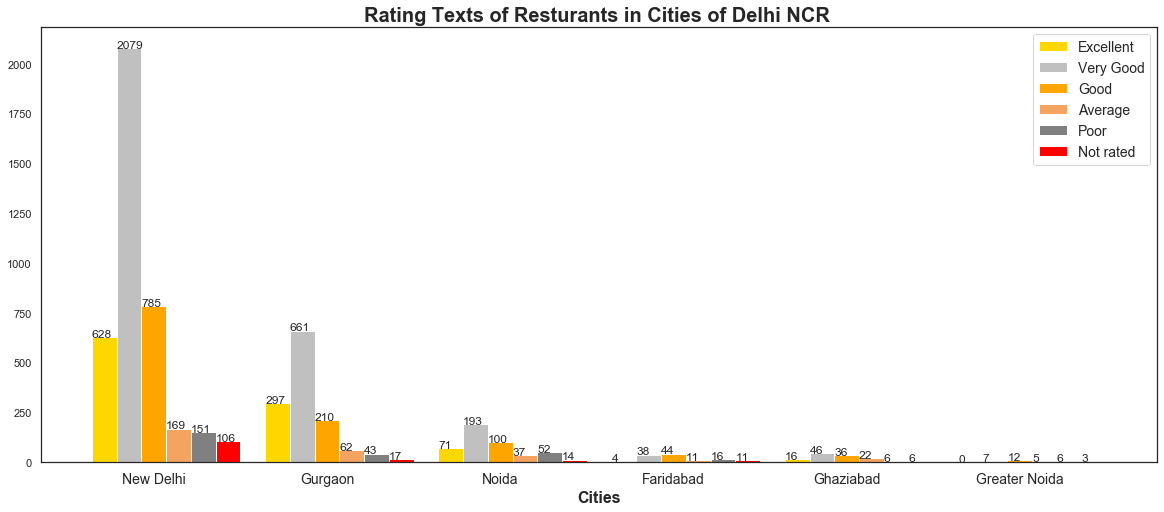

In [79]:
ax = plt.subplots(figsize=(20,8))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [628,297,71,4,16,0]
bars2 = [2079,661,193,38,46,7]
bars3 = [785,210,100,44,36,12]
bars4 = [169,62,37,11,22,5]
bars5 = [151,43,52,16,6,6]
bars6 = [106,17,14,11,6,3]
bars7 = bars1 + bars2 + bars3 + bars4 + bars5 + bars6
 
# Set position of bar on X axis
r1 = [1,8,15,22,29,36]
r2 = [2,9,16,23,30,37]
r3 = [3,10,17,24,31,38]
r4 = [4,11,18,25,32,39]
r5 = [5,12,19,26,33,40]
r6 = [6,13,20,27,34,41]
r7 = r1 + r2 + r3 +r4 +r5 +r6 
 
# Make the plot
plt.bar(r1, bars1, color='gold', width=barWidth, edgecolor='white', label='Excellent')
plt.bar(r2, bars2, color='silver', width=barWidth, edgecolor='white', label='Very Good')
plt.bar(r3, bars3, color='orange', width=barWidth, edgecolor='white', label='Good')
plt.bar(r4, bars4, color='sandybrown', width=barWidth, edgecolor='white', label='Average')
plt.bar(r5, bars5, color='grey', width=barWidth, edgecolor='white', label='Poor')
plt.bar(r6, bars6, color='red', width=barWidth, edgecolor='white', label='Not rated')



# Add xticks on the middle of the group bars
plt.xlabel('Cities', fontweight='bold',fontsize=(16))
plt.xticks([r + barWidth for r in range(len(r7)+5)], [' ',' ','New Delhi',' ',' ',' ',' ',' ',' ','Gurgaon',' ',' ',' ',' ',' ',' ','Noida',' ',' ',' ',' ',' ',' ','Faridabad',' ',' ',' ',' ',' ',' ','Ghaziabad',' ',' ',' ',' ',' ',' ','Greater Noida'],fontsize=(14))
plt.title('Rating Texts of Resturants in Cities of Delhi NCR ',fontweight='bold',fontsize=20)

# Create labels 
label = ['628','297','71','4','16','0','2079','661','193','38','46','7','785','210','100','44','36','12','169','62','37','11','22','5','151','43','52','16','6','6','106','17','14','11','6','3'] 
# Text on the top of each barplot 
for i in range(len(r7)): plt.text(x = r7[i]-0.5 , y = bars7[i]+0.1, s = label[ i], size = 12)
# Create legend & Show graphic

plt.legend(fontsize = 14)
plt.show()

### Table Booking

In [80]:
df_ncr1['Table Booking'].value_counts()

0    3718
1    2246
Name: Table Booking, dtype: int64

In [81]:
df_dli['Table Booking'].value_counts()

0    2361
1    1557
Name: Table Booking, dtype: int64

In [82]:
df_gur['Table Booking'].value_counts()

0    773
1    517
Name: Table Booking, dtype: int64

In [83]:
df_noi['Table Booking'].value_counts()

0    354
1    113
Name: Table Booking, dtype: int64

In [84]:
df_far['Table Booking'].value_counts()

0    102
1     22
Name: Table Booking, dtype: int64

In [85]:
df_gh['Table Booking'].value_counts()

0    100
1     32
Name: Table Booking, dtype: int64

In [86]:
df_grn['Table Booking'].value_counts()

0    28
1     5
Name: Table Booking, dtype: int64

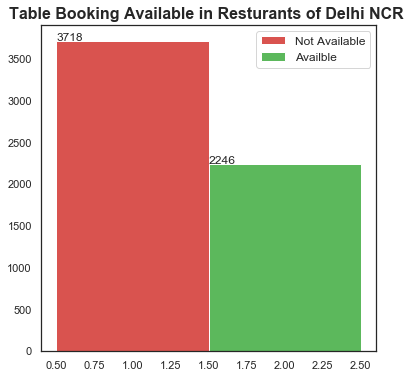

In [87]:
ax = plt.subplots(figsize=(6,6))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [3718]
bars2 = [2246]
bars3 = bars1 + bars2 
 
# Set position of bar on X axis
r1 = [1]
r2 = [2]
r3 = r1 + r2
 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Available')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Availble')

# Add xticks on the middle of the group bars

plt.title('Table Booking Available in Resturants of Delhi NCR ',fontweight='bold',fontsize=16)

# Create labels 
label = ['3718','2246'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.5 , y = bars3[i]+0.1, s = label[ i], size = 12)
# Create legend & Show graphic

plt.legend(fontsize = 12)
plt.show()

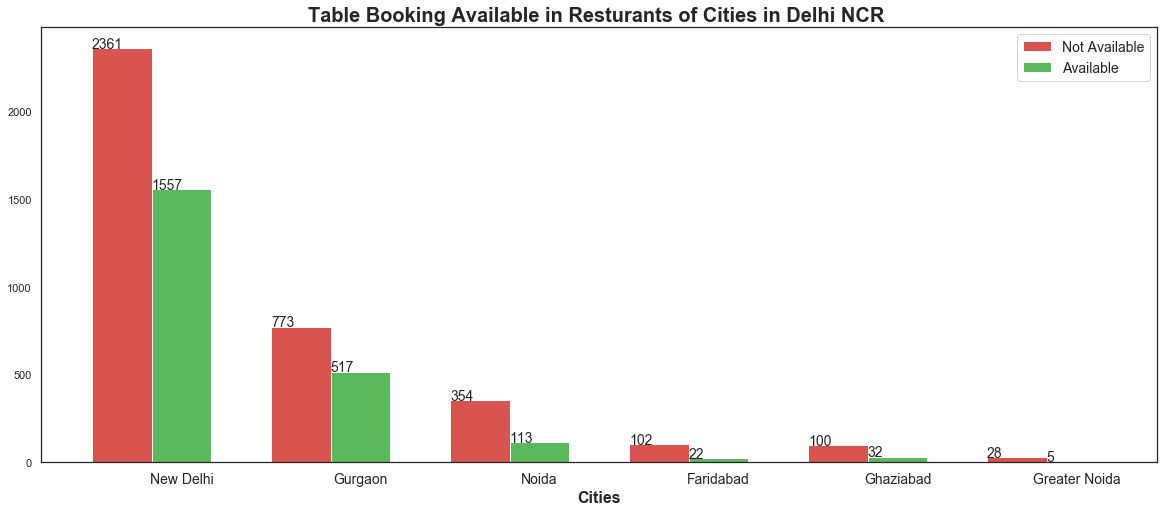

In [88]:
ax = plt.subplots(figsize=(20,8))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [2361,773,354,102,100,28]
bars2 = [1557,517,113,22,32,5]
bars3 = bars1 + bars2 
  
# Set position of bar on X axis
r1 = [1,4,7,10,13,16] 
r2 = [2,5,8,11,14,17] 
r3 = r1 + r2

 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Available')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Available')

# Add xticks on the middle of the group bars
plt.xlabel('Cities', fontweight='bold',fontsize=(16))
plt.xticks([r + barWidth for r in range(len(r3)+5)], [' ','New Delhi',' ',' ','Gurgaon',' ',' ','Noida',' ',' ','Faridabad',' ',' ','Ghaziabad',' ',' ','Greater Noida'],fontsize=(14))
plt.title('Table Booking Available in Resturants of Cities in Delhi NCR ',fontweight='bold',fontsize=20)

# Create labels 
label = ['2361','773','354','102','100','28','1557','517','113','22','32','5'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.5 , y = bars3[i]+0.1, s = label[ i], size = 14)
# Create legend & Show graphic
plt.legend(fontsize = 14)
plt.show()

### Delivery Available

In [89]:
df_ncr1['Delivery Available'].value_counts()

1    3104
0    2860
Name: Delivery Available, dtype: int64

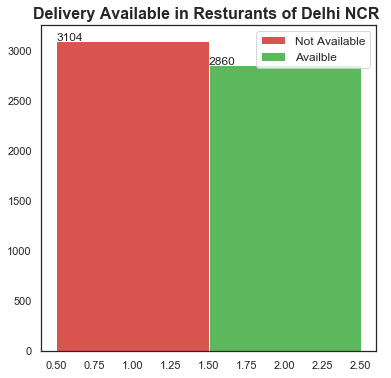

In [90]:
ax = plt.subplots(figsize=(6,6))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [3104]
bars2 = [2860]
bars3 = bars1 + bars2 
 
# Set position of bar on X axis
r1 = [1]
r2 = [2]
r3 = r1 + r2
 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Available')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Availble')

# Add xticks on the middle of the group bars

plt.title('Delivery Available in Resturants of Delhi NCR ',fontweight='bold',fontsize=16)

# Create labels 
label = ['3104','2860'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.5 , y = bars3[i]+0.1, s = label[ i], size = 12)
# Create legend & Show graphic

plt.legend(fontsize = 12)
plt.show()

In [91]:
df_dli['Delivery Available'].value_counts()

0    1980
1    1938
Name: Delivery Available, dtype: int64

In [92]:
df_gur['Delivery Available'].value_counts()

1    671
0    619
Name: Delivery Available, dtype: int64

In [93]:
df_noi['Delivery Available'].value_counts()

1    304
0    163
Name: Delivery Available, dtype: int64

In [94]:
df_far['Delivery Available'].value_counts()

1    64
0    60
Name: Delivery Available, dtype: int64

In [95]:
df_gh['Delivery Available'].value_counts()

1    99
0    33
Name: Delivery Available, dtype: int64

In [96]:
df_grn['Delivery Available'].value_counts()

1    28
0     5
Name: Delivery Available, dtype: int64

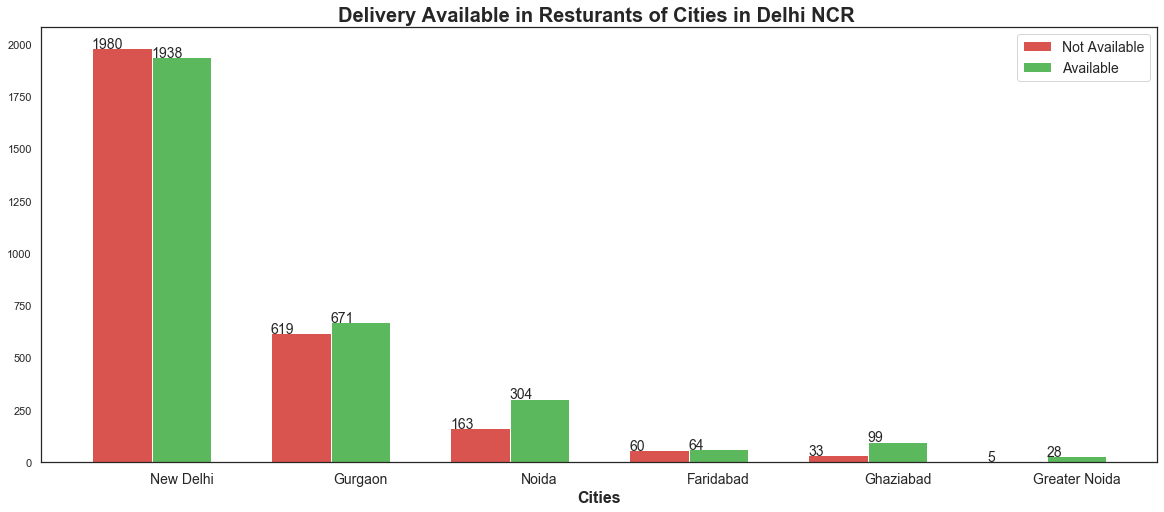

In [97]:
ax = plt.subplots(figsize=(20,8))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [1980,619,163,60,33,5]
bars2 = [1938,671,304,64,99,28]
bars3 = bars1 + bars2 
  
# Set position of bar on X axis
r1 = [1,4,7,10,13,16] 
r2 = [2,5,8,11,14,17] 
r3 = r1 + r2

 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Available')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Available')

# Add xticks on the middle of the group bars
plt.xlabel('Cities', fontweight='bold',fontsize=(16))
plt.xticks([r + barWidth for r in range(len(r3)+5)], [' ','New Delhi',' ',' ','Gurgaon',' ',' ','Noida',' ',' ','Faridabad',' ',' ','Ghaziabad',' ',' ','Greater Noida'],fontsize=(14))
plt.title('Delivery Available in Resturants of Cities in Delhi NCR ',fontweight='bold',fontsize=20)

# Create labels 
label = ['1980','619','163','60','33','5','1938','671','304','64','99','28'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.5 , y = bars3[i]+0.1, s = label[ i], size = 14)
# Create legend & Show graphic
plt.legend(fontsize = 14)
plt.show()

### Takeaway Available

In [98]:
df_ncr1['Takeaway Available'].value_counts()

1    4369
0    1595
Name: Takeaway Available, dtype: int64

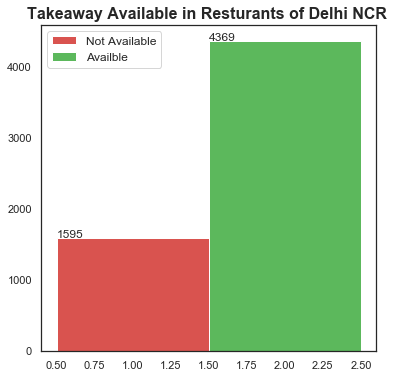

In [99]:
ax = plt.subplots(figsize=(6,6))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [1595]
bars2 = [4369]
bars3 = bars1 + bars2 
 
# Set position of bar on X axis
r1 = [1]
r2 = [2]
r3 = r1 + r2
 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Available')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Availble')

# Add xticks on the middle of the group bars

plt.title('Takeaway Available in Resturants of Delhi NCR ',fontweight='bold',fontsize=16)

# Create labels 
label = ['1595','4369'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.5 , y = bars3[i]+0.1, s = label[ i], size = 12)
# Create legend & Show graphic

plt.legend(fontsize = 12)
plt.show()

In [100]:
df_dli['Takeaway Available'].value_counts()

1    2800
0    1118
Name: Takeaway Available, dtype: int64

In [101]:
df_gur['Takeaway Available'].value_counts()

1    915
0    375
Name: Takeaway Available, dtype: int64

In [102]:
df_noi['Takeaway Available'].value_counts()

1    408
0     59
Name: Takeaway Available, dtype: int64

In [103]:
df_far['Takeaway Available'].value_counts()

1    108
0     16
Name: Takeaway Available, dtype: int64

In [104]:
df_gh['Takeaway Available'].value_counts()

1    112
0     20
Name: Takeaway Available, dtype: int64

In [105]:
df_grn['Takeaway Available'].value_counts()

1    26
0     7
Name: Takeaway Available, dtype: int64

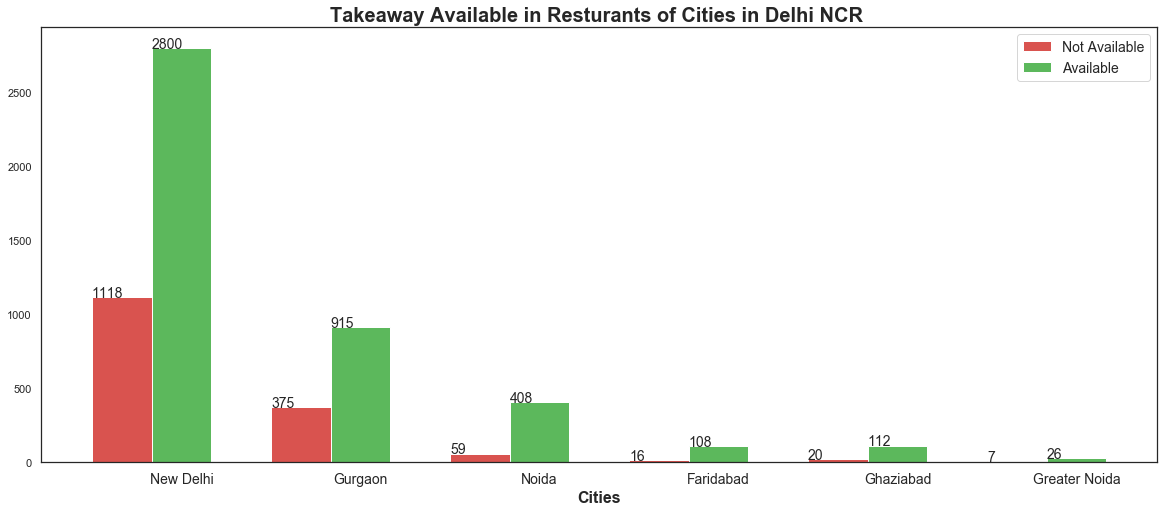

In [106]:
ax = plt.subplots(figsize=(20,8))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [1118,375,59,16,20,7]
bars2 = [2800,915,408,108,112,26]
bars3 = bars1 + bars2 
  
# Set position of bar on X axis
r1 = [1,4,7,10,13,16] 
r2 = [2,5,8,11,14,17] 
r3 = r1 + r2

 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Available')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Available')

# Add xticks on the middle of the group bars
plt.xlabel('Cities', fontweight='bold',fontsize=(16))
plt.xticks([r + barWidth for r in range(len(r3)+5)], [' ','New Delhi',' ',' ','Gurgaon',' ',' ','Noida',' ',' ','Faridabad',' ',' ','Ghaziabad',' ',' ','Greater Noida'],fontsize=(14))
plt.title('Takeaway Available in Resturants of Cities in Delhi NCR ',fontweight='bold',fontsize=20)

# Create labels 
label = ['1118','375','59','16','20','7','2800','915','408','108','112','26'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.5 , y = bars3[i]+0.1, s = label[ i], size = 14)
# Create legend & Show graphic
plt.legend(fontsize = 14)
plt.show()

### Pure veg

In [107]:
df_ncr1['Pure Veg'].value_counts()

0    4987
1     977
Name: Pure Veg, dtype: int64

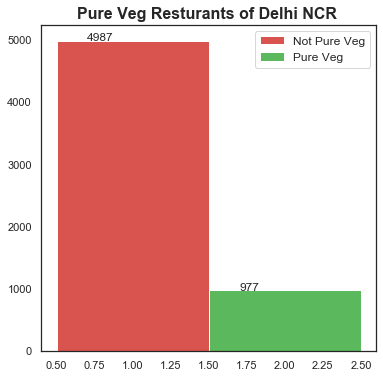

In [108]:
ax = plt.subplots(figsize=(6,6))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [4987]
bars2 = [977]
bars3 = bars1 + bars2 
 
# Set position of bar on X axis
r1 = [1]
r2 = [2]
r3 = r1 + r2
 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Pure Veg')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Pure Veg')

# Add xticks on the middle of the group bars

plt.title('Pure Veg Resturants of Delhi NCR ',fontweight='bold',fontsize=16)

# Create labels 
label = ['4987','977'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.3 , y = bars3[i]+0.1, s = label[ i], size = 12)
# Create legend & Show graphic

plt.legend(fontsize = 12)
plt.show()

In [109]:
df_dli['Pure Veg'].value_counts()

0    3229
1     689
Name: Pure Veg, dtype: int64

In [110]:
df_gur['Pure Veg'].value_counts()

0    1147
1     143
Name: Pure Veg, dtype: int64

In [111]:
df_noi['Pure Veg'].value_counts()

0    391
1     76
Name: Pure Veg, dtype: int64

In [112]:
df_far['Pure Veg'].value_counts()

0    95
1    29
Name: Pure Veg, dtype: int64

In [113]:
df_gh['Pure Veg'].value_counts()

0    96
1    36
Name: Pure Veg, dtype: int64

In [114]:
df_grn['Pure Veg'].value_counts()

0    29
1     4
Name: Pure Veg, dtype: int64

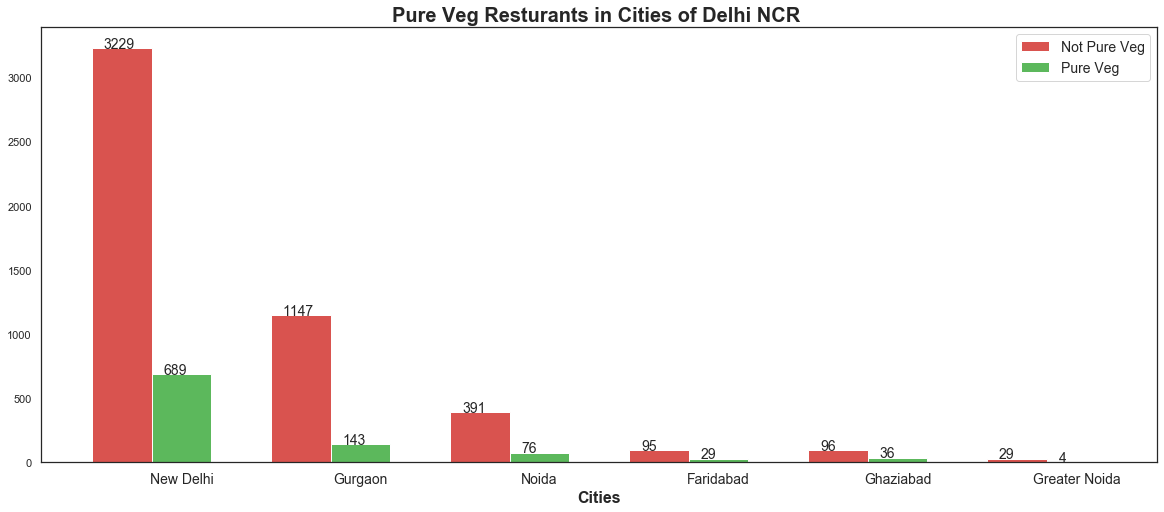

In [115]:
ax = plt.subplots(figsize=(20,8))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [3229,1147,391,95,96,29]
bars2 = [689,143,76,29,36,4]
bars3 = bars1 + bars2 
  
# Set position of bar on X axis
r1 = [1,4,7,10,13,16] 
r2 = [2,5,8,11,14,17] 
r3 = r1 + r2

 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Pure Veg')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Pure Veg')

# Add xticks on the middle of the group bars
plt.xlabel('Cities', fontweight='bold',fontsize=(16))
plt.xticks([r + barWidth for r in range(len(r3)+5)], [' ','New Delhi',' ',' ','Gurgaon',' ',' ','Noida',' ',' ','Faridabad',' ',' ','Ghaziabad',' ',' ','Greater Noida'],fontsize=(14))
plt.title('Pure Veg Resturants in Cities of Delhi NCR ',fontweight='bold',fontsize=20)

# Create labels 
label = ['3229','1147','391','95','96','29','689','143','76','29','36','4'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.3 , y = bars3[i]+0.1, s = label[ i], size = 14)
# Create legend & Show graphic
plt.legend(fontsize = 14)
plt.show()

### Parking Available

In [116]:
df_ncr1['Parking Available'].value_counts()

0    3919
1    2045
Name: Parking Available, dtype: int64

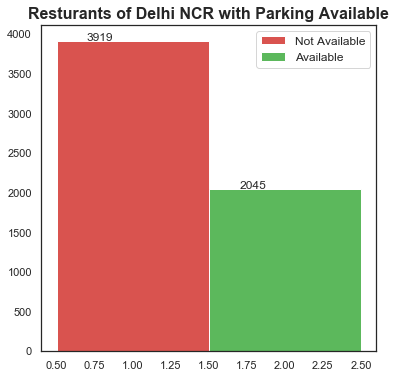

In [117]:
ax = plt.subplots(figsize=(6,6))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [3919]
bars2 = [2045]
bars3 = bars1 + bars2 
 
# Set position of bar on X axis
r1 = [1]
r2 = [2]
r3 = r1 + r2
 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Available')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Available')

# Add xticks on the middle of the group bars

plt.title('Resturants of Delhi NCR with Parking Available',fontweight='bold',fontsize=16)

# Create labels 
label = ['3919','2045'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.3 , y = bars3[i]+0.1, s = label[ i], size = 12)
# Create legend & Show graphic

plt.legend(fontsize = 12)
plt.show()

In [118]:
df_dli['Parking Available'].value_counts()

0    2613
1    1305
Name: Parking Available, dtype: int64

In [119]:
df_gur['Parking Available'].value_counts()

0    878
1    412
Name: Parking Available, dtype: int64

In [120]:
df_noi['Parking Available'].value_counts()

0    256
1    211
Name: Parking Available, dtype: int64

In [121]:
df_far['Parking Available'].value_counts()

0    77
1    47
Name: Parking Available, dtype: int64

In [122]:
df_gh['Parking Available'].value_counts()

0    76
1    56
Name: Parking Available, dtype: int64

In [123]:
df_grn['Parking Available'].value_counts()

0    19
1    14
Name: Parking Available, dtype: int64

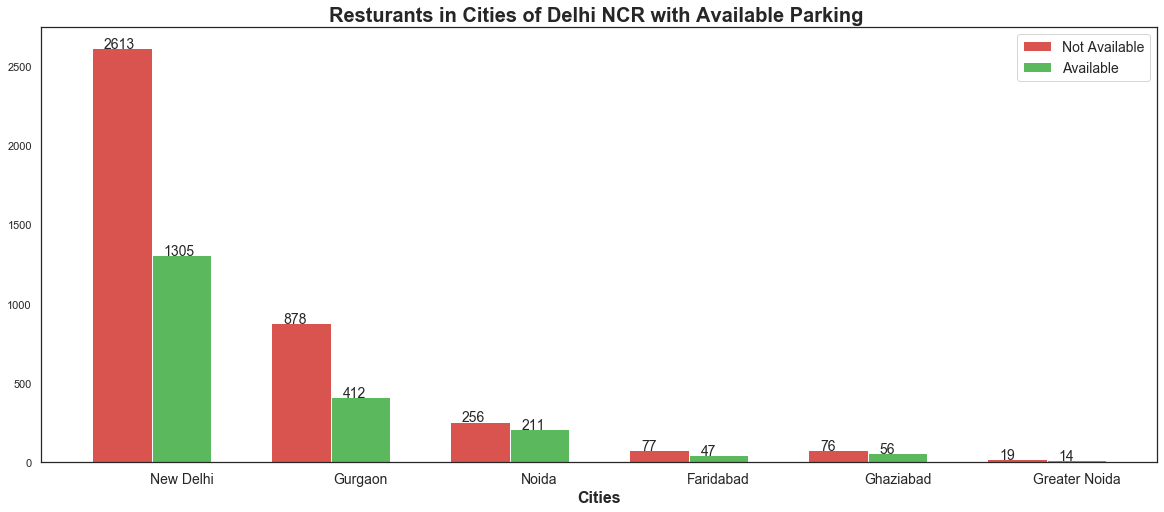

In [124]:
ax = plt.subplots(figsize=(20,8))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [2613,878,256,77,76,19]
bars2 = [1305,412,211,47,56,14]
bars3 = bars1 + bars2 
  
# Set position of bar on X axis
r1 = [1,4,7,10,13,16] 
r2 = [2,5,8,11,14,17] 
r3 = r1 + r2

 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Available')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Available')

# Add xticks on the middle of the group bars
plt.xlabel('Cities', fontweight='bold',fontsize=(16))
plt.xticks([r + barWidth for r in range(len(r3)+5)], [' ','New Delhi',' ',' ','Gurgaon',' ',' ','Noida',' ',' ','Faridabad',' ',' ','Ghaziabad',' ',' ','Greater Noida'],fontsize=(14))
plt.title('Resturants in Cities of Delhi NCR with Available Parking ',fontweight='bold',fontsize=20)

# Create labels 
label = ['2613','878','256','77','76','19','1305','412','211','47','56','14'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.3 , y = bars3[i]+0.1, s = label[ i], size = 14)
# Create legend & Show graphic
plt.legend(fontsize = 14)
plt.show()

### Breakfast

In [125]:
df_ncr1['Breakfast'].value_counts()

0    4806
1    1158
Name: Breakfast, dtype: int64

### Lunch

In [126]:
df_ncr1['Lunch'].value_counts()

1    4873
0    1091
Name: Lunch, dtype: int64

### Brunch

In [127]:
df_ncr1['Brunch'].value_counts()

0    5556
1     408
Name: Brunch, dtype: int64

### Dinner

In [128]:
df_ncr1['Dinner'].value_counts()

1    5079
0     885
Name: Dinner, dtype: int64

### Indoor Seating

In [129]:
df_ncr1['Indoor Seating'].value_counts()   

1    4625
0    1339
Name: Indoor Seating, dtype: int64

### Outdoor Seating

In [130]:
df_ncr1['Outdoor Seating'].value_counts()

0    4738
1    1226
Name: Outdoor Seating, dtype: int64

### Rooftop

In [131]:
df_ncr1['Rooftop'].value_counts()

0    5609
1     355
Name: Rooftop, dtype: int64

### No Seating

In [132]:
df_ncr1['No Seating'].value_counts()

0    5094
1     870
Name: No Seating, dtype: int64

### Liquor severd

In [133]:
df_ncr1['Liquor served'].value_counts()

0    4057
1    1907
Name: Liquor served, dtype: int64

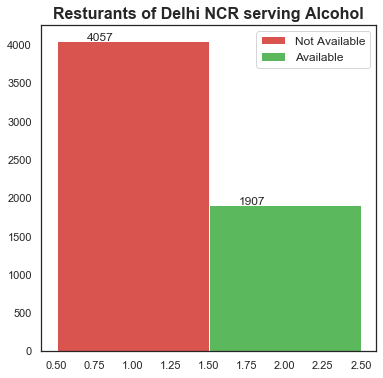

In [134]:
ax = plt.subplots(figsize=(6,6))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [4057]
bars2 = [1907]
bars3 = bars1 + bars2 
 
# Set position of bar on X axis
r1 = [1]
r2 = [2]
r3 = r1 + r2
 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Available')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Available')

# Add xticks on the middle of the group bars

plt.title('Resturants of Delhi NCR serving Alcohol',fontweight='bold',fontsize=16)

# Create labels 
label = ['4057','1907'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.3 , y = bars3[i]+0.1, s = label[ i], size = 12)
# Create legend & Show graphic

plt.legend(fontsize = 12)
plt.show()

In [135]:
df_dli['Liquor served'].value_counts()

0    2584
1    1334
Name: Liquor served, dtype: int64

In [136]:
df_gur['Liquor served'].value_counts()

0    921
1    369
Name: Liquor served, dtype: int64

In [137]:
df_noi['Liquor served'].value_counts()

0    337
1    130
Name: Liquor served, dtype: int64

In [138]:
df_far['Liquor served'].value_counts()

0    107
1     17
Name: Liquor served, dtype: int64

In [139]:
df_gh['Liquor served'].value_counts()

0    82
1    50
Name: Liquor served, dtype: int64

In [140]:
df_grn['Liquor served'].value_counts()

0    26
1     7
Name: Liquor served, dtype: int64

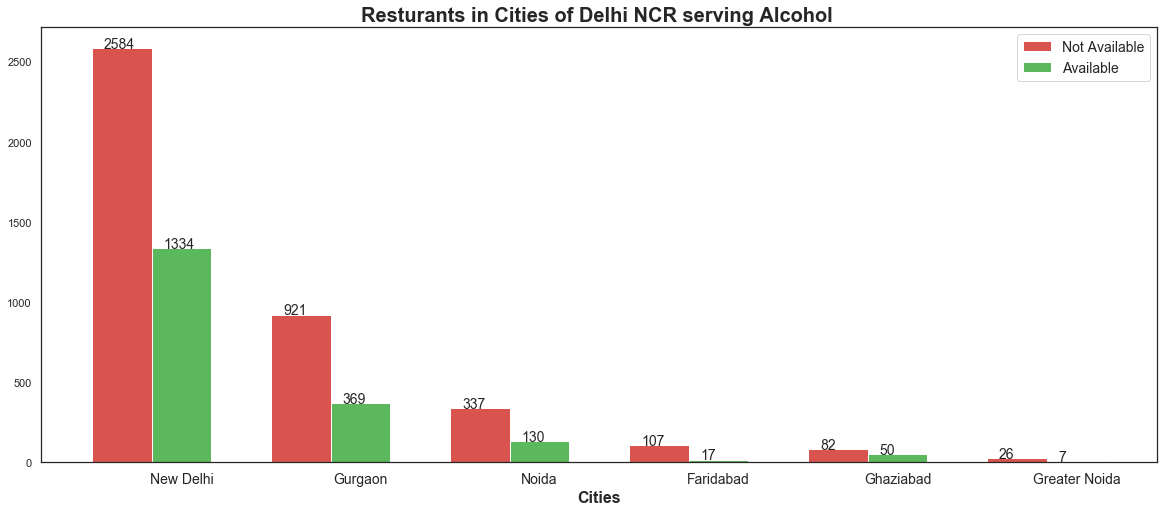

In [141]:
ax = plt.subplots(figsize=(20,8))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [2584,921,337,107,82,26]
bars2 = [1334,369,130,17,50,7]
bars3 = bars1 + bars2 
  
# Set position of bar on X axis
r1 = [1,4,7,10,13,16] 
r2 = [2,5,8,11,14,17] 
r3 = r1 + r2

 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Available')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Available')

# Add xticks on the middle of the group bars
plt.xlabel('Cities', fontweight='bold',fontsize=(16))
plt.xticks([r + barWidth for r in range(len(r3)+5)], [' ','New Delhi',' ',' ','Gurgaon',' ',' ','Noida',' ',' ','Faridabad',' ',' ','Ghaziabad',' ',' ','Greater Noida'],fontsize=(14))
plt.title('Resturants in Cities of Delhi NCR serving Alcohol ',fontweight='bold',fontsize=20)

# Create labels 
label = ['2584','921','337','107','82','26','1334','369','130','17','50','7'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.3 , y = bars3[i]+0.1, s = label[ i], size = 14)
# Create legend & Show graphic
plt.legend(fontsize = 14)
plt.show()

### Digital payment

In [142]:
df_ncr1['Digital payment'].value_counts()

0    4245
1    1719
Name: Digital payment, dtype: int64

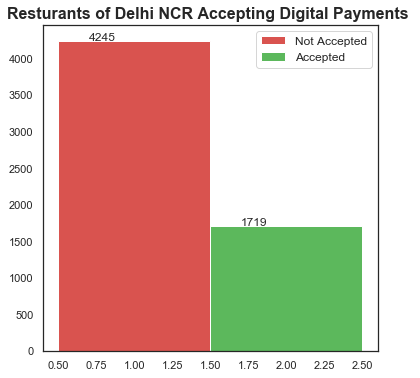

In [143]:
ax = plt.subplots(figsize=(6,6))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [4245]
bars2 = [1719]
bars3 = bars1 + bars2 
 
# Set position of bar on X axis
r1 = [1]
r2 = [2]
r3 = r1 + r2
 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Accepted')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Accepted')

# Add xticks on the middle of the group bars

plt.title('Resturants of Delhi NCR Accepting Digital Payments ',fontweight='bold',fontsize=16)

# Create labels 
label = ['4245','1719'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.3 , y = bars3[i]+0.1, s = label[ i], size = 12)
# Create legend & Show graphic

plt.legend(fontsize = 12)
plt.show()

In [144]:
df_dli['Digital payment'].value_counts()

0    2946
1     972
Name: Digital payment, dtype: int64

In [145]:
df_gur['Digital payment'].value_counts()

0    890
1    400
Name: Digital payment, dtype: int64

In [146]:
df_noi['Digital payment'].value_counts()

0    260
1    207
Name: Digital payment, dtype: int64

In [147]:
df_far['Digital payment'].value_counts()

0    75
1    49
Name: Digital payment, dtype: int64

In [148]:
df_gh['Digital payment'].value_counts()

1    69
0    63
Name: Digital payment, dtype: int64

In [149]:
df_grn['Digital payment'].value_counts()

1    22
0    11
Name: Digital payment, dtype: int64

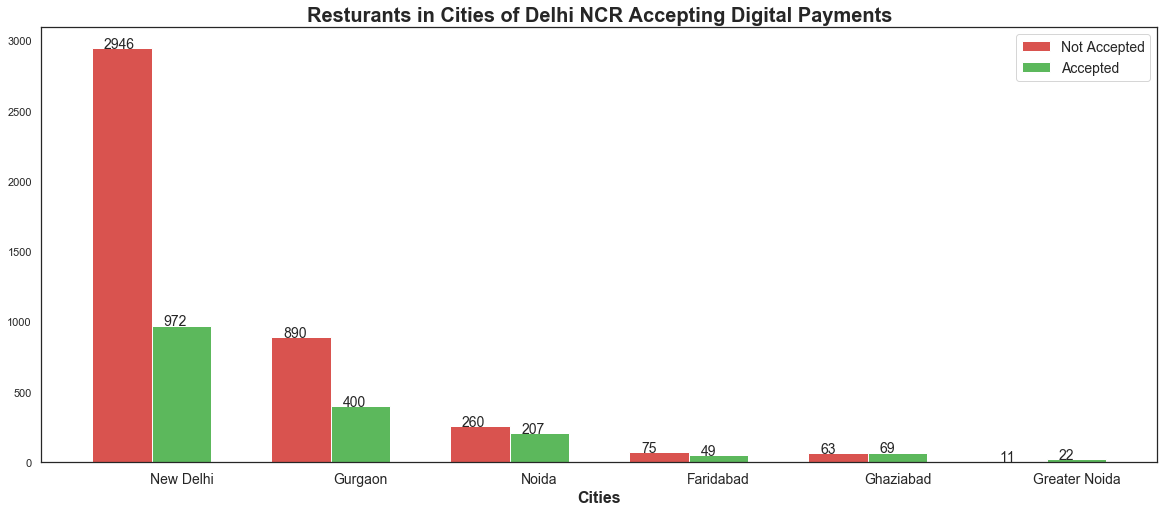

In [150]:
ax = plt.subplots(figsize=(20,8))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [2946,890,260,75,63,11]
bars2 = [972,400,207,49,69,22]
bars3 = bars1 + bars2 
  
# Set position of bar on X axis
r1 = [1,4,7,10,13,16] 
r2 = [2,5,8,11,14,17] 
r3 = r1 + r2

 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Accepted')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Accepted')

# Add xticks on the middle of the group bars
plt.xlabel('Cities', fontweight='bold',fontsize=(16))
plt.xticks([r + barWidth for r in range(len(r3)+5)], [' ','New Delhi',' ',' ','Gurgaon',' ',' ','Noida',' ',' ','Faridabad',' ',' ','Ghaziabad',' ',' ','Greater Noida'],fontsize=(14))
plt.title('Resturants in Cities of Delhi NCR Accepting Digital Payments',fontweight='bold',fontsize=20)

# Create labels 
label = ['2946','890','260','75','63','11','972','400','207','49','69','22'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.3 , y = bars3[i]+0.1, s = label[ i], size = 14)
# Create legend & Show graphic
plt.legend(fontsize = 14)
plt.show()

### Card payment

In [151]:
df_ncr1['Card payment'].value_counts()

1    4670
0    1294
Name: Card payment, dtype: int64

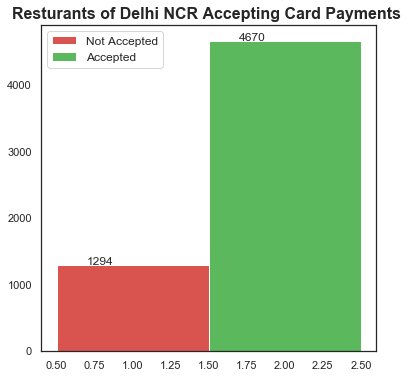

In [152]:
ax = plt.subplots(figsize=(6,6))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [1294]
bars2 = [4670]
bars3 = bars1 + bars2 
 
# Set position of bar on X axis
r1 = [1]
r2 = [2]
r3 = r1 + r2
 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Accepted')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Accepted')

# Add xticks on the middle of the group bars

plt.title('Resturants of Delhi NCR Accepting Card Payments ',fontweight='bold',fontsize=16)

# Create labels 
label = ['1294','4670'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.3 , y = bars3[i]+0.1, s = label[ i], size = 12)
# Create legend & Show graphic

plt.legend(fontsize = 12)
plt.show()

In [153]:
df_dli['Card payment'].value_counts()

1    2997
0     921
Name: Card payment, dtype: int64

In [154]:
df_gur['Card payment'].value_counts()

1    1118
0     172
Name: Card payment, dtype: int64

In [155]:
df_noi['Card payment'].value_counts()

1    363
0    104
Name: Card payment, dtype: int64

In [156]:
df_far['Card payment'].value_counts()

1    78
0    46
Name: Card payment, dtype: int64

In [157]:
df_gh['Card payment'].value_counts()

1    88
0    44
Name: Card payment, dtype: int64

In [158]:
df_grn['Card payment'].value_counts()

1    26
0     7
Name: Card payment, dtype: int64

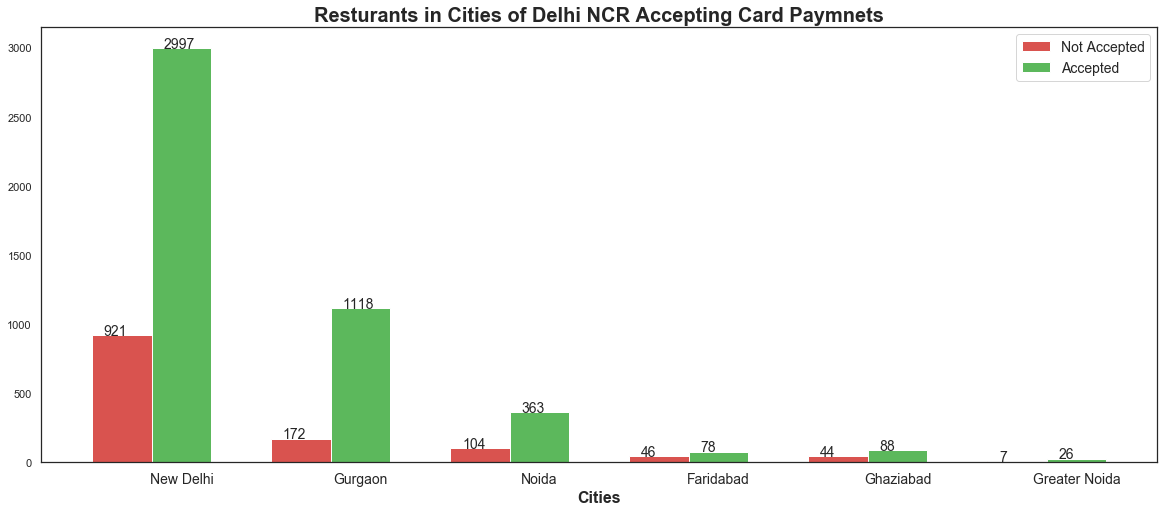

In [159]:
ax = plt.subplots(figsize=(20,8))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [921,172,104,46,44,7]
bars2 = [2997,1118,363,78,88,26]
bars3 = bars1 + bars2 
  
# Set position of bar on X axis
r1 = [1,4,7,10,13,16] 
r2 = [2,5,8,11,14,17] 
r3 = r1 + r2

 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Accepted')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Accepted')

# Add xticks on the middle of the group bars
plt.xlabel('Cities', fontweight='bold',fontsize=(16))
plt.xticks([r + barWidth for r in range(len(r3)+5)], [' ','New Delhi',' ',' ','Gurgaon',' ',' ','Noida',' ',' ','Faridabad',' ',' ','Ghaziabad',' ',' ','Greater Noida'],fontsize=(14))
plt.title('Resturants in Cities of Delhi NCR Accepting Card Paymnets',fontweight='bold',fontsize=20)

# Create labels 
label = ['921','172','104','46','44','7','2997','1118','363','78','88','26'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.3 , y = bars3[i]+0.1, s = label[ i], size = 14)
# Create legend & Show graphic
plt.legend(fontsize = 14)
plt.show()

### Cash payment

In [160]:
df_ncr1['Cash payment'].value_counts()

1    5959
0       5
Name: Cash payment, dtype: int64

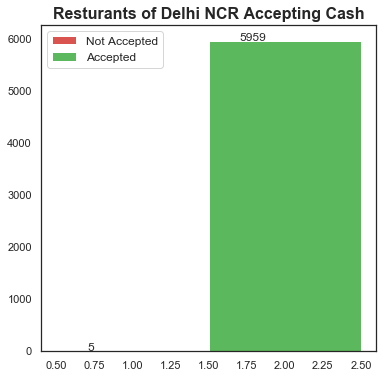

In [161]:
ax = plt.subplots(figsize=(6,6))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [5]
bars2 = [5959]
bars3 = bars1 + bars2 
 
# Set position of bar on X axis
r1 = [1]
r2 = [2]
r3 = r1 + r2
 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Accepted')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Accepted')

# Add xticks on the middle of the group bars

plt.title('Resturants of Delhi NCR Accepting Cash',fontweight='bold',fontsize=16)

# Create labels 
label = ['5','5959'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.3 , y = bars3[i]+0.1, s = label[ i], size = 12)
# Create legend & Show graphic

plt.legend(fontsize = 12)
plt.show()

In [162]:
df_dli['Cash payment'].value_counts()

1    3915
0       3
Name: Cash payment, dtype: int64

In [163]:
df_gur['Cash payment'].value_counts()

1    1288
0       2
Name: Cash payment, dtype: int64

In [164]:
df_noi['Cash payment'].value_counts()

1    467
Name: Cash payment, dtype: int64

In [165]:
df_far['Cash payment'].value_counts()

1    124
Name: Cash payment, dtype: int64

In [166]:
df_gh['Cash payment'].value_counts()

1    132
Name: Cash payment, dtype: int64

In [167]:
df_grn['Cash payment'].value_counts()

1    33
Name: Cash payment, dtype: int64

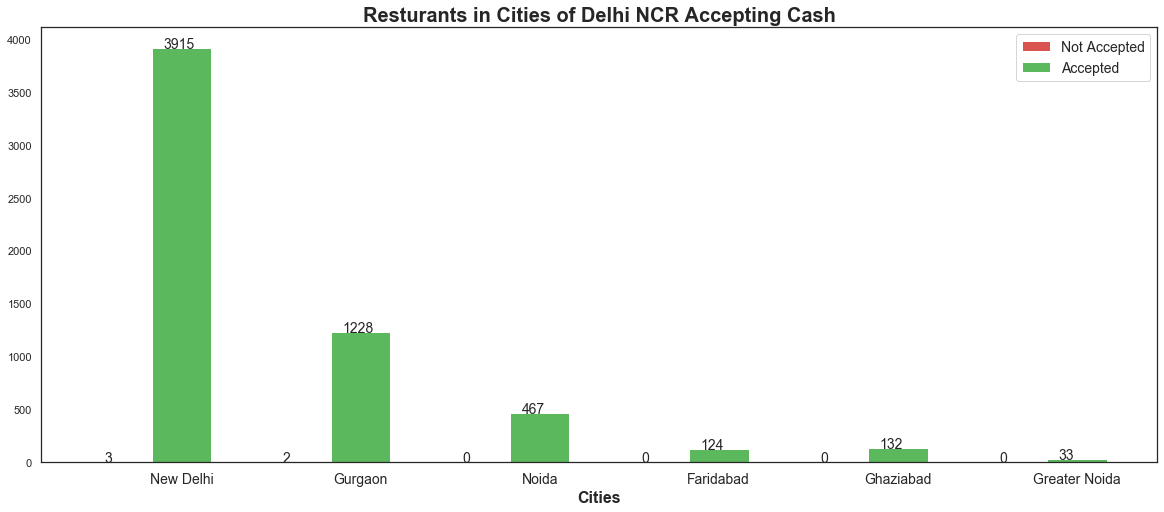

In [168]:
ax = plt.subplots(figsize=(20,8))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [3,2,0,0,0,0]
bars2 = [3915,1228,467,124,132,33]
bars3 = bars1 + bars2 
  
# Set position of bar on X axis
r1 = [1,4,7,10,13,16] 
r2 = [2,5,8,11,14,17] 
r3 = r1 + r2

 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Accepted')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Accepted')

# Add xticks on the middle of the group bars
plt.xlabel('Cities', fontweight='bold',fontsize=(16))
plt.xticks([r + barWidth for r in range(len(r3)+5)], [' ','New Delhi',' ',' ','Gurgaon',' ',' ','Noida',' ',' ','Faridabad',' ',' ','Ghaziabad',' ',' ','Greater Noida'],fontsize=(14))
plt.title('Resturants in Cities of Delhi NCR Accepting Cash',fontweight='bold',fontsize=20)

# Create labels 
label = ['3','2','0','0','0','0','3915','1228','467','124','132','33'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.3 , y = bars3[i]+0.1, s = label[ i], size = 14)
# Create legend & Show graphic
plt.legend(fontsize = 14)
plt.show()

### Free Wifi

In [169]:
df_ncr1['Free Wifi'].value_counts()

0    5636
1     328
Name: Free Wifi, dtype: int64

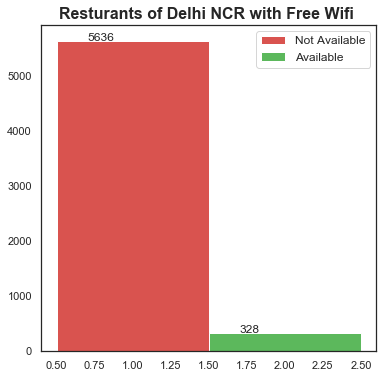

In [170]:
ax = plt.subplots(figsize=(6,6))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [5636]
bars2 = [328]
bars3 = bars1 + bars2 
 
# Set position of bar on X axis
r1 = [1]
r2 = [2]
r3 = r1 + r2
 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Available')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Available')

# Add xticks on the middle of the group bars

plt.title('Resturants of Delhi NCR with Free Wifi ',fontweight='bold',fontsize=16)

# Create labels 
label = ['5636','328'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.3 , y = bars3[i]+0.1, s = label[ i], size = 12)
# Create legend & Show graphic

plt.legend(fontsize = 12)
plt.show()

In [171]:
df_dli['Free Wifi'].value_counts()

0    3694
1     224
Name: Free Wifi, dtype: int64

In [172]:
df_gur['Free Wifi'].value_counts()

0    1208
1      82
Name: Free Wifi, dtype: int64

In [173]:
df_noi['Free Wifi'].value_counts()

0    453
1     14
Name: Free Wifi, dtype: int64

In [174]:
df_far['Free Wifi'].value_counts()

0    123
1      1
Name: Free Wifi, dtype: int64

In [175]:
df_gh['Free Wifi'].value_counts()

0    125
1      7
Name: Free Wifi, dtype: int64

In [176]:
df_grn['Free Wifi'].value_counts()

0    33
Name: Free Wifi, dtype: int64

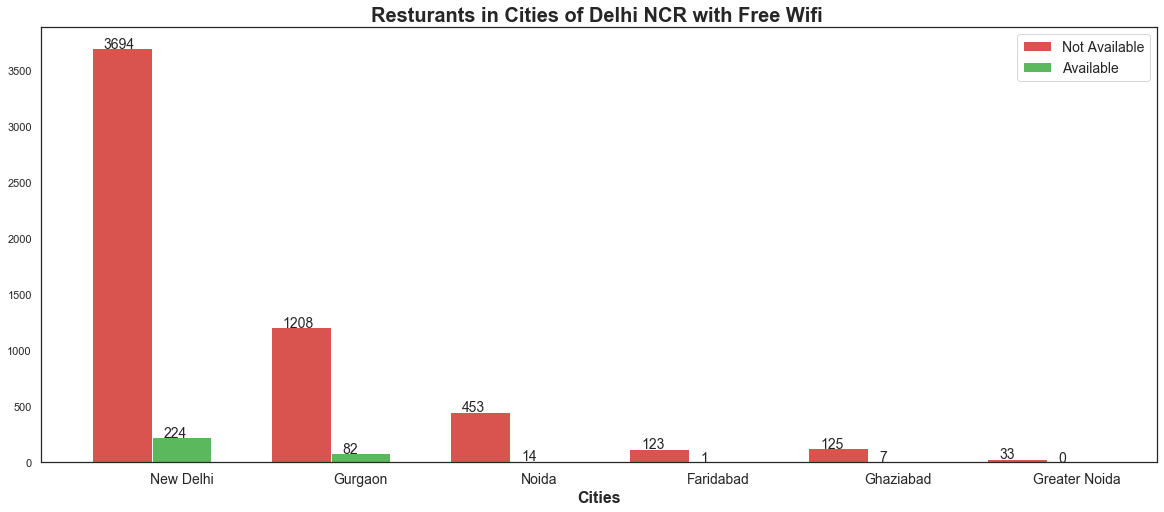

In [177]:
ax = plt.subplots(figsize=(20,8))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [3694,1208,453,123,125,33]
bars2 = [224,82,14,1,7,0]
bars3 = bars1 + bars2 
  
# Set position of bar on X axis
r1 = [1,4,7,10,13,16] 
r2 = [2,5,8,11,14,17] 
r3 = r1 + r2

 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Available')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Available')

# Add xticks on the middle of the group bars
plt.xlabel('Cities', fontweight='bold',fontsize=(16))
plt.xticks([r + barWidth for r in range(len(r3)+5)], [' ','New Delhi',' ',' ','Gurgaon',' ',' ','Noida',' ',' ','Faridabad',' ',' ','Ghaziabad',' ',' ','Greater Noida'],fontsize=(14))
plt.title('Resturants in Cities of Delhi NCR with Free Wifi ',fontweight='bold',fontsize=20)

# Create labels 
label = ['3694','1208','453','123','125','33','224','82','14','1','7','0'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.3 , y = bars3[i]+0.1, s = label[ i], size = 14)
# Create legend & Show graphic
plt.legend(fontsize = 14)
plt.show()

### AC

In [178]:
df_ncr1['A.C.'].value_counts()

1    4241
0    1723
Name: A.C., dtype: int64

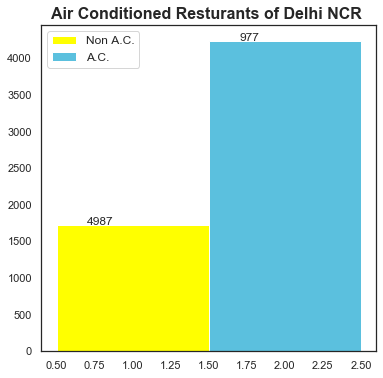

In [179]:
ax = plt.subplots(figsize=(6,6))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [1723]
bars2 = [4241]
bars3 = bars1 + bars2 
 
# Set position of bar on X axis
r1 = [1]
r2 = [2]
r3 = r1 + r2
 
# Make the plot
plt.bar(r1, bars1, color='yellow', width=barWidth, edgecolor='white', label='Non A.C.')
plt.bar(r2, bars2, color='#5bc0de', width=barWidth, edgecolor='white', label='A.C.')

# Add xticks on the middle of the group bars

plt.title('Air Conditioned Resturants of Delhi NCR ',fontweight='bold',fontsize=16)

# Create labels 
label = ['4987','977'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.3 , y = bars3[i]+0.1, s = label[ i], size = 12)
# Create legend & Show graphic

plt.legend(fontsize = 12)
plt.show()

In [180]:
df_dli['A.C.'].value_counts()

1    2801
0    1117
Name: A.C., dtype: int64

In [181]:
df_gur['A.C.'].value_counts()

1    973
0    317
Name: A.C., dtype: int64

In [182]:
df_noi['A.C.'].value_counts()

1    311
0    156
Name: A.C., dtype: int64

In [183]:
df_far['A.C.'].value_counts()

1    69
0    55
Name: A.C., dtype: int64

In [184]:
df_gh['A.C.'].value_counts()

1    79
0    53
Name: A.C., dtype: int64

In [185]:
df_grn['A.C.'].value_counts()

0    25
1     8
Name: A.C., dtype: int64

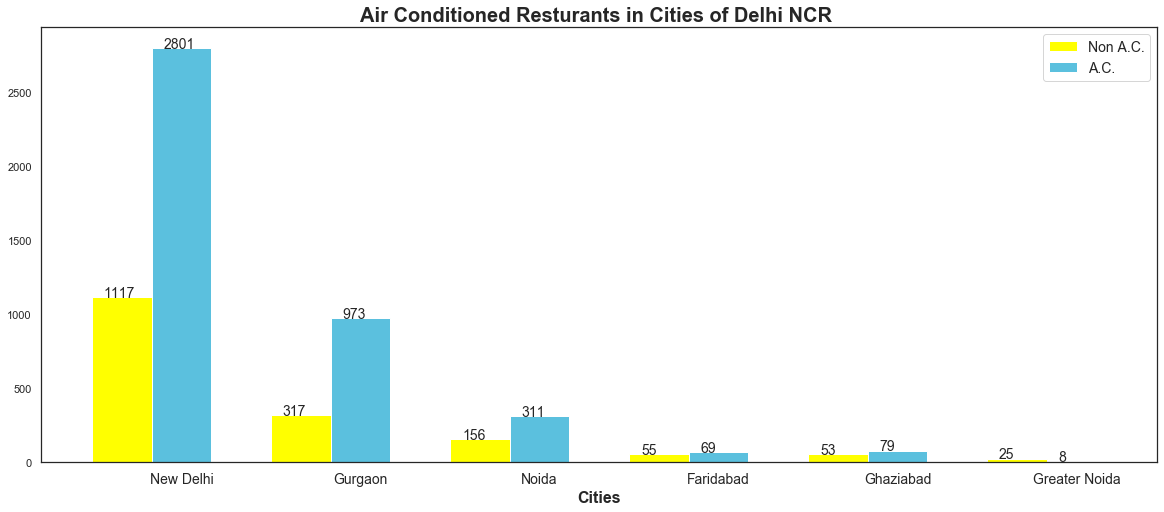

In [186]:
ax = plt.subplots(figsize=(20,8))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [1117,317,156,55,53,25]
bars2 = [2801,973,311,69,79,8]
bars3 = bars1 + bars2 
  
# Set position of bar on X axis
r1 = [1,4,7,10,13,16] 
r2 = [2,5,8,11,14,17] 
r3 = r1 + r2

 
# Make the plot
plt.bar(r1, bars1, color='yellow', width=barWidth, edgecolor='white', label='Non A.C.')
plt.bar(r2, bars2, color='#5bc0de', width=barWidth, edgecolor='white', label='A.C.')

# Add xticks on the middle of the group bars
plt.xlabel('Cities', fontweight='bold',fontsize=(16))
plt.xticks([r + barWidth for r in range(len(r3)+5)], [' ','New Delhi',' ',' ','Gurgaon',' ',' ','Noida',' ',' ','Faridabad',' ',' ','Ghaziabad',' ',' ','Greater Noida'],fontsize=(14))
plt.title('Air Conditioned Resturants in Cities of Delhi NCR ',fontweight='bold',fontsize=20)

# Create labels 
label = ['1117','317','156','55','53','25','2801','973','311','69','79','8'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.3 , y = bars3[i]+0.1, s = label[ i], size = 14)
# Create legend & Show graphic
plt.legend(fontsize = 14)
plt.show()

### Wheelchair acesible

In [187]:
df_ncr1['Wheelchair Accessible'].value_counts()

0    5956
1       8
Name: Wheelchair Accessible, dtype: int64

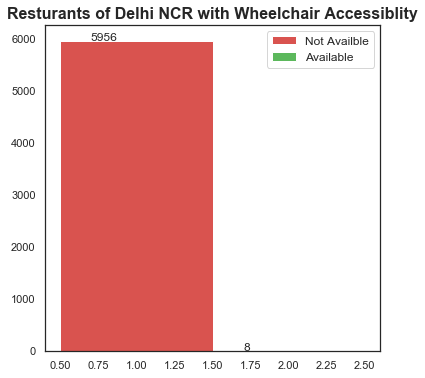

In [188]:
ax = plt.subplots(figsize=(6,6))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [5956]
bars2 = [8]
bars3 = bars1 + bars2 
 
# Set position of bar on X axis
r1 = [1]
r2 = [2]
r3 = r1 + r2
 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Availble')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Available')

# Add xticks on the middle of the group bars

plt.title('Resturants of Delhi NCR with Wheelchair Accessiblity',fontweight='bold',fontsize=16)

# Create labels 
label = ['5956','8'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.3 , y = bars3[i]+0.1, s = label[ i], size = 12)
# Create legend & Show graphic

plt.legend(fontsize = 12)
plt.show()

In [189]:
df_dli['Wheelchair Accessible'].value_counts()

0    3913
1       5
Name: Wheelchair Accessible, dtype: int64

In [190]:
df_gur['Wheelchair Accessible'].value_counts()

0    1287
1       3
Name: Wheelchair Accessible, dtype: int64

In [191]:
df_noi['Wheelchair Accessible'].value_counts()

0    467
Name: Wheelchair Accessible, dtype: int64

In [192]:
df_far['Wheelchair Accessible'].value_counts()

0    124
Name: Wheelchair Accessible, dtype: int64

In [193]:
df_gh['Wheelchair Accessible'].value_counts()

0    132
Name: Wheelchair Accessible, dtype: int64

In [194]:
df_grn['Wheelchair Accessible'].value_counts()

0    33
Name: Wheelchair Accessible, dtype: int64

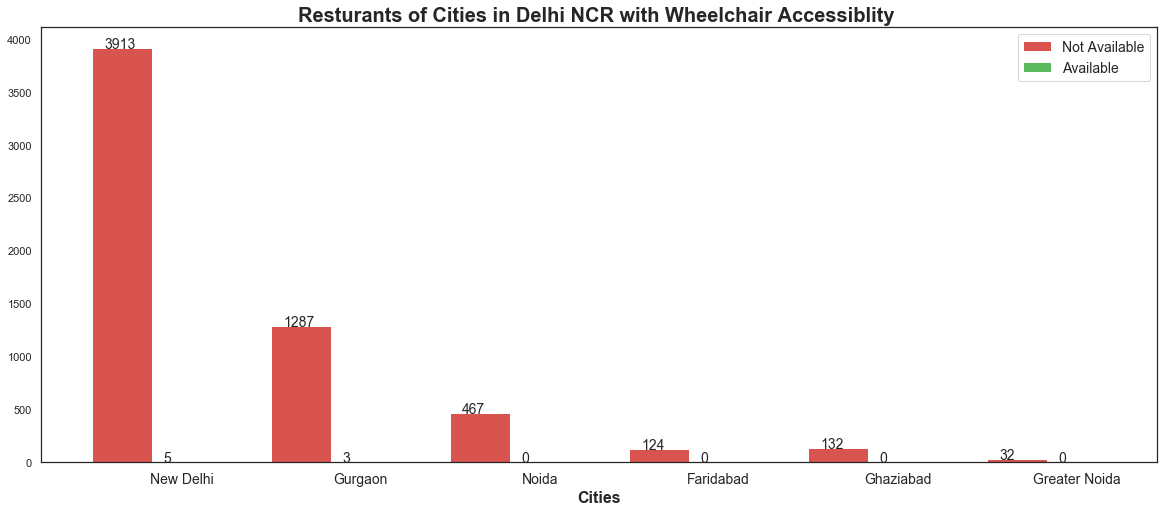

In [195]:
ax = plt.subplots(figsize=(20,8))
# set width of bar
barWidth = 1

# set height of bar
bars1 = [3913,1287,467,124,132,33]
bars2 = [5,3,0,0,0,0]
bars3 = bars1 + bars2 
  
# Set position of bar on X axis
r1 = [1,4,7,10,13,16] 
r2 = [2,5,8,11,14,17] 
r3 = r1 + r2

 
# Make the plot
plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='white', label='Not Available')
plt.bar(r2, bars2, color='#5cb85c', width=barWidth, edgecolor='white', label='Available')

# Add xticks on the middle of the group bars
plt.xlabel('Cities', fontweight='bold',fontsize=(16))
plt.xticks([r + barWidth for r in range(len(r3)+5)], [' ','New Delhi',' ',' ','Gurgaon',' ',' ','Noida',' ',' ','Faridabad',' ',' ','Ghaziabad',' ',' ','Greater Noida'],fontsize=(14))
plt.title('Resturants of Cities in Delhi NCR with Wheelchair Accessiblity ',fontweight='bold',fontsize=20)

# Create labels 
label = ['3913','1287','467','124','132','32','5','3','0','0','0','0'] 
# Text on the top of each barplot 
for i in range(len(r3)): plt.text(x = r3[i]-0.3 , y = bars3[i]+0.1, s = label[ i], size = 14)
# Create legend & Show graphic
plt.legend(fontsize = 14)
plt.show()

### Model Building

In [196]:
#Removing the Duplicates
df_ncr1.duplicated().sum()
df_ncr1.drop_duplicates(inplace=True)

In [197]:
#Remove the NaN values from the dataset
df_ncr1.isnull().sum()
df_ncr1.dropna(how='any',inplace=True)
df_ncr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2602 entries, 0 to 4681
Data columns (total 37 columns):
Id                       2602 non-null int64
Name                     2602 non-null object
Type                     2602 non-null object
City                     2602 non-null object
Locality                 2602 non-null object
Latitude                 2602 non-null float64
Longitude                2602 non-null float64
Cuisines                 2602 non-null object
Timings                  2602 non-null object
Cost for 2(avg)          2602 non-null int64
Price Range              2602 non-null int64
Features                 2602 non-null object
Ratings(avg)             2602 non-null float64
Rating Text              2602 non-null object
Votes                    2602 non-null int64
Photos                   2602 non-null int64
NCR Id                   2602 non-null int64
Pure Veg                 2602 non-null int64
Table Booking            2602 non-null int64
Parking Available       

In [198]:
print(df_ncr1.shape)

(2602, 37)


In [199]:
#Encode the input Variables
def Encode(df_ncr1):
    for column in df_ncr1.columns[~df_ncr1.columns.isin(['Ratings(avg)','Cost for 2(avg)', 'Votes'])]:
        df_ncr1[column] = df_ncr1[column].factorize()[0]
    return df_ncr1

df_ncr2 = Encode(df_ncr1.copy())

Index(['Id', 'Name', 'Type', 'City', 'Locality', 'Latitude', 'Longitude',
       'Cuisines', 'Timings', 'Cost for 2(avg)', 'Price Range', 'Features',
       'Ratings(avg)', 'Rating Text', 'Votes', 'Photos', 'NCR Id', 'Pure Veg',
       'Table Booking', 'Parking Available', 'Delivery Available',
       'Takeaway Available', 'Breakfast', 'Lunch', 'Brunch', 'Dinner',
       'Indoor Seating', 'Outdoor Seating', 'Rooftop', 'No Seating',
       'Liquor served', 'Digital payment', 'Card payment', 'Cash payment',
       'A.C.', 'Free Wifi', 'Wheelchair Accessible'],
      dtype='object')

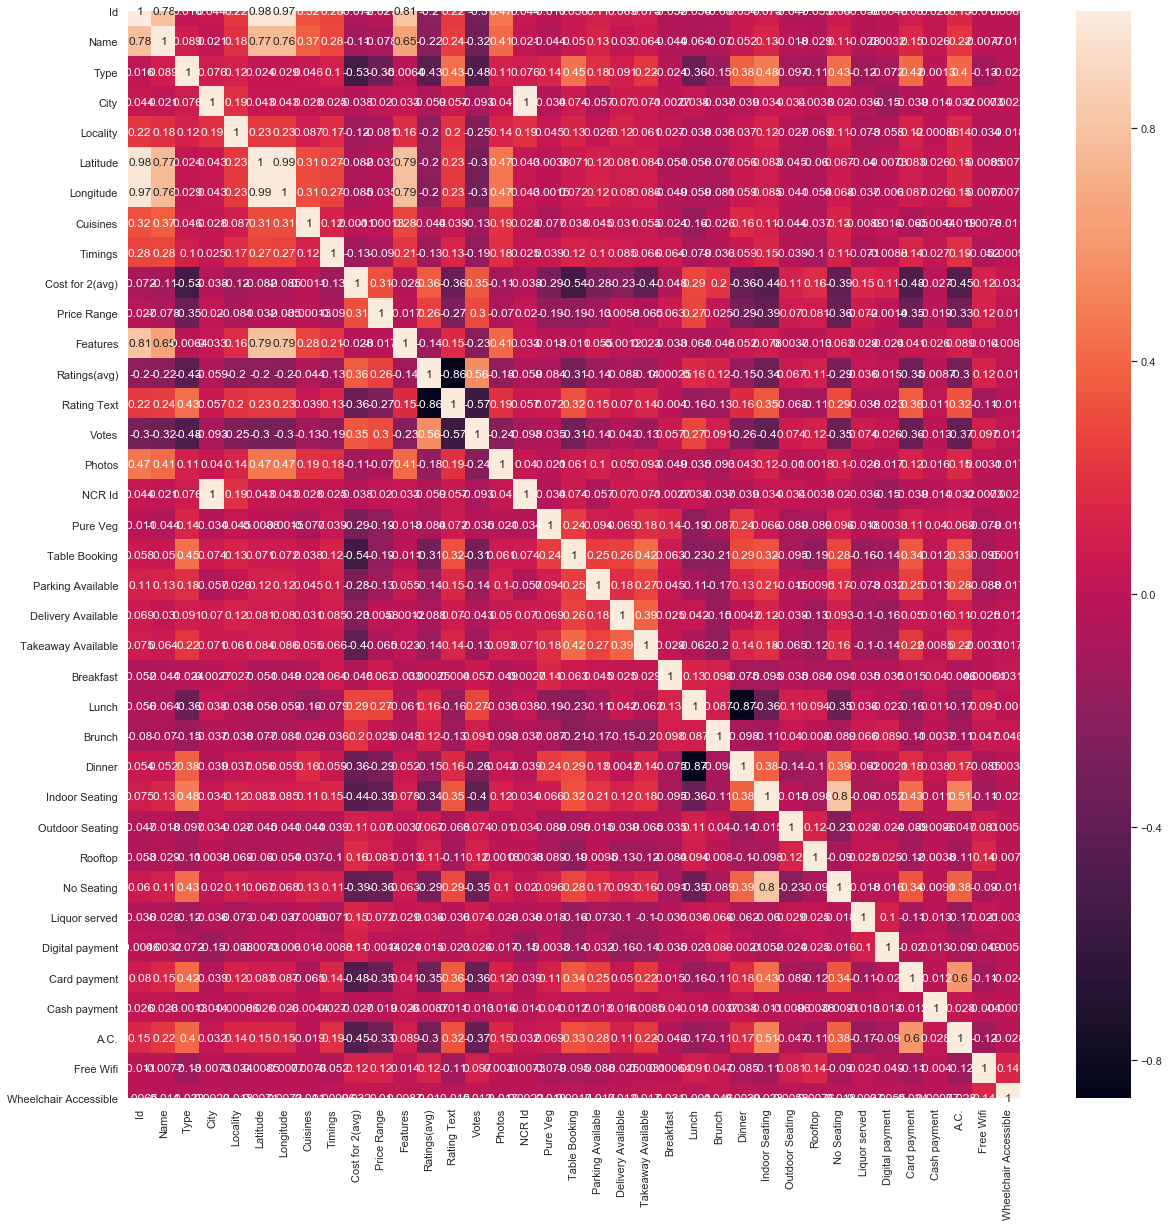

In [200]:
#Get Correlation between different variables
corr = df_ncr2.corr(method='kendall')
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
df_ncr2.columns

In [201]:
from sklearn.linear_model import LogisticRegression #Logistic Regression is a Machine Learning classification algorithm
from sklearn.linear_model import LinearRegression #Linear Regression is a Machine Learning classification algorithm
from sklearn.model_selection import train_test_split #Splitting of Dataset
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [202]:
#Defining the independent variables and dependent variables
x = df_ncr2.iloc[:,[2,4,5,6,7,9,10,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,26]]
y = df_ncr2['Ratings(avg)']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

451     4.1
194     4.2
3613    3.9
761     4.0
2723    4.2
Name: Ratings(avg), dtype: float64

In [203]:
#Prepare a Linear REgression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
print("Linear Regression R-square score: %.2f" % r2_score(y_test,y_pred)) 

Linear Regression R-square score: 0.83


In [204]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
print("Decision Tree R-square score: %.2f" % r2_score(y_test,y_predict)) 

Decision Tree R-square score: 0.97


## Average Cost for 2 people

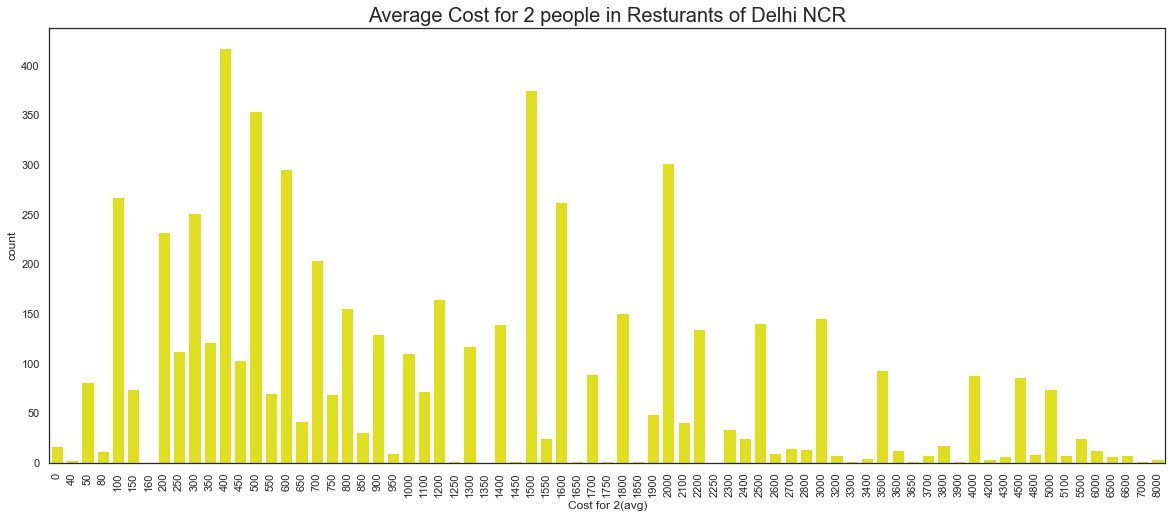

In [205]:
f, ax = plt.subplots(1,1, figsize = (20, 8))
sns.countplot(df_ncr['Cost for 2(avg)'], ax = ax, color = 'yellow')
ax.tick_params('x', rotation = 90)
ax.set_title('Average Cost for 2 people in Resturants of Delhi NCR',fontsize=20)
plt.show()

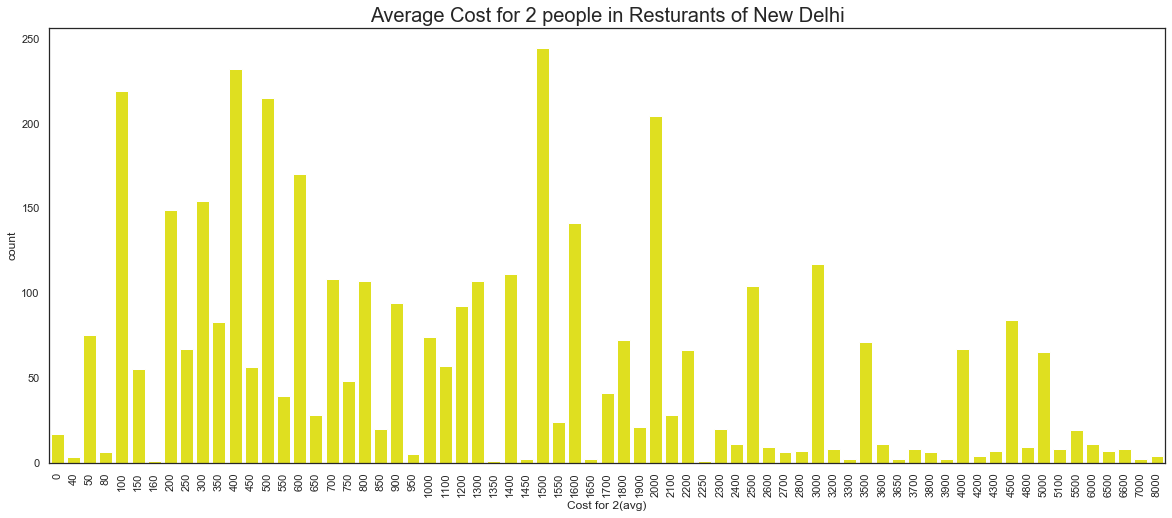

In [206]:
f, ax = plt.subplots(1,1, figsize = (20, 8))
sns.countplot(df_dli['Cost for 2(avg)'], ax = ax, color = 'yellow')
ax.tick_params('x', rotation = 90)
ax.set_title('Average Cost for 2 people in Resturants of New Delhi',fontsize=20)
plt.show()

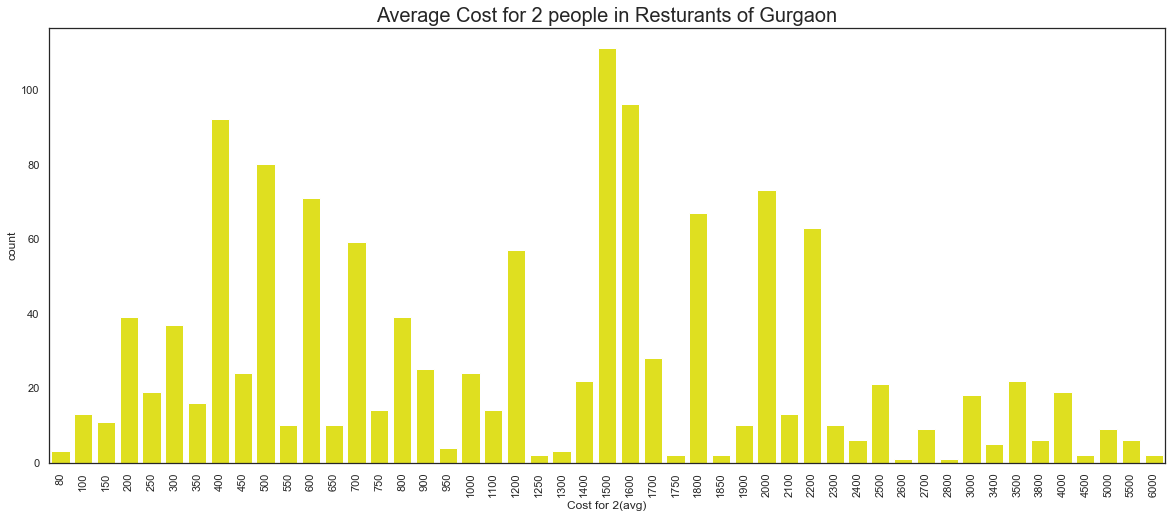

In [207]:
f, ax = plt.subplots(1,1, figsize = (20, 8))
sns.countplot(df_gur['Cost for 2(avg)'], ax = ax, color = 'yellow')
ax.tick_params('x', rotation = 90)
ax.set_title('Average Cost for 2 people in Resturants of Gurgaon',fontsize=20)
plt.show()

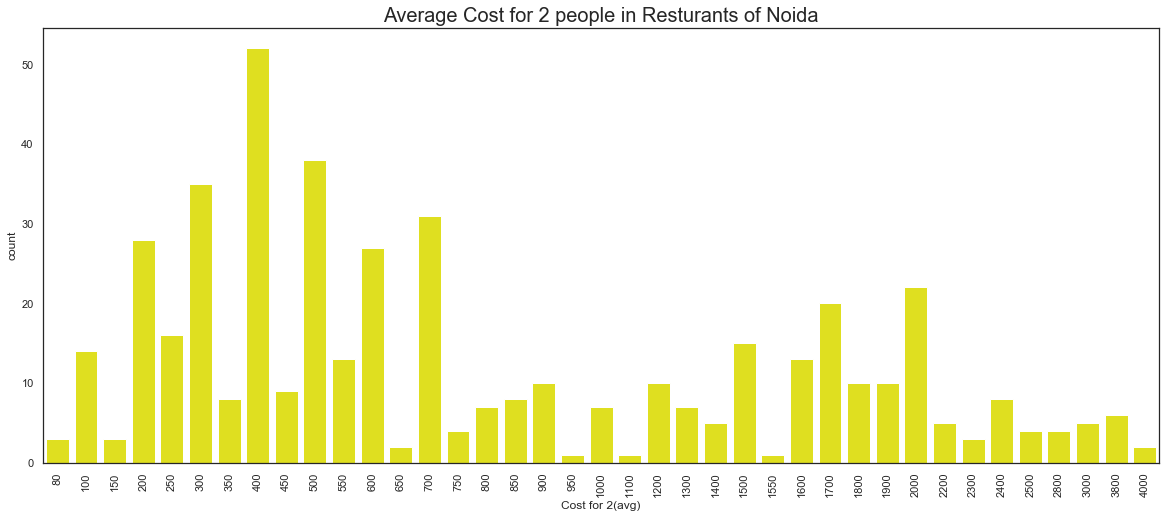

In [208]:
f, ax = plt.subplots(1,1, figsize = (20, 8))
sns.countplot(df_noi['Cost for 2(avg)'], ax = ax, color = 'yellow')
ax.tick_params('x', rotation = 90)
ax.set_title('Average Cost for 2 people in Resturants of Noida',fontsize=20)
plt.show()

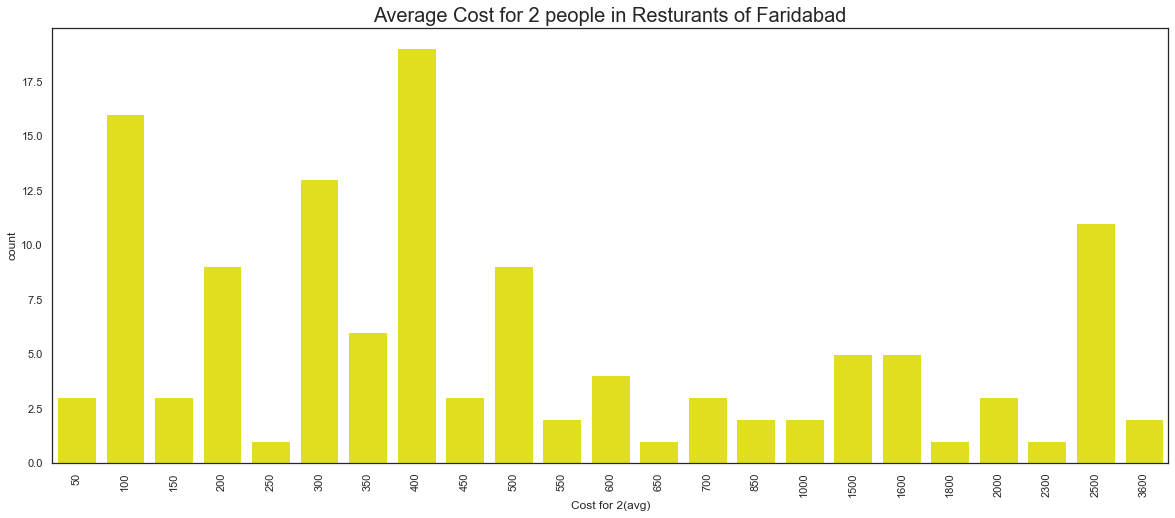

In [209]:
f, ax = plt.subplots(1,1, figsize = (20, 8))
sns.countplot(df_far['Cost for 2(avg)'], ax = ax, color = 'yellow')
ax.tick_params('x', rotation = 90)
ax.set_title('Average Cost for 2 people in Resturants of Faridabad',fontsize=20)
plt.show()

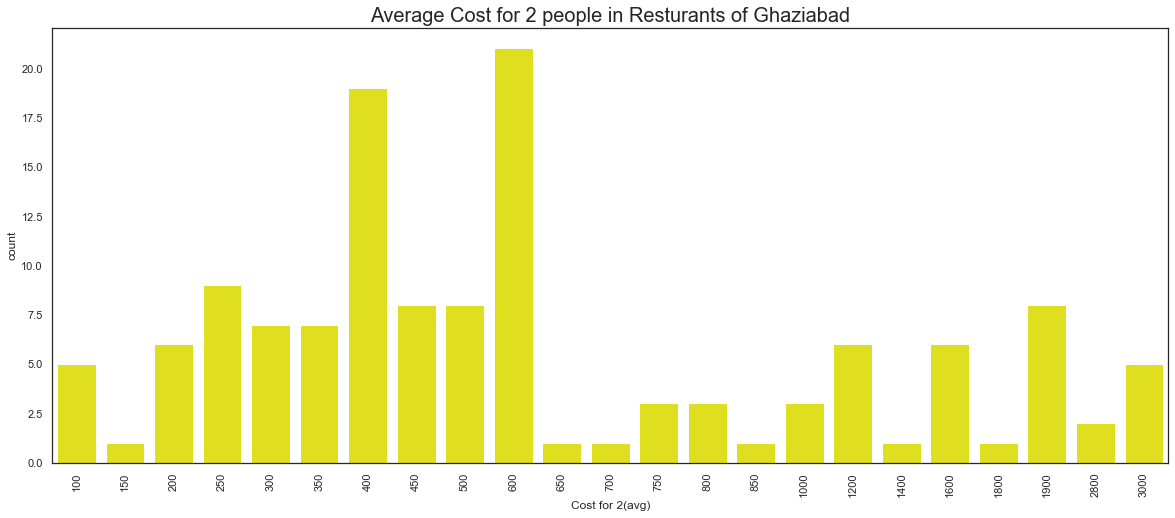

In [210]:
f, ax = plt.subplots(1,1, figsize = (20, 8))
sns.countplot(df_gh['Cost for 2(avg)'], ax = ax, color = 'yellow')
ax.tick_params('x', rotation = 90)
ax.set_title('Average Cost for 2 people in Resturants of Ghaziabad',fontsize=20)
plt.show()

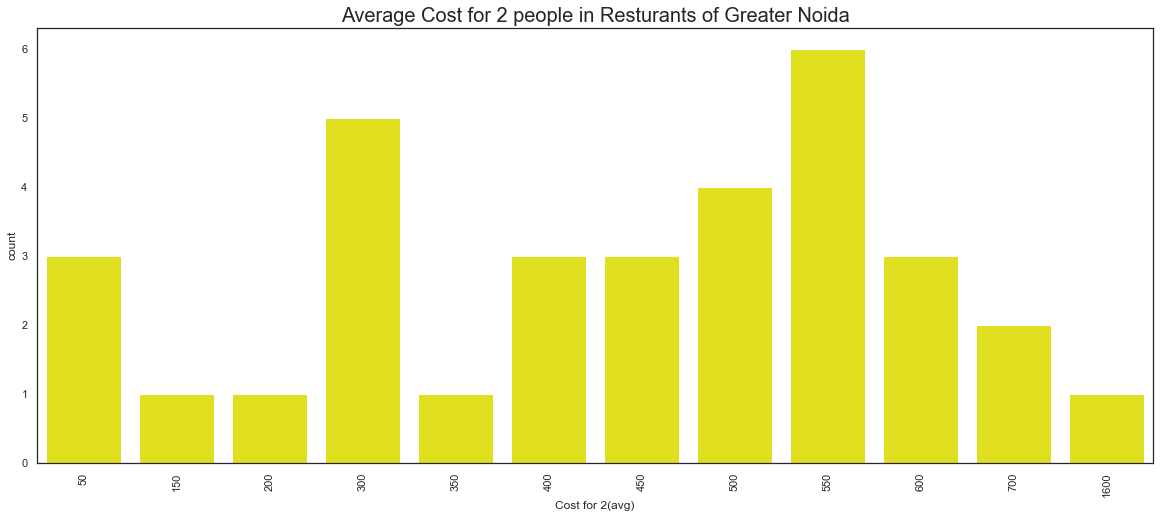

In [211]:
f, ax = plt.subplots(1,1, figsize = (20, 8))
sns.countplot(df_grn['Cost for 2(avg)'], ax = ax, color = 'yellow')
ax.tick_params('x', rotation = 90)
ax.set_title('Average Cost for 2 people in Resturants of Greater Noida',fontsize=20)
plt.show()

### Meals

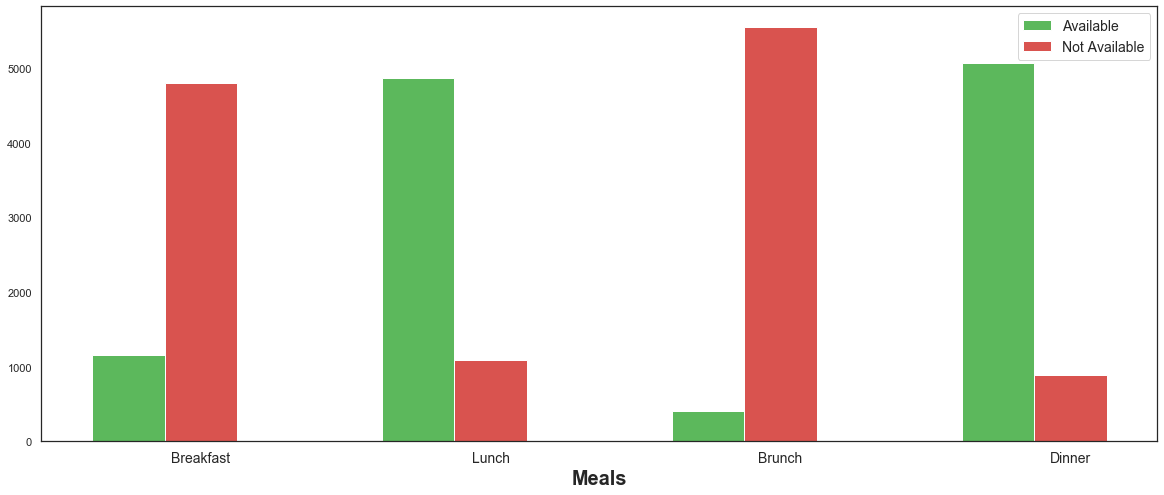

In [212]:
ax = plt.subplots(figsize=(20,8))
# set width of bar
barWidth = 0.25

# set height of bar
bars1 = [1158,4873,408,5079]
bars2 = [4806,1091,5556,885]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#5cb85c', width=barWidth, edgecolor='white', label='Available')
plt.bar(r2, bars2, color='#d9534f', width=barWidth, edgecolor='white', label='Not Available')


# Add xticks on the middle of the group bars
plt.xlabel('Meals', fontweight='bold',fontsize=(20))
plt.xticks([r + barWidth for r in range(len(bars1))], ['Breakfast','Lunch','Brunch','Dinner'],fontsize=(14))

# Create legend & Show graphic

plt.legend(fontsize = 14)
plt.show()


### Seating

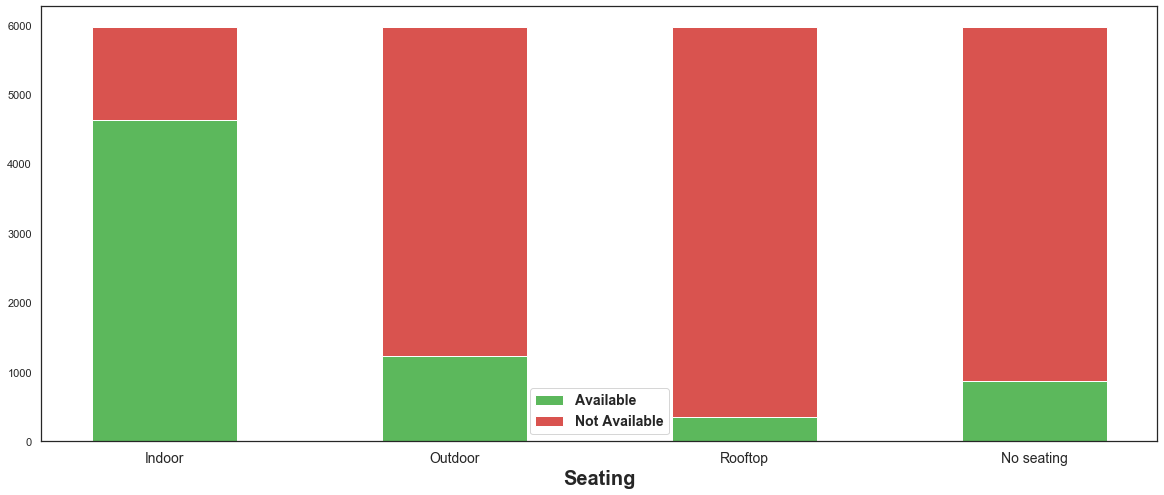

In [213]:
# libraries

from matplotlib import rc

ax = plt.subplots(figsize=(20,8)) 
# y-axis in bold
rc('font', weight='bold')


# Values of each group
bars1 = [4625,1226,355,870]
bars2 = [1339,4738,5609,5097]

 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3]
 
# Names of group and bar width
names = ['Indoor','Outdoor','Rooftop','No seating']
barWidth = 0.5
 
# Create green bars
plt.bar(r, bars1, color= '#5cb85c', edgecolor='white', width=barWidth,label='Available')
# Create red bars (top), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#d9534f', edgecolor='white', width=barWidth,label='Not Available')
 
# Custom X axis
plt.xticks(r, names,fontsize=(14))
plt.xlabel("Seating",fontweight='bold',fontsize=(20))
 
# Show graphic
plt.legend(fontsize = 14)
plt.show()


### Payment Modes

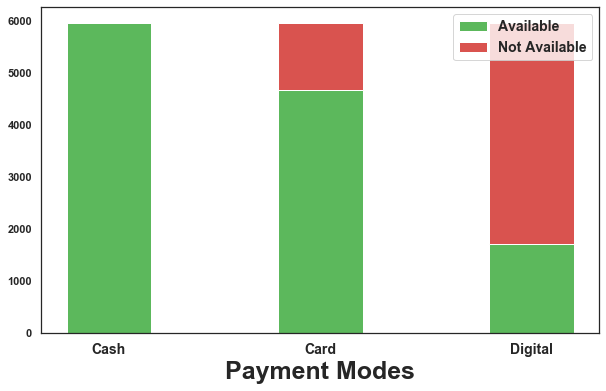

In [214]:
from matplotlib import rc

ax = plt.subplots(figsize=(10,6)) 
# y-axis in bold
rc('font', weight='bold')


# Values of each group
bars1 = [5959,4670,1719]
bars2 = [5,1294,4245]

 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2]
 
# Names of group and bar width
names = ['Cash','Card','Digital']
barWidth = 0.4
 
# Create green bars
plt.bar(r, bars1, color= '#5cb85c', edgecolor='white', width=barWidth,label='Available')
# Create red bars (top), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#d9534f', edgecolor='white', width=barWidth,label='Not Available')
 
# Custom X axis
plt.xticks(r, names, fontsize=(14))
plt.xlabel("Payment Modes",fontweight='bold',fontsize=(25))
 
# Show graphic
plt.legend(fontsize = 14)
plt.show()


### Ratings ###

Text(0.5, 1.0, 'Resturant Ratings in Delhi NCR')

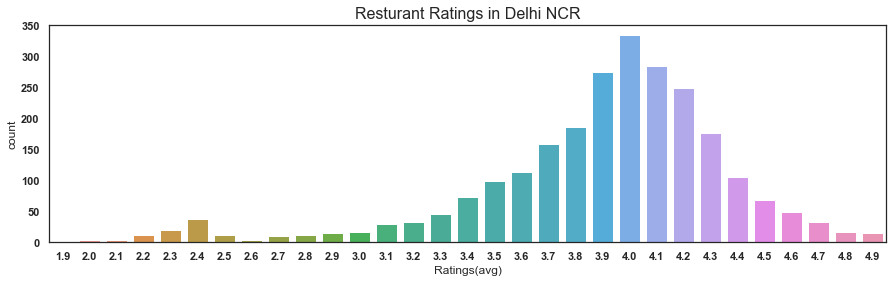

In [216]:
f, ax = plt.subplots(1,1, figsize = (15, 4))
ax = sns.countplot(df_ncr1[df_ncr1['Ratings(avg)'] != 0]['Ratings(avg)'])
plt.title('Resturant Ratings in Delhi NCR',fontsize=16)

Text(0.5, 1.0, 'Resturant Ratings in New Delhi')

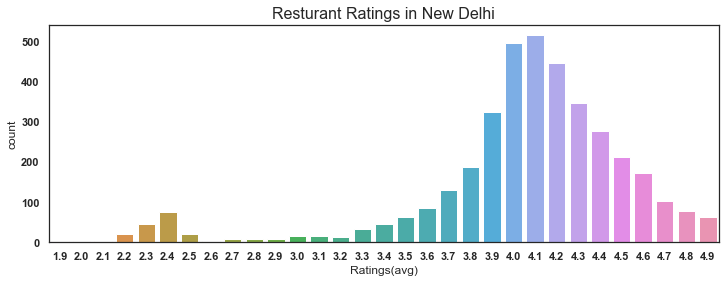

In [217]:
f, ax = plt.subplots(1,1, figsize = (12, 4))
ax = sns.countplot(df_dli[df_dli['Ratings(avg)'] != 0]['Ratings(avg)'])
plt.title('Resturant Ratings in New Delhi',fontsize=16)

Text(0.5, 1.0, 'Resturant Ratings in Gurgaon')

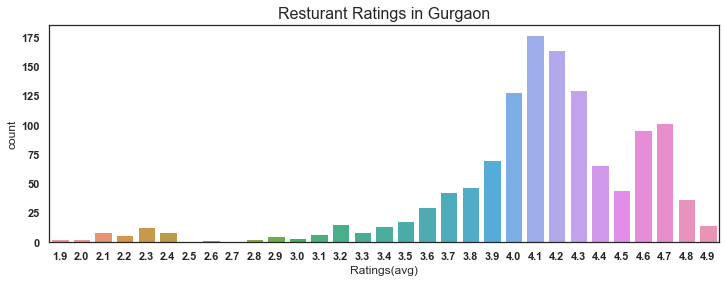

In [218]:
f, ax = plt.subplots(1,1, figsize = (12, 4))
ax = sns.countplot(df_gur[df_gur['Ratings(avg)'] != 0]['Ratings(avg)'])
plt.title('Resturant Ratings in Gurgaon',fontsize=16)

Text(0.5, 1.0, 'Resturant Ratings in Noida')

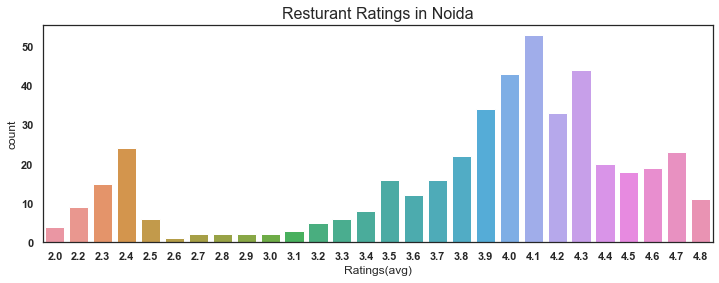

In [219]:
f, ax = plt.subplots(1,1, figsize = (12, 4))
ax = sns.countplot(df_noi[df_noi['Ratings(avg)'] != 0]['Ratings(avg)'])
plt.title('Resturant Ratings in Noida',fontsize=16)

Text(0.5, 1.0, 'Resturant Ratings in Faridabad')

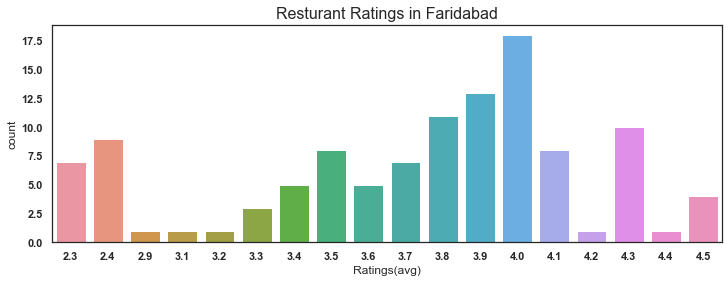

In [220]:
f, ax = plt.subplots(1,1, figsize = (12, 4))
ax = sns.countplot(df_far[df_far['Ratings(avg)'] != 0]['Ratings(avg)'])
plt.title('Resturant Ratings in Faridabad',fontsize=16)

Text(0.5, 1.0, 'Resturant Ratings in Ghaziabad')

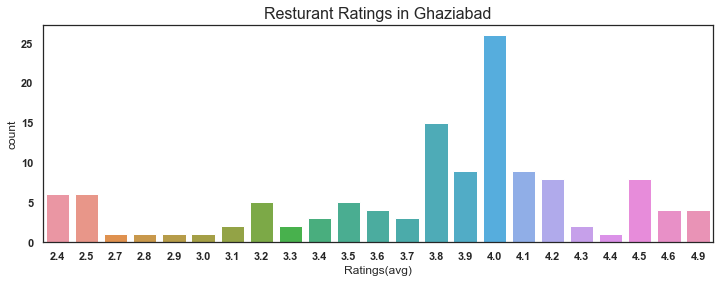

In [221]:
f, ax = plt.subplots(1,1, figsize = (12, 4))
ax = sns.countplot(df_gh[df_gh['Ratings(avg)'] != 0]['Ratings(avg)'])
plt.title('Resturant Ratings in Ghaziabad',fontsize=16)

Text(0.5, 1.0, 'Resturant Ratings in Greater Noida')

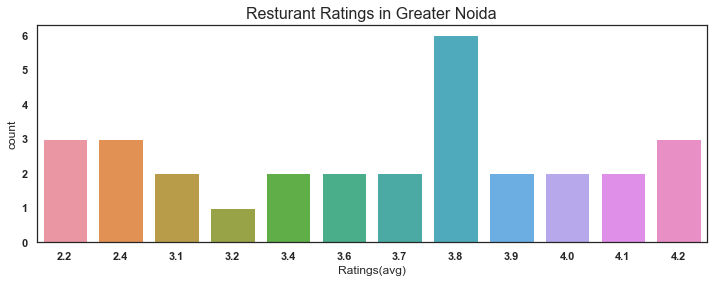

In [222]:
f, ax = plt.subplots(1,1, figsize = (12, 4))
ax = sns.countplot(df_grn[df_grn['Ratings(avg)'] != 0]['Ratings(avg)'])
plt.title('Resturant Ratings in Greater Noida',fontsize=16)

### Cuisines

Text(0.5, 1.0, 'Cuisines in Resturants of Delhi NCR')

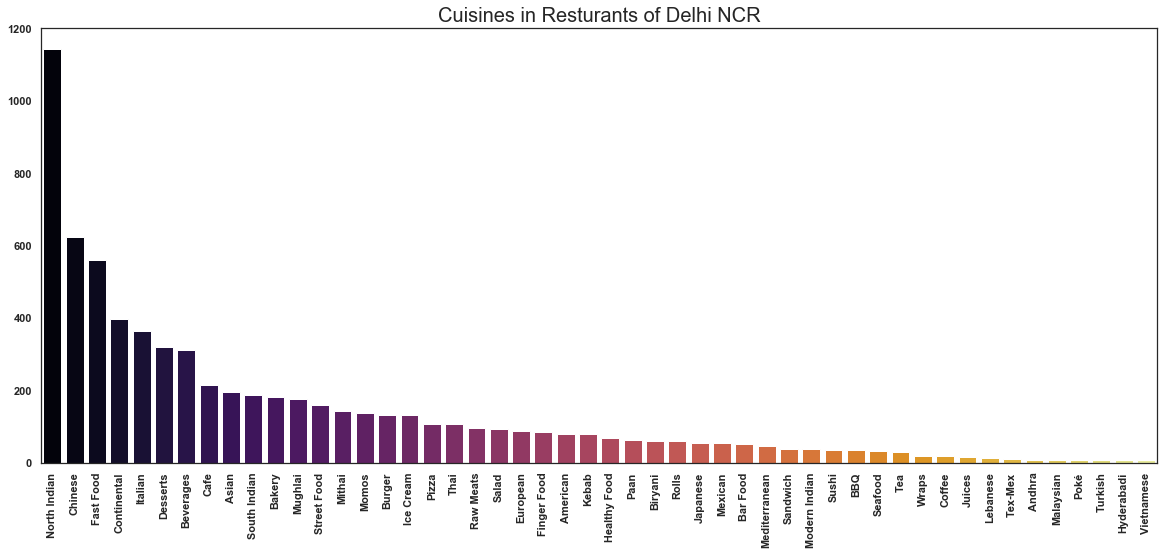

In [223]:
total_cuisines = df_ncr1.Cuisines.value_counts()

cuisines = {}

cnt = 0
for i in total_cuisines.index:
    for j in i.split(', '):
        if j not in cuisines.keys():
            cuisines[j] = total_cuisines[cnt]
        else:
            cuisines[j] += total_cuisines[cnt]
    cnt += 1

sorted_cuisines = pd.Series(cuisines).sort_values(ascending=False)
sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (20, 8))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_cuisines[:50].index, sorted_cuisines[:50].values, palette="inferno")
plt.title('Cuisines in Resturants of Delhi NCR', fontsize=20)

Text(0.5, 1.0, 'Cuisines in Resturants of New Delhi')

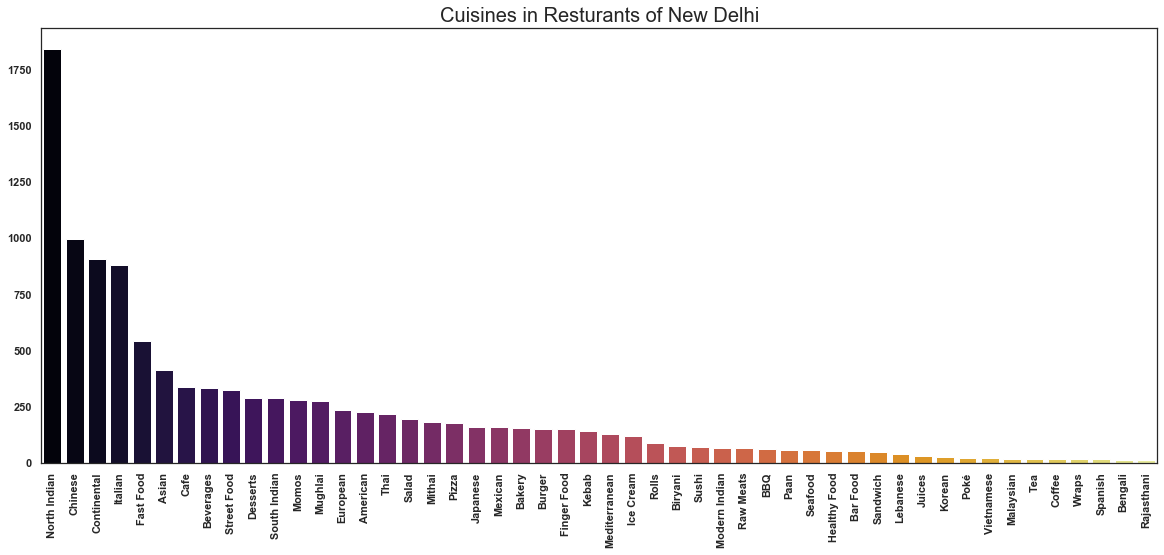

In [224]:
total_cuisines = df_dli.Cuisines.value_counts()
cuisines = {}
cnt = 0
for i in total_cuisines.index:
    for j in i.split(', '):
        if j not in cuisines.keys():
            cuisines[j] = total_cuisines[cnt]
        else:
            cuisines[j] += total_cuisines[cnt]
    cnt += 1
    
sorted_cuisines = pd.Series(cuisines).sort_values(ascending=False)

sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (20, 8))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_cuisines[:50].index, sorted_cuisines[:50].values, palette="inferno")
plt.title('Cuisines in Resturants of New Delhi', fontsize=20)

Text(0.5, 1.0, 'Cuisines in Resturants of Gurgaon')

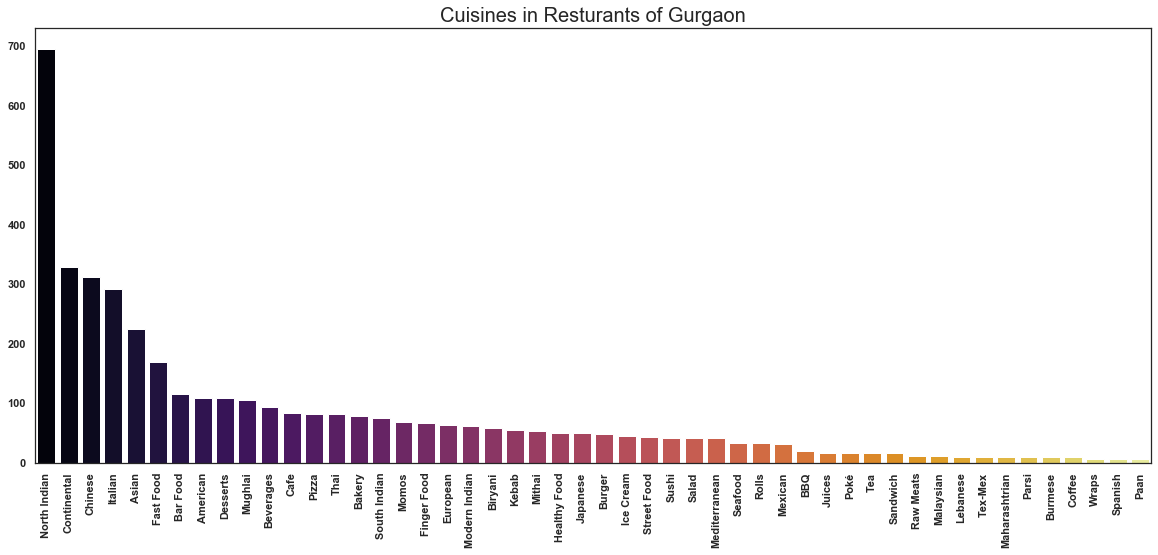

In [225]:
total_cuisines = df_gur.Cuisines.value_counts()
cuisines = {}
cnt = 0
for i in total_cuisines.index:
    for j in i.split(', '):
        if j not in cuisines.keys():
            cuisines[j] = total_cuisines[cnt]
        else:
            cuisines[j] += total_cuisines[cnt]
    cnt += 1
    
sorted_cuisines = pd.Series(cuisines).sort_values(ascending=False)

sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (20, 8))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_cuisines[:50].index, sorted_cuisines[:50].values, palette="inferno")
plt.title('Cuisines in Resturants of Gurgaon', fontsize=20)

Text(0.5, 1.0, 'Cuisines in Resturants of Noida')

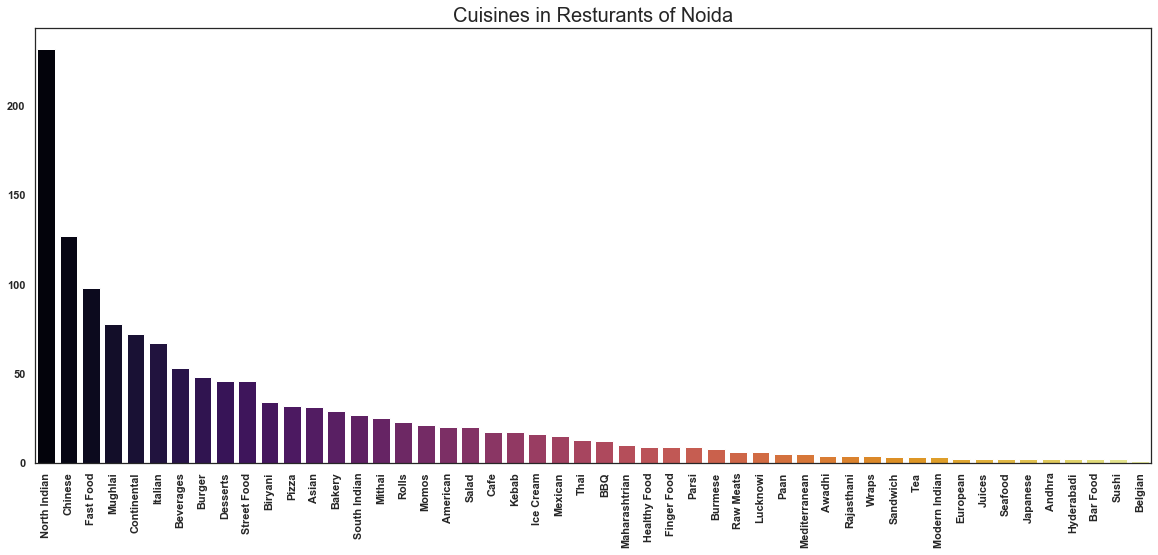

In [226]:
total_cuisines = df_noi.Cuisines.value_counts()
cuisines = {}
cnt = 0
for i in total_cuisines.index:
    for j in i.split(', '):
        if j not in cuisines.keys():
            cuisines[j] = total_cuisines[cnt]
        else:
            cuisines[j] += total_cuisines[cnt]
    cnt += 1
    
sorted_cuisines = pd.Series(cuisines).sort_values(ascending=False)

sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (20, 8))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_cuisines[:50].index, sorted_cuisines[:50].values, palette="inferno")
plt.title('Cuisines in Resturants of Noida', fontsize=20)

Text(0.5, 1.0, 'Cuisines in Resturants of Faridabad')

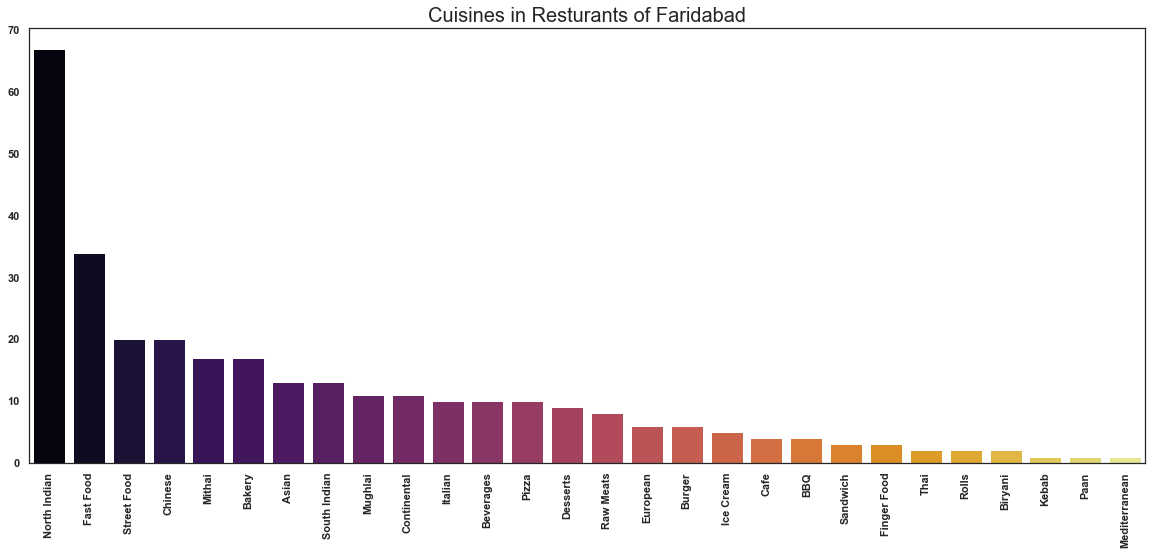

In [227]:
total_cuisines = df_far.Cuisines.value_counts()
cuisines = {}
cnt = 0
for i in total_cuisines.index:
    for j in i.split(', '):
        if j not in cuisines.keys():
            cuisines[j] = total_cuisines[cnt]
        else:
            cuisines[j] += total_cuisines[cnt]
    cnt += 1
    
sorted_cuisines = pd.Series(cuisines).sort_values(ascending=False)

sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (20, 8))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_cuisines[:50].index, sorted_cuisines[:50].values, palette="inferno")
plt.title('Cuisines in Resturants of Faridabad', fontsize=20)

Text(0.5, 1.0, 'Cuisines in Resturants of Ghaziabad')

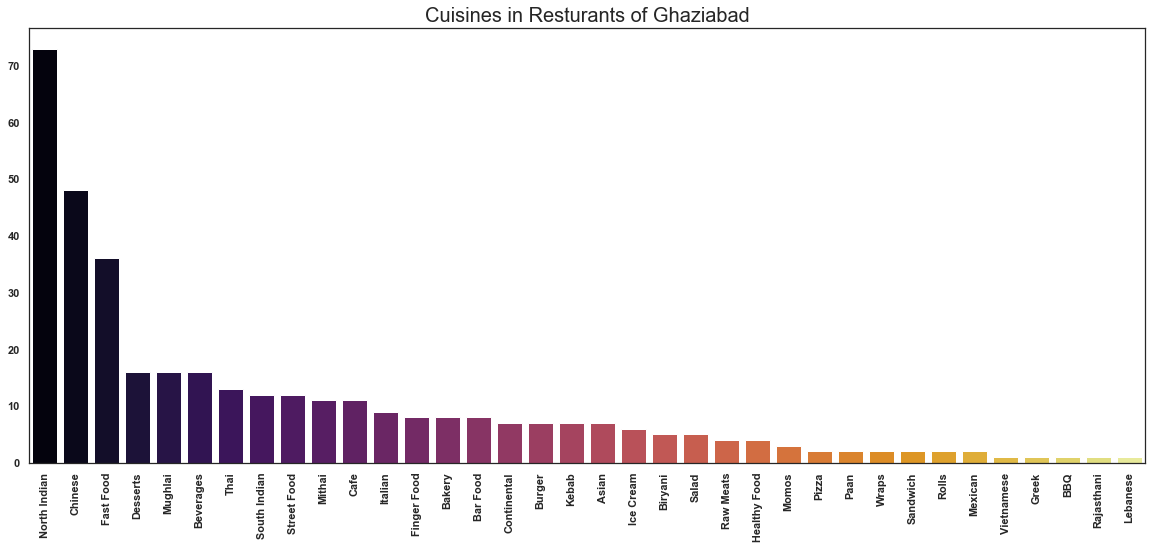

In [228]:
total_cuisines = df_gh.Cuisines.value_counts()
cuisines = {}
cnt = 0
for i in total_cuisines.index:
    for j in i.split(', '):
        if j not in cuisines.keys():
            cuisines[j] = total_cuisines[cnt]
        else:
            cuisines[j] += total_cuisines[cnt]
    cnt += 1
    
sorted_cuisines = pd.Series(cuisines).sort_values(ascending=False)

sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (20, 8))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_cuisines[:50].index, sorted_cuisines[:50].values, palette="inferno")
plt.title('Cuisines in Resturants of Ghaziabad', fontsize=20)

Text(0.5, 1.0, 'Cuisines in Resturants of Greater Noida')

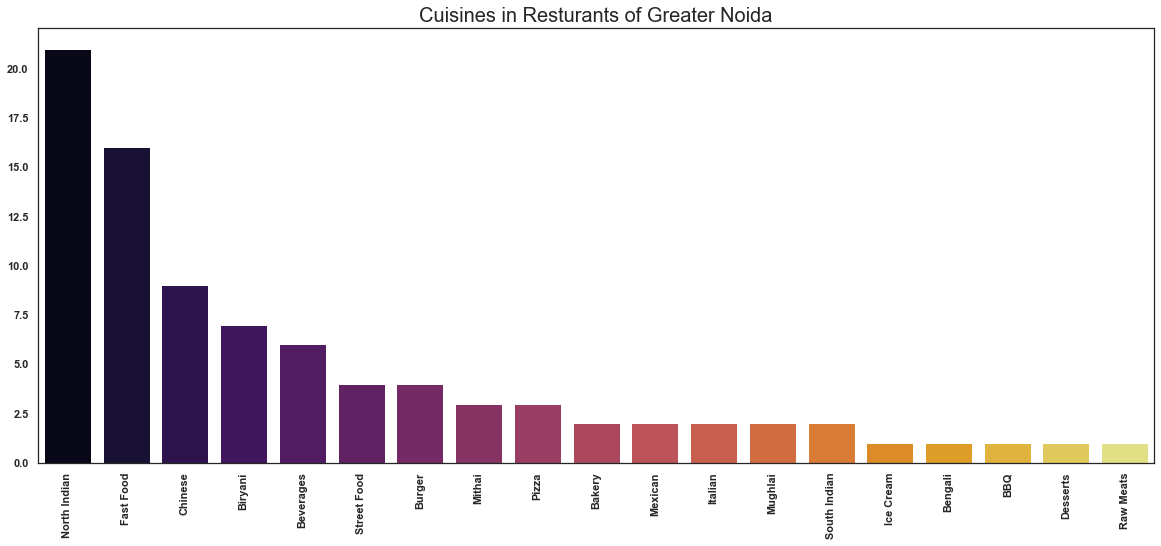

In [229]:
total_cuisines = df_grn.Cuisines.value_counts()
cuisines = {}
cnt = 0
for i in total_cuisines.index:
    for j in i.split(', '):
        if j not in cuisines.keys():
            cuisines[j] = total_cuisines[cnt]
        else:
            cuisines[j] += total_cuisines[cnt]
    cnt += 1
    
sorted_cuisines = pd.Series(cuisines).sort_values(ascending=False)

sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (20, 8))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_cuisines[:50].index, sorted_cuisines[:50].values, palette="inferno")
plt.title('Cuisines in Resturants of Greater Noida', fontsize=20)

### Features

Text(0.5, 1.0, 'Features in Resturants of Delhi NCR')

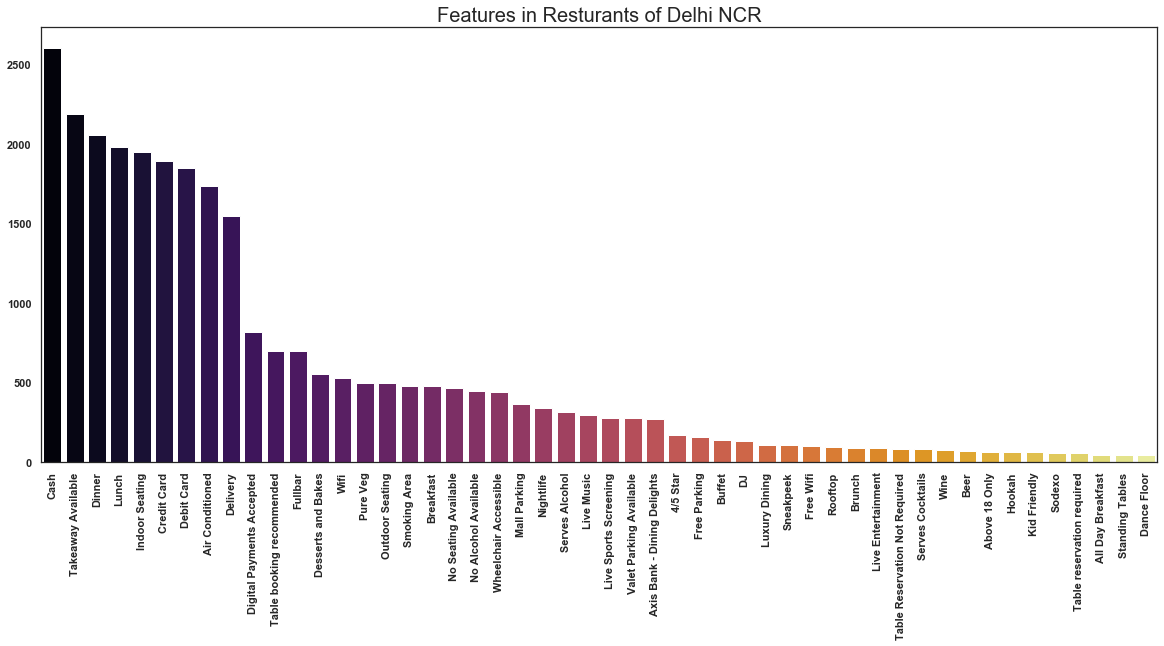

In [230]:
total_features = df_ncr1.Features.value_counts()

features = {}

cnt = 0
for i in total_features.index:
    for j in i.split(', '):
        if j not in features.keys():
            features[j] = total_features[cnt]
        else:
            features[j] += total_features[cnt]
    cnt += 1

sorted_features = pd.Series(features).sort_values(ascending=False)

sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (20,8))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_features[:50].index, sorted_features[:50].values, palette="inferno")

plt.title('Features in Resturants of Delhi NCR', fontsize=20)

Text(0.5, 1.0, 'Features in Resturants of New Delhi')

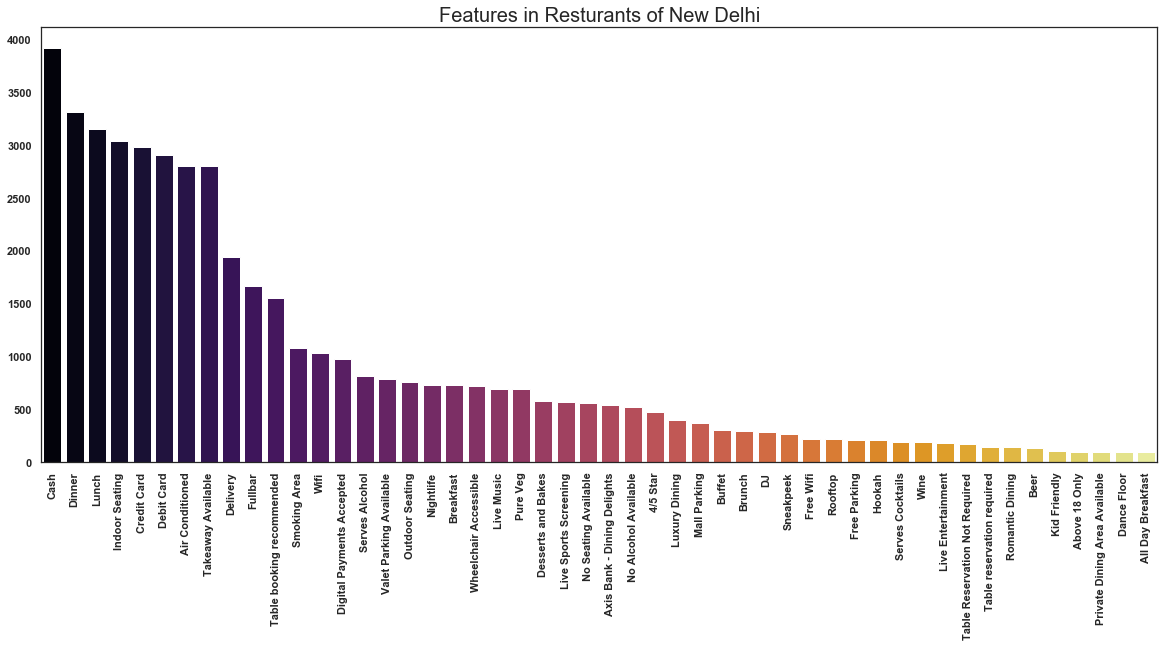

In [231]:
total_features = df_dli.Features.value_counts()

features = {}

cnt = 0
for i in total_features.index:
    for j in i.split(', '):
        if j not in features.keys():
            features[j] = total_features[cnt]
        else:
            features[j] += total_features[cnt]
    cnt += 1

sorted_features = pd.Series(features).sort_values(ascending=False)

sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (20,8))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_features[:50].index, sorted_features[:50].values, palette="inferno")

plt.title('Features in Resturants of New Delhi', fontsize=20)

Text(0.5, 1.0, 'Features in Resturants of Gurgaon')

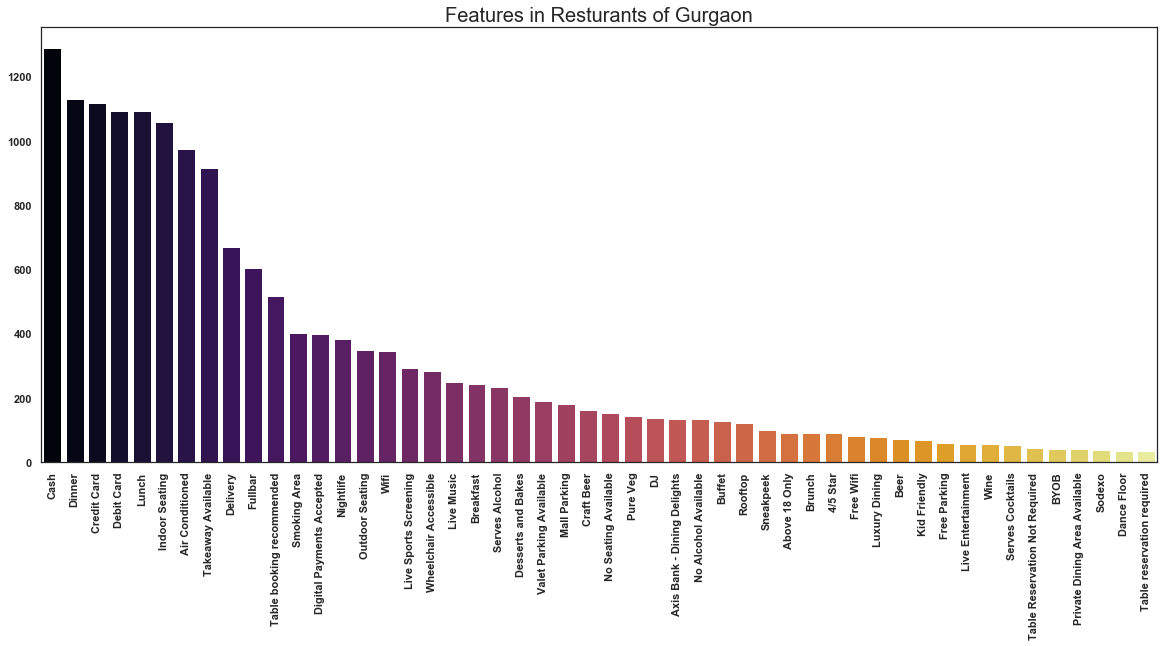

In [232]:
total_features = df_gur.Features.value_counts()

features = {}

cnt = 0
for i in total_features.index:
    for j in i.split(', '):
        if j not in features.keys():
            features[j] = total_features[cnt]
        else:
            features[j] += total_features[cnt]
    cnt += 1

sorted_features = pd.Series(features).sort_values(ascending=False)

sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (20,8))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_features[:50].index, sorted_features[:50].values, palette="inferno")

plt.title('Features in Resturants of Gurgaon', fontsize=20)

Text(0.5, 1.0, 'Features in Resturants of Noida')

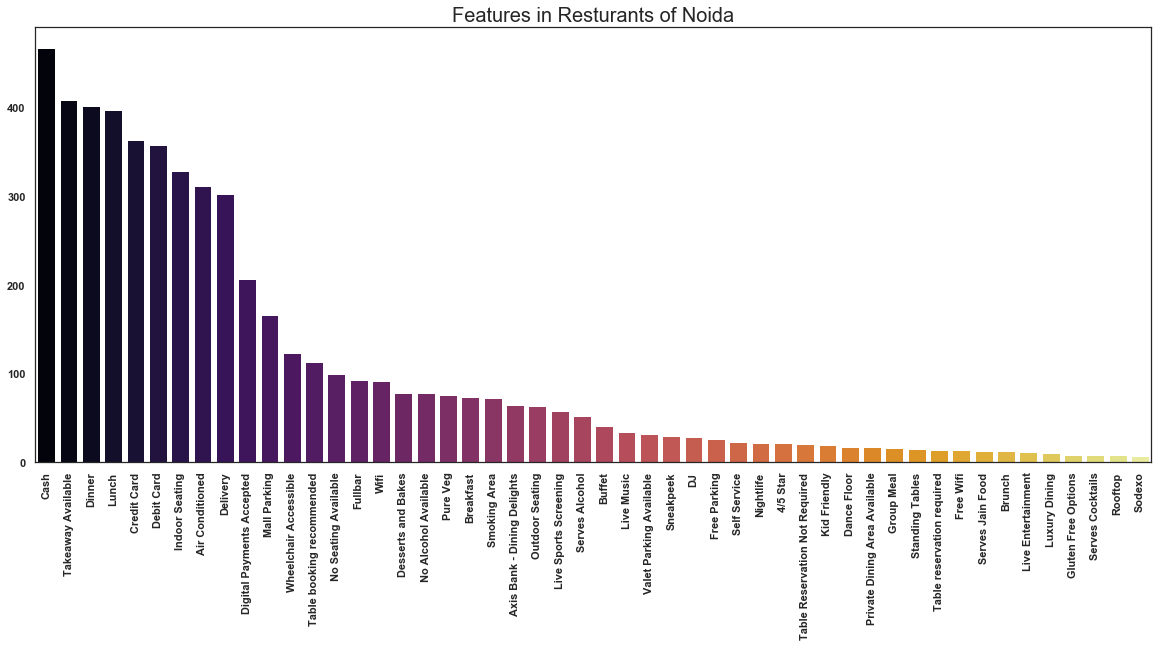

In [233]:
total_features = df_noi.Features.value_counts()

features = {}

cnt = 0
for i in total_features.index:
    for j in i.split(', '):
        if j not in features.keys():
            features[j] = total_features[cnt]
        else:
            features[j] += total_features[cnt]
    cnt += 1

sorted_features = pd.Series(features).sort_values(ascending=False)

sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (20,8))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_features[:50].index, sorted_features[:50].values, palette="inferno")

plt.title('Features in Resturants of Noida', fontsize=20)

Text(0.5, 1.0, 'Features in Resturants of Faridabad')

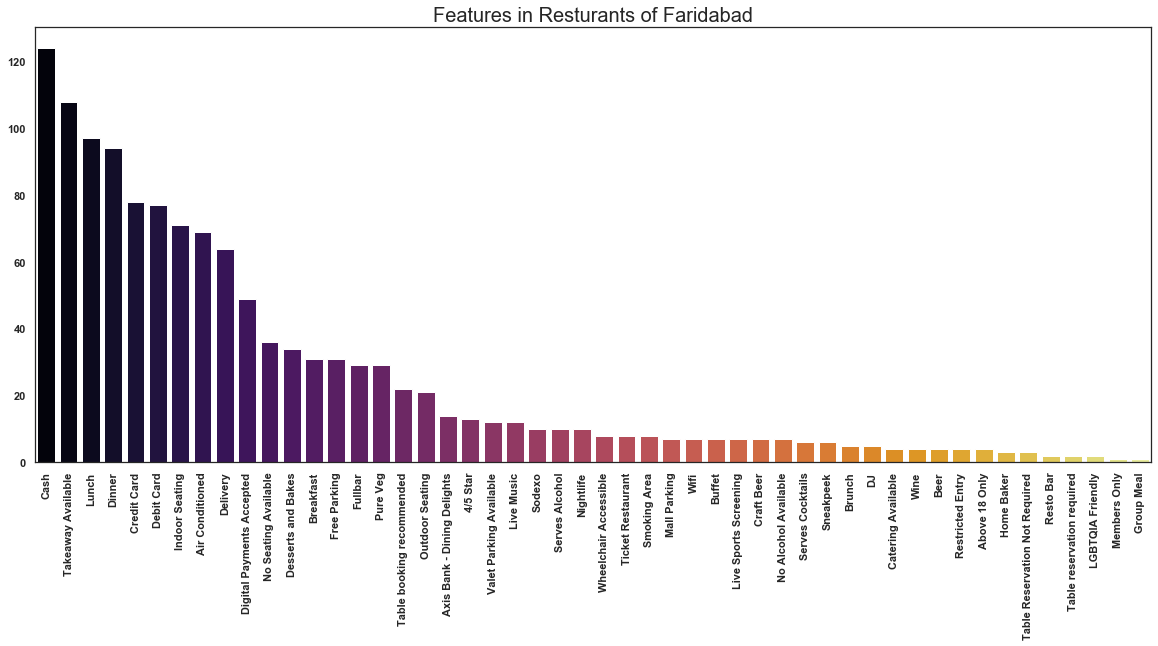

In [234]:
total_features = df_far.Features.value_counts()

features = {}

cnt = 0
for i in total_features.index:
    for j in i.split(', '):
        if j not in features.keys():
            features[j] = total_features[cnt]
        else:
            features[j] += total_features[cnt]
    cnt += 1

sorted_features = pd.Series(features).sort_values(ascending=False)

sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (20,8))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_features[:50].index, sorted_features[:50].values, palette="inferno")

plt.title('Features in Resturants of Faridabad', fontsize=20)

Text(0.5, 1.0, 'Features in Resturants of Ghaziabad')

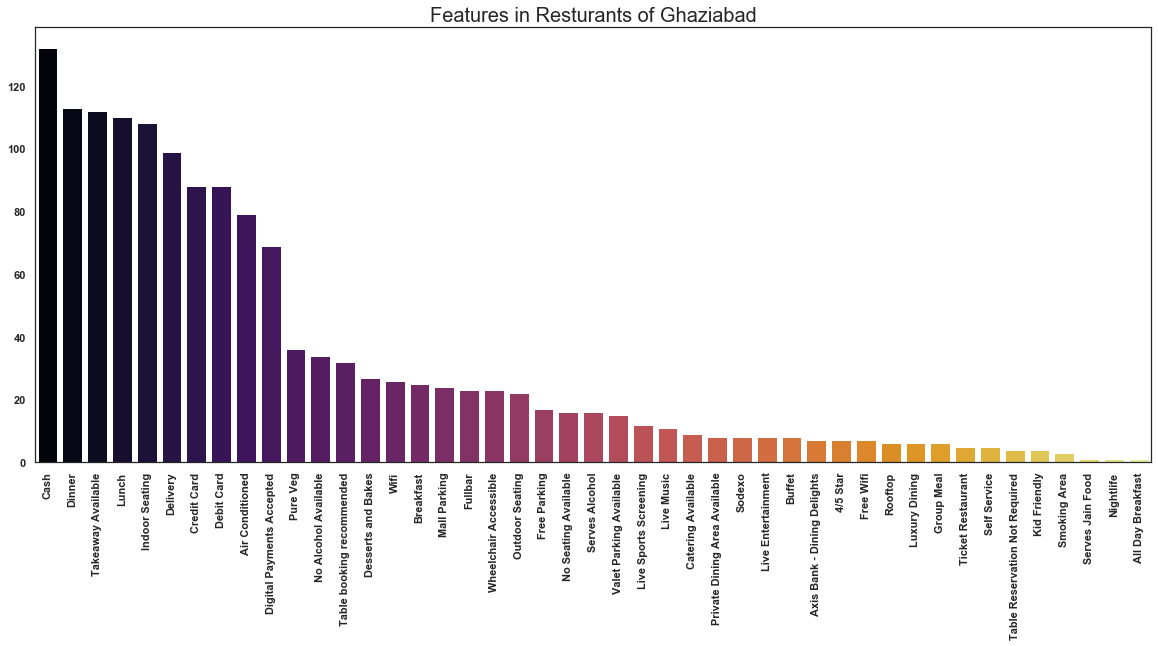

In [235]:
total_features = df_gh.Features.value_counts()

features = {}

cnt = 0
for i in total_features.index:
    for j in i.split(', '):
        if j not in features.keys():
            features[j] = total_features[cnt]
        else:
            features[j] += total_features[cnt]
    cnt += 1

sorted_features = pd.Series(features).sort_values(ascending=False)

sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (20,8))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_features[:50].index, sorted_features[:50].values, palette="inferno")

plt.title('Features in Resturants of Ghaziabad', fontsize=20)

Text(0.5, 1.0, 'Features in Resturants of Greater Noida')

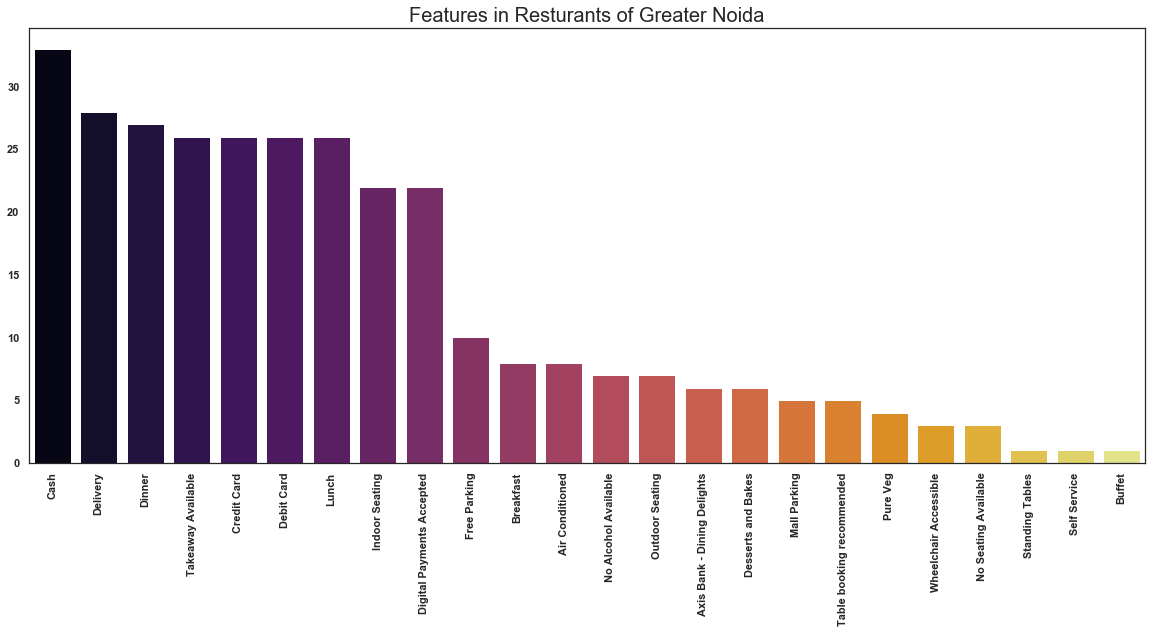

In [236]:
total_features = df_grn.Features.value_counts()

features = {}

cnt = 0
for i in total_features.index:
    for j in i.split(', '):
        if j not in features.keys():
            features[j] = total_features[cnt]
        else:
            features[j] += total_features[cnt]
    cnt += 1

sorted_features = pd.Series(features).sort_values(ascending=False)

sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (20,8))
g.tick_params('x', rotation = 90)
g = sns.barplot(sorted_features[:50].index, sorted_features[:50].values, palette="inferno")

plt.title('Features in Resturants of Greater Noida', fontsize=20)

### Type of Resturants

Text(0.5, 1.0, 'Restuarant Type in Delhi NCR')

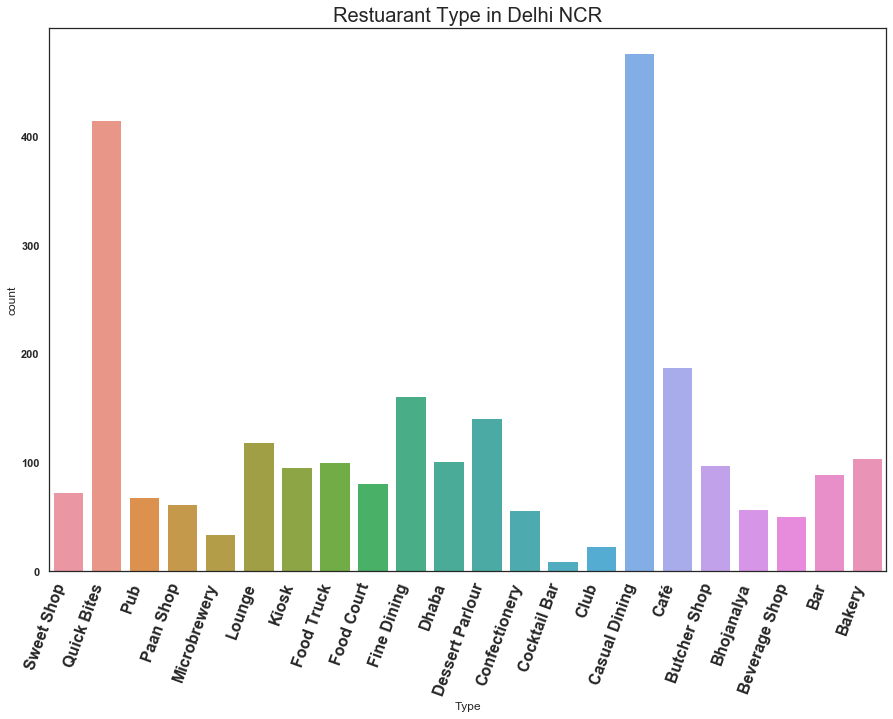

In [237]:
df_ncr1.sort_values('Type', inplace=True, ascending=False)
#Restaurant Type
sns.countplot(df_ncr1['Type'])
sns.countplot(df_ncr1['Type']).set_xticklabels(sns.countplot(df_ncr1['Type']).get_xticklabels(),fontsize=16, rotation=70, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Restuarant Type in Delhi NCR',fontsize=20)

Text(0.5, 1.0, 'Restuarant Type in New Delhi')

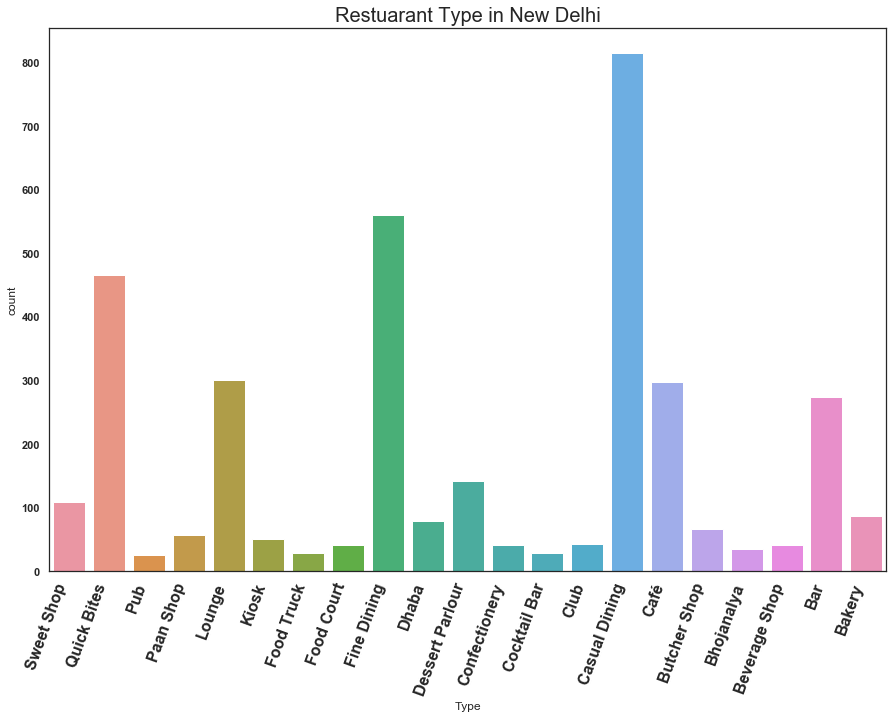

In [238]:
df_dli.sort_values('Type', inplace=True, ascending=False)
#Restaurant Type
sns.countplot(df_dli['Type'])
sns.countplot(df_dli['Type']).set_xticklabels(sns.countplot(df_dli['Type']).get_xticklabels(),fontsize=16, rotation=70, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Restuarant Type in New Delhi',fontsize=20)

Text(0.5, 1.0, 'Restuarant Type in Gurgaon')

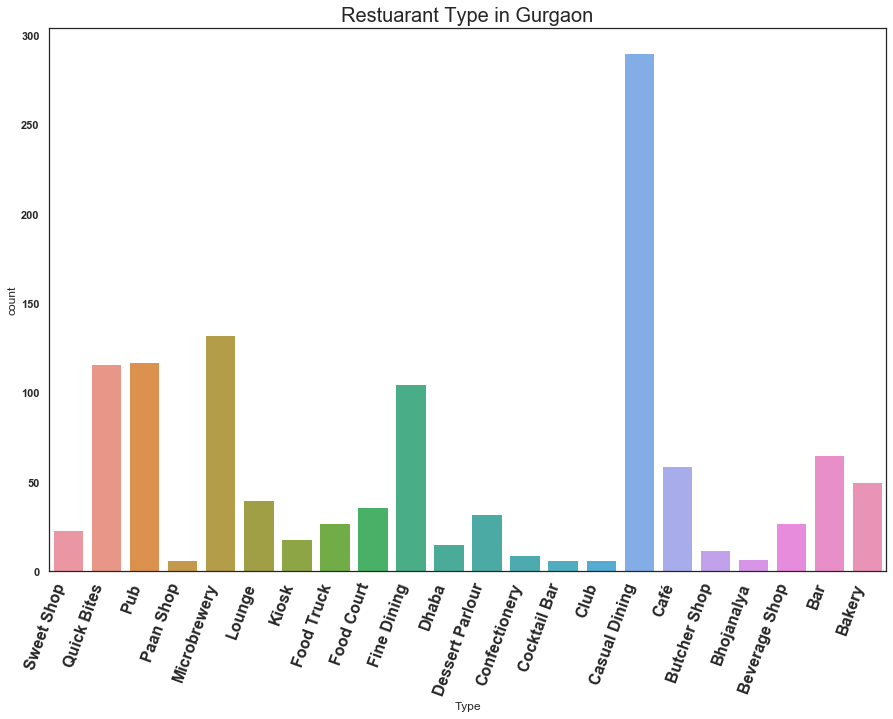

In [239]:
df_gur.sort_values('Type', inplace=True, ascending=False)
#Restaurant Type
sns.countplot(df_gur['Type'])
sns.countplot(df_gur['Type']).set_xticklabels(sns.countplot(df_gur['Type']).get_xticklabels(),fontsize=16, rotation=70, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Restuarant Type in Gurgaon',fontsize=20)

Text(0.5, 1.0, 'Restuarant Type in Noida')

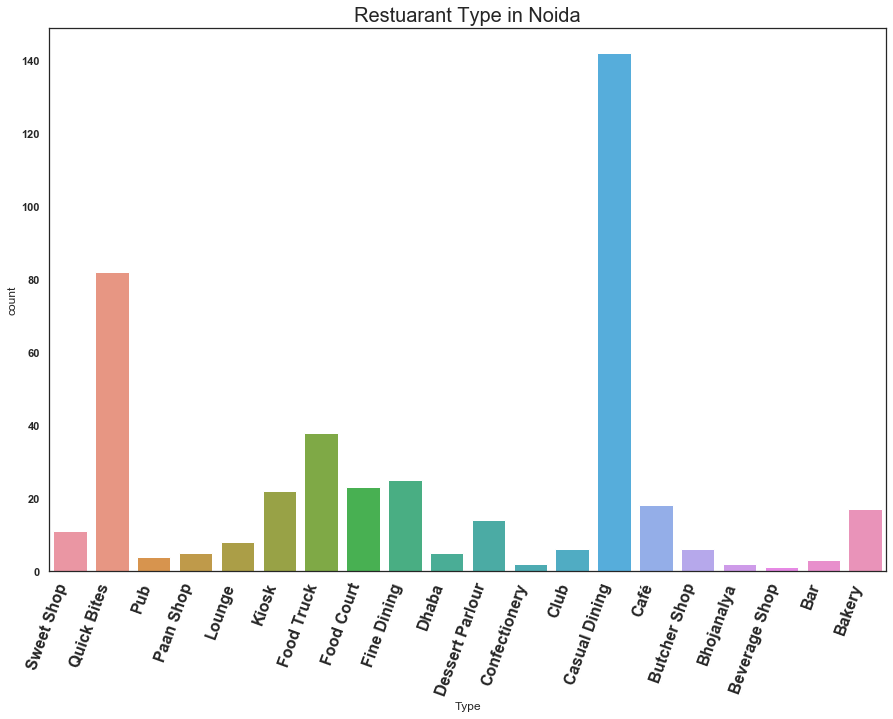

In [240]:
df_noi.sort_values('Type', inplace=True, ascending=False)
#Restaurant Type
sns.countplot(df_noi['Type'])
sns.countplot(df_noi['Type']).set_xticklabels(sns.countplot(df_noi['Type']).get_xticklabels(),fontsize=16, rotation=70, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Restuarant Type in Noida',fontsize=20)

Text(0.5, 1.0, 'Restuarant Type in Faridabad')

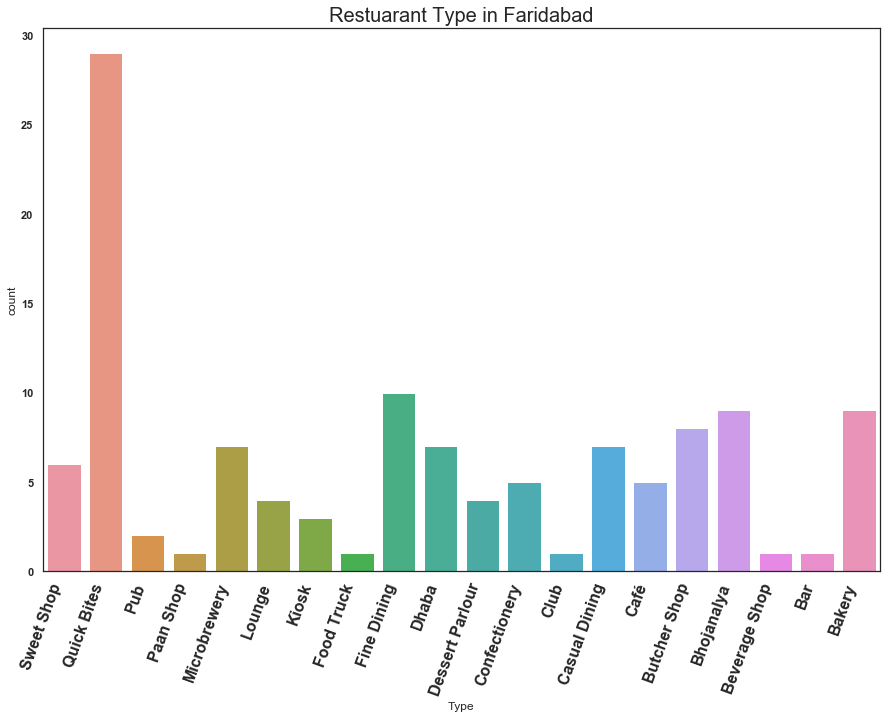

In [241]:
df_far.sort_values('Type', inplace=True, ascending=False)
#Restaurant Type
sns.countplot(df_far['Type'])
sns.countplot(df_far['Type']).set_xticklabels(sns.countplot(df_far['Type']).get_xticklabels(),fontsize=16, rotation=70, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Restuarant Type in Faridabad',fontsize=20)

Text(0.5, 1.0, 'Restuarant Type in Ghaziabad')

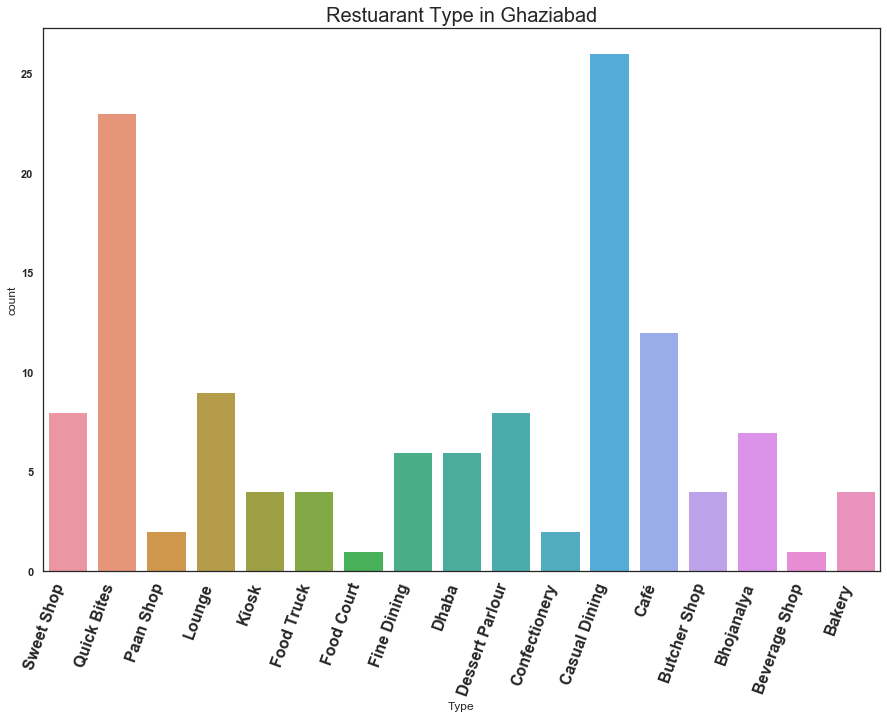

In [242]:
df_gh.sort_values('Type', inplace=True, ascending=False)
#Restaurant Type
sns.countplot(df_gh['Type'])
sns.countplot(df_gh['Type']).set_xticklabels(sns.countplot(df_gh['Type']).get_xticklabels(),fontsize=16, rotation=70, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Restuarant Type in Ghaziabad',fontsize=20)

Text(0.5, 1.0, 'Restuarant Type in Greater Noida')

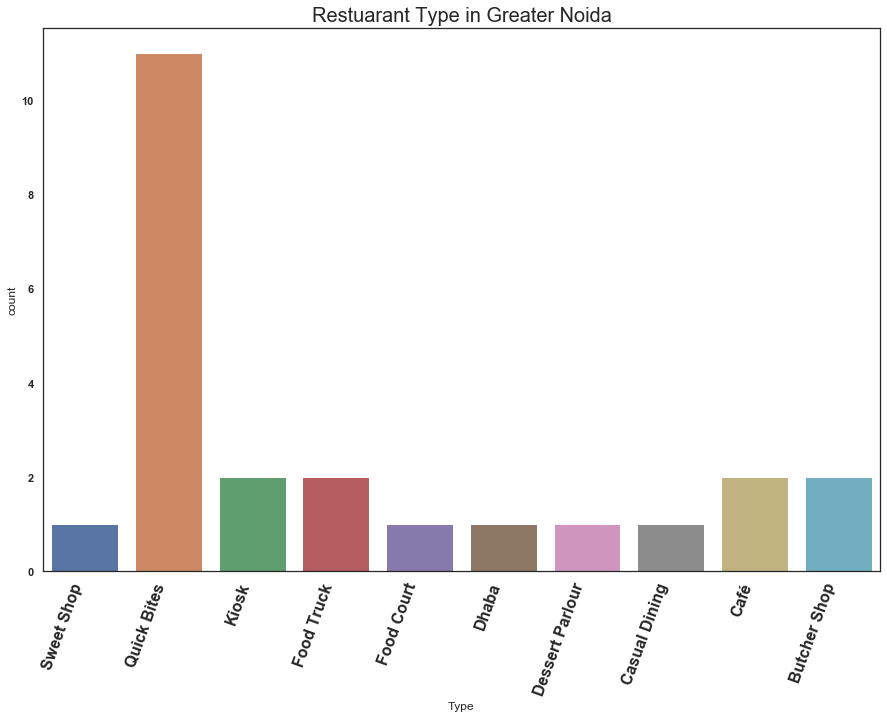

In [243]:
df_grn.sort_values('Type', inplace=True, ascending=False)
#Restaurant Type
sns.countplot(df_grn['Type'])
sns.countplot(df_grn['Type']).set_xticklabels(sns.countplot(df_grn['Type']).get_xticklabels(),fontsize=16, rotation=70, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Restuarant Type in Greater Noida',fontsize=20)

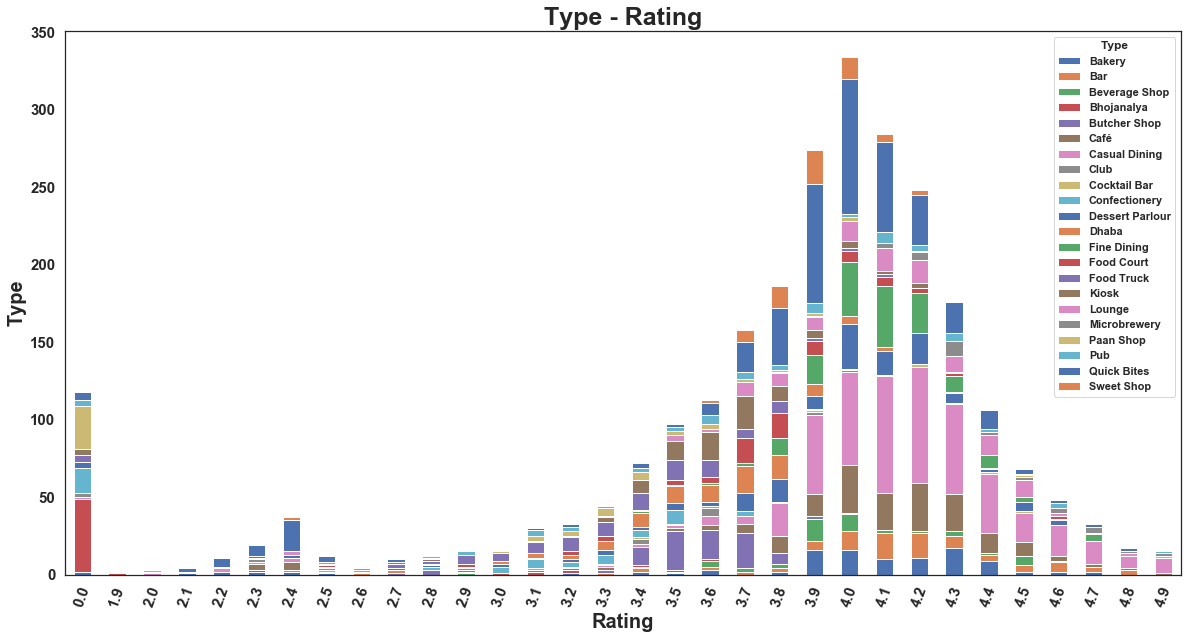

In [244]:
#Type and Rating
fig, ax = plt.subplots(figsize=(20,10))
type_plt=pd.crosstab(df_ncr1['Ratings(avg)'],df_ncr1['Type'])
type_plt.plot(kind='bar',stacked=True,ax=ax);
plt.title('Type - Rating',fontsize=25,fontweight='bold')
plt.ylabel('Type',fontsize=20,fontweight='bold')
plt.xlabel('Rating',fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold',rotation=70)
plt.yticks(fontsize=15,fontweight='bold');

Text(0.5, 0, 'Number of outlets')

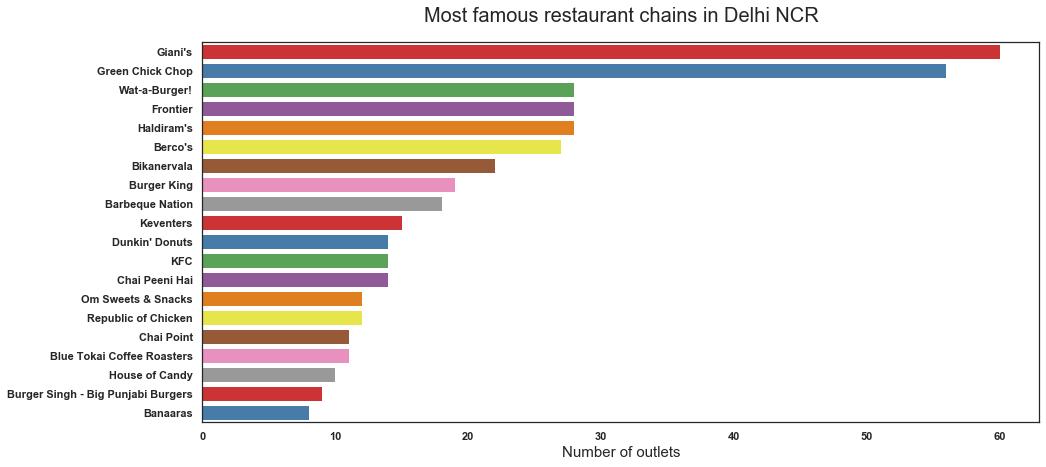

In [245]:
#Most famous restaurant chains in NCR
plt.figure(figsize=(15,7))
chains=df_ncr1['Name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Delhi NCR",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

Text(0.5, 0, 'Number of outlets')

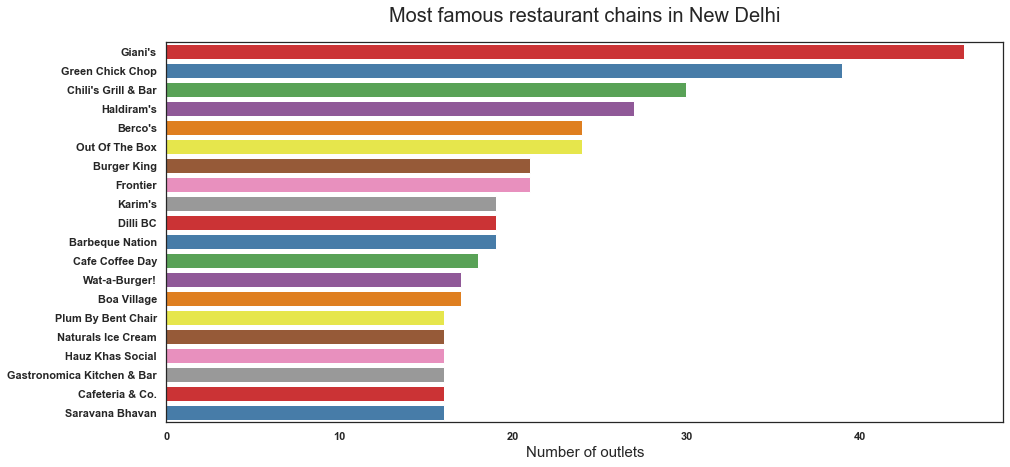

In [246]:
#Most famous restaurant chains in New Delhi
plt.figure(figsize=(15,7))
chains=df_dli['Name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in New Delhi",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

Text(0.5, 0, 'Number of outlets')

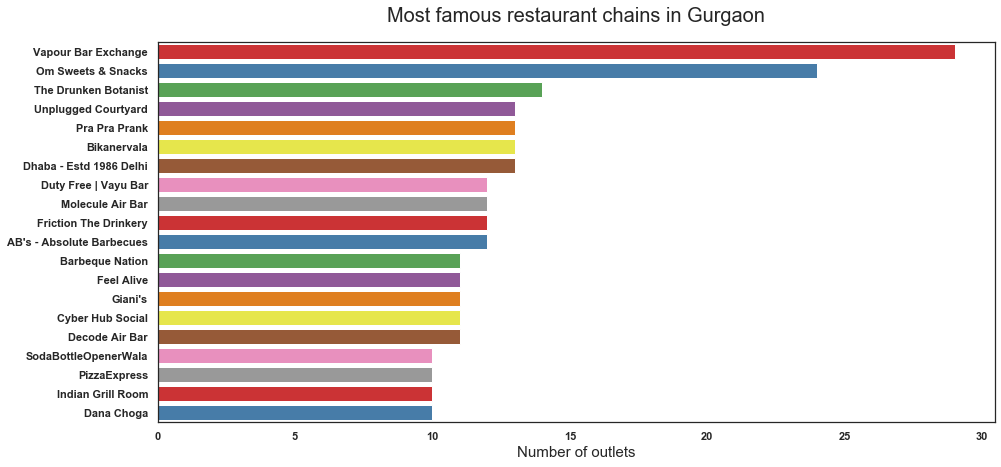

In [247]:
#Most famous restaurant chains in Gurgaon
plt.figure(figsize=(15,7))
chains=df_gur['Name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Gurgaon",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

Text(0.5, 0, 'Number of outlets')

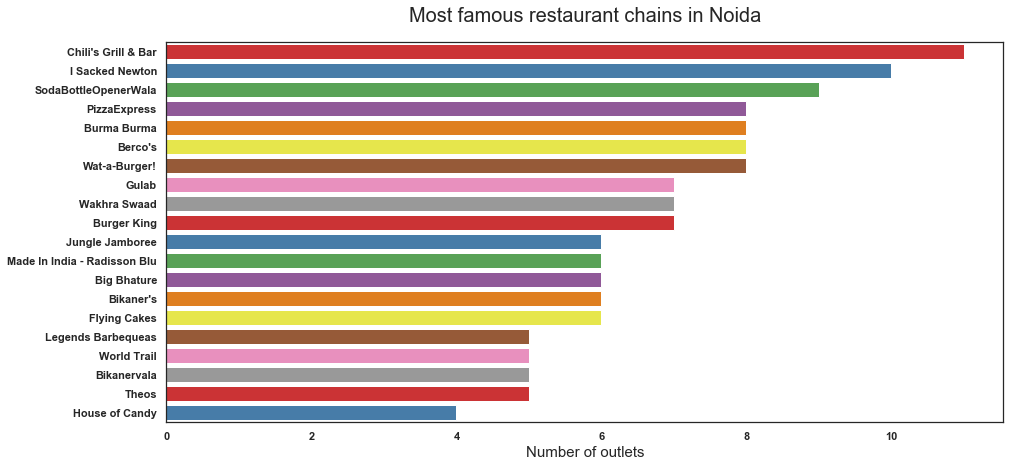

In [248]:
#Most famous restaurant chains in Noida
plt.figure(figsize=(15,7))
chains=df_noi['Name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Noida",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

Text(0.5, 0, 'Number of outlets')

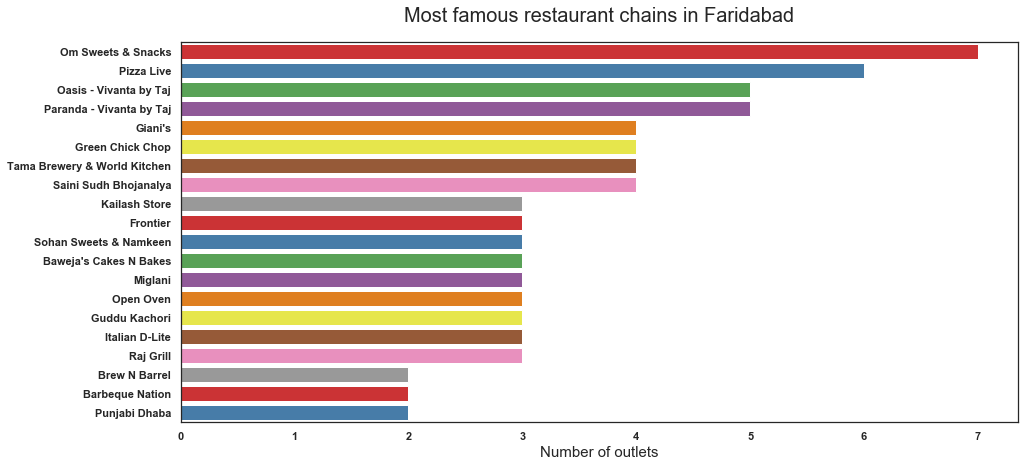

In [249]:
#Most famous restaurant chains in faridabad
plt.figure(figsize=(15,7))
chains=df_far['Name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Faridabad",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

Text(0.5, 0, 'Number of outlets')

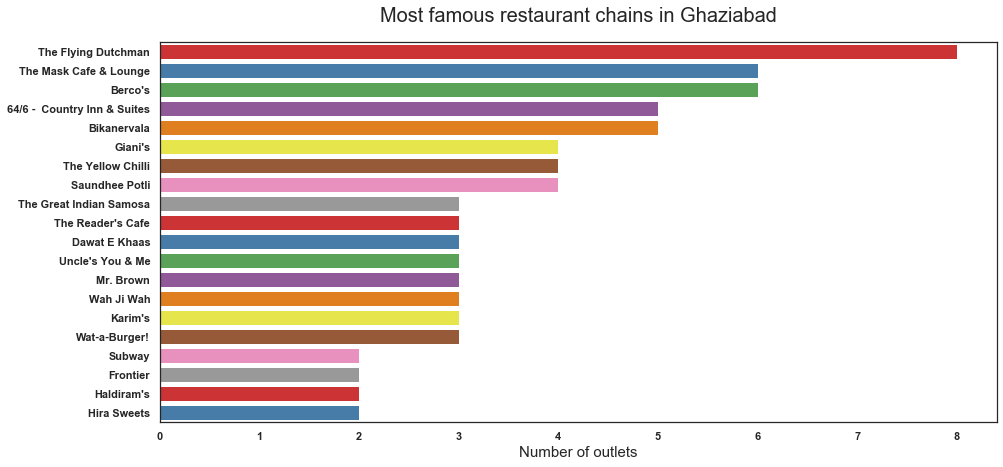

In [250]:
#Most famous restaurant chains in ghaziabad
plt.figure(figsize=(15,7))
chains=df_gh['Name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Ghaziabad",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

Text(0.5, 0, 'Number of outlets')

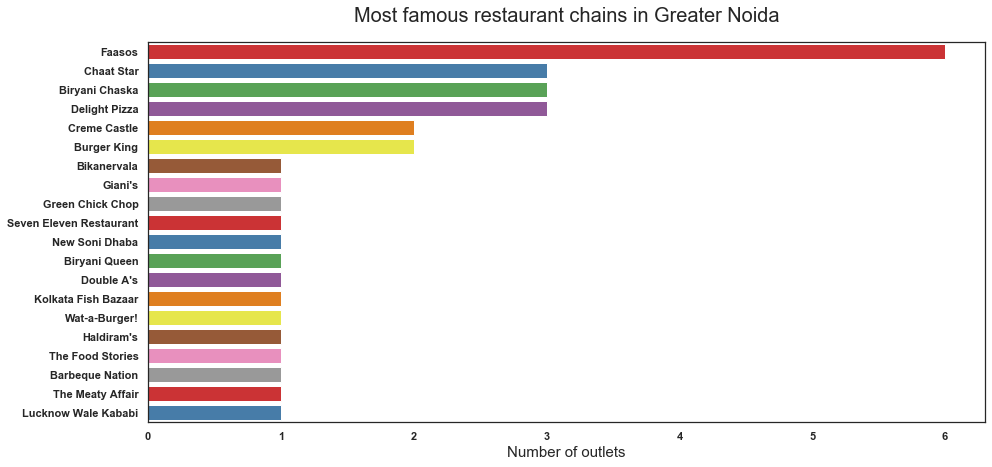

In [251]:
#Most famous restaurant chains in greater noida
plt.figure(figsize=(15,7))
chains=df_grn['Name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Greater Noida",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

### Maps

In [252]:
!pip install folium

In [253]:
import folium # map rendering library 

In [254]:
df1=df_ncr1

In [255]:
df1.drop_duplicates(subset='Locality', keep='first', inplace=True)

In [256]:
df1.sort_values('Locality')

Id                                               Name  \
2810  18953981                                       CAD Tech Bar   
1588  18618770                                      Brewer Street   
2448  19088855                                            Giani's   
2282  19130624                                    Jungle Jamboree   
887     310281                                         Haldiram's   
4388      7811                                Shri Bikaner Sweets   
1260    301688                                       The Roll Hut   
3889    308235                                           Sultanat   
1478  19028561                                    Imperfecto Shor   
1446  18641902                                     Ghar Unplugged   
845       3370                                                BTW   
1101      1676                                       Al Qureshi's   
3107  18715304                                   The Nook - Aloft   
3535  18605991                                      Wat-a-Burger!   
1252  18553709                                            Voltage   
509       2303                                         Haldiram's   
514       7251                                                KFC   
2216  18387753                                            Riviera   
1292  18589668                                Lucknow Wale Kababi   
1347  18787540                                   The Meaty Affair   
79      307113                                             Diggin   
862   18547374                                   Sona Mithai Wala   
212   18424886                             AnnaMaya - Andaz Delhi   
1492  18610194                                Imperfecto Ruin Pub   
703     306520                                       Creme Castle   
1330      4596                                       Just Chinese   
1510      3572                                            Howlers   
1811  19090075                                           Banaaras   
2532  18878017                                      Wat-a-Burger!   
3983      6574                            Pandit Ji Paranthe Wale   
3531  18658494                                           Burgrill   
4393  18579314                                    New Chinese Hut   
2492  18540836                                      Wat-a-Burger!   
1866  18927714                               Baba Bateshwer Hotel   
1096      4411                                        Delhi Zaika   
1036  18400739                                       Balaji Dhaba   
2588  18549219                         Blue Tokai Coffee Roasters   
844        588                                     Nathu's Sweets   
2449  19033965                                            Giani's   
3385  18616096                                    Barbeque Nation   
1083      1862                                         Bite-N-Sip   
479       7992                               Lakshmi Coffee House   
1157      1458                                   Green Chick Chop   
835        491                                        Bikanervala   
442       8597                                     Shawarma House   
4003  18469965                                           Pho King   
1733  18618005                                          Yoku Moku   
4355    305296                                          The Treat   
450   18635708                                    Jeet Restaurant   
440     300178                    Chaina Ram Sindhi Confectioners   
4407      1412                                          Open Oven   
866     307218                                       Shyam Sweets   
3524  18424673                 Burger Singh - Big Punjabi Burgers   
4222      4608              Chocolatiers - The Chocolate Boutique   
505   18424901                                                KFC   
1457      4041                                    24 Carat Lounge   
2431  18591212                                            Giani's   
1424  1860

In [257]:
df1.reset_index(inplace = True)

In [260]:
lati = 28.7041
long = 77.1025

In [261]:
# create map of DelhiNCR using latitude and longitude values 
map_ncr = folium.Map(location=[lati, long], zoom_start=10.2) 
# add markers to map 
for lat, lng, label in zip(df1['Latitude'], df1['Longitude'],df1['Locality']):
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(        
        [lat, lng],       
        radius=5,        
        popup=label,       
        color='blue',       
        fill=True,        
        fill_color='#3186cc',      
        fill_opacity=0.7,        
        parse_html=False).add_to(map_ncr)     
    
map_ncr

In [262]:
df1=df_dli
df1.drop_duplicates(subset='Locality', keep='first', inplace=True)
df1.reset_index(inplace = True)
lati = 28.7041
long = 77.1025
# create map of NewDelhi using latitude and longitude values 
map_dli = folium.Map(location=[lati, long], zoom_start=11) 
# add markers to map 
for lat, lng, label in zip(df1['Latitude'], df1['Longitude'],df1['Locality']):
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(        
        [lat, lng],       
        radius=5,        
        popup=label,       
        color='blue',       
        fill=True,        
        fill_color='#3186cc',      
        fill_opacity=0.7,        
        parse_html=False).add_to(map_dli)     
    
map_dli

In [263]:
df1=df_gur
df1.drop_duplicates(subset='Locality', keep='first', inplace=True)
df1.reset_index(inplace = True)
lati = 28.4595
long = 77.0266
# create map of Gurgaoin using latitude and longitude values 
map_gur = folium.Map(location=[lati, long], zoom_start=12) 
# add markers to map 
for lat, lng, label in zip(df1['Latitude'], df1['Longitude'],df1['Locality']):
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(        
        [lat, lng],       
        radius=5,        
        popup=label,       
        color='blue',       
        fill=True,        
        fill_color='#3186cc',      
        fill_opacity=0.7,        
        parse_html=False).add_to(map_gur)     
    
map_gur

In [264]:
df1=df_noi
df1.drop_duplicates(subset='Locality', keep='first', inplace=True)
df1.reset_index(inplace = True)
lati = 28.5355
long = 77.3910
# create map of Noida using latitude and longitude values 
map_noi = folium.Map(location=[lati, long], zoom_start=12) 
# add markers to map 
for lat, lng, label in zip(df1['Latitude'], df1['Longitude'],df1['Locality']):
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(        
        [lat, lng],       
        radius=5,        
        popup=label,       
        color='blue',       
        fill=True,        
        fill_color='#3186cc',      
        fill_opacity=0.7,        
        parse_html=False).add_to(map_noi)     
    
map_noi

In [265]:
df1=df_far
df1.drop_duplicates(subset='Locality', keep='first', inplace=True)
df1.reset_index(inplace = True)
lati = 28.4089
long = 77.3178
# create map of Faridabad using latitude and longitude values 
map_far = folium.Map(location=[lati, long], zoom_start=12) 
# add markers to map 
for lat, lng, label in zip(df1['Latitude'], df1['Longitude'],df1['Locality']):
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(        
        [lat, lng],       
        radius=5,        
        popup=label,       
        color='blue',       
        fill=True,        
        fill_color='#3186cc',      
        fill_opacity=0.7,        
        parse_html=False).add_to(map_far)     
    
map_far

In [266]:
df1=df_gh
df1.drop_duplicates(subset='Locality', keep='first', inplace=True)
df1.reset_index(inplace = True)
lati = 28.6692
long = 77.4538
# create map of ghazibad using latitude and longitude values 
map_ghz = folium.Map(location=[lati, long], zoom_start=12) 
# add markers to map 
for lat, lng, label in zip(df1['Latitude'], df1['Longitude'],df1['Locality']):
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(        
        [lat, lng],       
        radius=5,        
        popup=label,       
        color='blue',       
        fill=True,        
        fill_color='#3186cc',      
        fill_opacity=0.7,        
        parse_html=False).add_to(map_ghz)     
    
map_ghz

In [267]:
df1=df_grn
df1.drop_duplicates(subset='Locality', keep='first', inplace=True)
df1.reset_index(inplace = True)
lati = 28.4744
long = 77.5040
# create map of greater noid using latitude and longitude values 
map_grn = folium.Map(location=[lati, long], zoom_start=11) 
# add markers to map 
for lat, lng, label in zip(df1['Latitude'], df1['Longitude'],df1['Locality']):
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(        
        [lat, lng],       
        radius=5,        
        popup=label,       
        color='blue',       
        fill=True,        
        fill_color='#3186cc',      
        fill_opacity=0.7,        
        parse_html=False).add_to(map_grn)     
    
map_grn

### End of Code